#**NIH X-Ray Convolutional Neural Network Classification - Week Two Project Code**

*Course*: DS 4002 - Data Science Project Course

*Authors*: Navya Annapareddy, Tony Albini, Kunaal Sarnaik, & Jaya Vellayan

*Professor*: Brian Wright

*Date*: January 15th, 2021

## **TABLE OF CONTENTS**

*   [Section I](#one): Introduction
*   [Section II](#two): Dataset Overview & Cleaning
*   [Section III](#three): Exploratory Data Analysis
*   [Section IV](#four): Initial Model & Feature Engineering
*   [Section V](#five): Results of Finalized Model(s)
*   [Section VI](#six): Discussion & Conclusion
*   [Section VII](#seven): References

<a name="one"></a>
## **I. Introduction**

The following section serves as a general introduction to the topic that will be discussed throughout this research analysis — Chest X-Ray Diagnostic Image Classification. See the sub-sections embedded below for futher information: Motivation, Background, General Research Question, & Relevant Research.

### ***a) Motivation***

According to the Mayo Clinic, Chest X-Rays are one of the most common diagnostic tools utilized in the clinical setting; their usage rates fall just behind those of the electrocardiogram and bedside ultrasound.[$^{1}$](#ref1) Due to its strong ability to reveal many things inside of a patient's body, a Chest X-Ray is often among the first procedures a physician orders if heart or lung problems are suspected in said patient. Furthermore, due to the numerous, severe respiratory and cardiovascular complications of COVID-19, the use of Chest X-Rays within public and private hospitals is only expected to increase greatly within the coming years.[$^{2}$](#ref2) However, an increase in the number of such procedures disproportionately affects physicians specializing in an already arduous medical field — radiology.

According to a study conducted by radiologists Bruls & Kwee at the Zuyderland Medical Center in the Netherlands, the workload for radiologists during on-call hours has increased dramatically in the past 15 years on the global scale.[$^{3}$](#ref3) In their research manuscript, Bruls & Kwee call for the radiologist and technician workforce to be increased so that not only potential burn-out can be avoided, but also quality and safety of radiological care can be maintained. In the United States alone, the workload of radiologists has increased over the past two decades at an alarming rate.[$^{4}$](#ref4) Furthermore, previous studies have shown that the number of errors attributed to this heavy workload have similarly increased.[$^{5-6}$](#ref5) For patients, these trends are extremely concerning for two primary reasons: **1)** a potential health risk going unnoticed, and **2)** exposure to dangerous radiological substances. 

According to the Radiological Society of North America, most missed radiologic diagnoses are attributable to image interpretation errors by radiologists.[$^{7}$](#ref7) In study conducted by RSNA researchers Bruno et al., it was found that the rate of missed, incorrect, or delayed diagnoses in the United States is estimated to be as high as 10-15%. An especially frightening case that these researchers found was that of a 4-year old boy who had swallowed a coin which was lodged within his esophagus. According to Bruno et al., a skilled pediatric radiologist missed this clear diagnostic indicator twice, leaving any mention of a coin out of their clinical image interpretation. Similar errors across the country and world likely result in many diseases and medical problems going undiagnosed, making them all the more harder to treat as they progress to their later stages. 

However, the complications resulting from radiologic image interpretation errors to not stop there; in addition to increasing the severity of preexisting medical conditions due to a lack of diagnosis, a radiologic error often leads to more imaging down the road for a patient.[$^{5}$](#ref5) As such, one instance of radiologic exposure can translate into multiple. Although the radioactive exposure itself is relatively small with a Chest X-Ray, it can still be extremely concerning for a patient who needs multiple due to suffering from a chronic disease such as Chronic Obstructive Pulmonary Disorder (COPD).[$^{8}$](#ref8)

Given both the causes and complications of radiologist image interpretation errors, what if there was a way to better screen for medical images such as those resulting from a Chest X-Ray? More specifically, can deep learning and convolutional neural networks (CNNs) help with such a specific application? The following research project will leverage machine learning techniques and state-of-the-art CNN architectures to analyze this proposition. A dataset of several Chest X-Ray images will be utilized, exploratory data analysis and feature engineering will be conducted, and a finalized CNN model will be constructed to classify diagnostic Chest X-Ray Images for disease. In the end, the model can potentially be utilized to serve as a preliminary screening tool in the clinical setting to aid radiologists in their imaging interpretation. As such, the overarching goal of this project is to contribute to the innovative research concentrated in medical image classification to increase clinical workflow efficiency, reduce both physician workload and error alike, and most importantly, improve patient outcomes.

### ***b) Background***

#### *i) Chest X-Rays*

Chest X-Rays utilize very small doses of ionizing radiation to produce pictures of the thoracic cavity. Commonly utilized to evaluate the lungs, heart, and chest wall, chest X-rays serve as important tools to diagnose symptoms such as shortness of breath, persistent cough, fever, chest pain, or traumatic injury.[$^{8}$](#ref8) Furthermore, they can also be used to monitor chronic diseases and disorders such as pneumonia, emphysema, and cancer. Listed below is a comprehensive overview of what the Chest X-Ray can reveal about any given patient's body[$^{1}$](#ref1): 

> **Lung Condition** - Detecting cancer, infection, chronic conditions, complications, or air collecting around a lung potentially causing collapse.

> **Heart-Related Lung Problems** - Detecting changes or problems in the lungs that stem from preexisting heart problems.

> **Heart Size and Outline** - Detecting changes in size and shape of the heart, which may additionally be a sign of heart failure, excess fluid, or heart valve abnormalities. 

> **Blood Vessels** - Detecting aneurysms, congenital heart disease, or other problems with the aorta, pulmonary artery, coronary artery, and vena cava.

> **Calcium Deposits** - Detecting presence of calcium which may correspond to excess fat in blood vessels, damage to heart valves, coronary artery abnormalities, or anatomical severities with respect to the heart and its protective sac.

> **Fractures** - Detecting rib or spine fractures, as well as other problems with bones (cancer, osteomyelitis, etc.).

> **Postoperative Changes** - Detect any problems that emerge from a surgery, most common being intubation complications to the esophagus.

> **Pacemakers, Defibrillators, & Catheters** - Detect any problems with the placement of these devices.





#### *ii) Convolutional Neural Networks (CNNs)*

The Convolutional Neural Networks (CNNs) are a class of artificial neural networks that have become especially popular in computer vision tasks.[$^{9}$](#ref9) The architecture of a CNN, consisting of various layers, is designed to take advantage of the two-dimensional structure of an input image.[$^{10}$](#ref10) This specific function is achieved with local connections and tied weights followed by some sort of pooling which results in translation invariant features between layers. An additional benefit of their many layers is ease of training secondary to the low number of parameters required as compared to fully connected networks. 

The architecture of a CNN, as mentioned previously, consists of one or more layers. In general, three main types of layers are utilized in building any given CNN: 

> **1. Convolutional Layers**

The convolutional layer is always the first layer of a CNN. The input to this layer is a tensor which holds the raw pixel values of the image that is intended on being classified.[$^{11}$](#ref11) The shape of this input tensor is as follows: (# of images, image height, image width, input channels). The number of input channels is generally 3, corresponding to the RGB values of any given pixel. Essentially, the convolutional layer of a CNN takes this input tensor and uses filters (also called neurons or kernels) to convolve the image (via element-wise multiplication) pixel values and sum them up within an area of the inputted image (referred to as the neuron's receptive field), leaving one value. Depending on the number of filters utilized in the convolutional layer, the number of unique locations on the inputted image increase, which allows for a feature map. In the end, whatever input shape the original image tensor was in can be represented in fewer parameters, which is the hallmark function of a CNN.

> **2. Fully Connected (Dense) Layers**

The next main type of layer in a CNN is the fully conected layer, sometimes referred to as the dense layer. This layer essentially takes an input volume and outputs an N dimensional vector where N is the number of classes that the program has to choose from. Each number in this N dimensional vector represents the probability of a certain class. For example, if one wanted to classify images as red, blue, or green, the output of a dense layer may be something along the lines of [0.2 0.5 0.3], indicating that the model finds there is a 20% chance of the image being red, 50% chance of it being blue, and 30% chance of it being green. The fully connected layer does this by looking at the output of the previous layer, which represents activation maps of high level features in the image, and determining which features most correlate to a particular class. 

> **3. Pooling Layers**

The third and final main type of CNN layer is the pooling layer. The pooling layers operate upon each feature map taken from their input to create a new set of the same number of pooled feature maps.[$^{12}$](#ref12)  Essentially, what this does is filters the feature maps by value of importance, and this is performed with two common functions: **1)** Average Pooling, and **2)** Maximum Pooling. Average Pooling calculates the average value for each patch on the feature map whlie Max Pooling calculates the maximum value for each patch on the feature map. The end result of a pooling layer is a downsampled, summarized version of the features detected in the input image. This is what adds the model's invariance to local translation.

The above layers outline the general components comprising the architecture of any given CNN, yet several variants of these and additional layers also exist and are utilized widely for image classification. However, after the CNN architecture is laid out with respect to layer magnitude and ordering, the model still must be trained; CNNs achieve this training through backpropagation.[$^{11}$](#ref11) This training process is composed of four distinct sections: 

> **1. The Forward Pass**

This is the training phase in which an image is taken and passed through the entire CNN's layer hierarchy. The output of this first image is likely equal with respect to the number of classes that are being used to classify the image, with no preference given to any class. However, once the CNN finds the associated label that the training image is supposed to be classified as, it backpropagates through use of the loss function. 

> **2. The Loss Function**

To get to the stage of the CNN-predicted layer being the same as the intended training label for any given image, the loss of any given training image, as calculated by the loss function, must be zero. Essentially, this is an optimization problem in calculus, in which the loss function is utilized to find out which inputs (pixel weights in the feature map) most directly contributed to the loss (error) of the network. Common loss functions include MSE (Mean Squared Error), Hinge Loss, and Cross-Entropy, the lattermost of which will be utilized later in this notebook.

> **3. The Backward Pass**

Since we have the loss, as calculated by any one of the loss functions listed previously, a backward pass is now performed through the CNN to find out which weights contributed most to the loss. Using these weight contributions, the CNN needs to adjust the features such that the loss decreases. This is done by calculating the change in loss with respect to change in weight. 

> **4. Weight Update**

Now that the weight importance of each feature in the CNNs layers is found with respect to the loss, the filter weights are updated such that the loss decreases. The learning rate is crucial to this phase, as it is essentially the length of steps taken in each weight update. Lower learning rates may take a long time to converge to minimum loss while larger learning rates may result in jumps that are too large and not precise enough to reach the optimal point quickly.

### ***c) General Research Question***

An in-depth analysis utilizing data science and machine learning principles in the context of medical Chest X-Ray Image Classification will be conducted in an attempt to address the following research question:

> **How do class imbalances affect the performance of a state-of-the-art Convolutional Neural Network model in classifying Chest X-Ray Images?**

Using this queston as a guide, hypotheses will be developed and a comprehensive analysis that leverages state-of-the-art CNN principles will be conducted. A dataset containing several thousand Chest X-Ray images possessing diagnostic indications to a number of various cardiac and pulmonary diseases will be analyzed (see [**Dataset Overview & Cleaning**](#two)section for more information). The dataset will be cleaned, pre-processed, and exploratory analyzed, after which iterative model runs and feature engineering steps will be performed to test the performance of state-of-the-art CNN architectures with class imbalances.

### ***d) Relevant Research***

The utilization of Convolutional Neural Networks within the medical space, specifically for image classification, is both an established and an emerging area of innovative research. The distinct average of utilizing CNNs for such an application is that the algorithms can be generalized to solve many different kinds of medical image classification tasks in a process called transfer learning.[$^{13}$](#ref13) Given the large rise in medical data and releases of images, many researches have applied deep learning networks in order to successfully classify images such as CT Scans, MRI Graphs, and Ultrasound results as pathophysiological and physiological. However, given the focus of this project, the following are some relevant studies pertaining to classifying pulmonary and cardiac disorders through utilization of training CNNs on Chest X-Ray images.

In late 2019, a group of researchers, Jain et al., on a joing project from Bharati Vidyapeeth's College of Engineering and Karunya Institute of Technology and Sciences, utilized several state-of-the-art CNN architectures to classify Chest X-Rays as positive or negative for pneumonia.[$^{14}$](#ref14) Using the VGG16, VGG19, ResNet50, and Inception-v3 architectures, Jain et al. found that these cutting-edge, pre-trained algorithms were able to achieve testing accuracies of 87.28%, 88.46%, 77.56%, and 70.99%, respectively. However, an interesting finding from this group was that two custom models, which consisted of two and three convolutional layers, respectively, achieved testing accuracies of 85.26% and 92.31%, respectively. These custom findings suggest that CNNs might achieve better performance with regard to medical image classification if the models are specifically trained on the dataset being classified, as pre-trained models are trained on other objects such as cats and dogs. As a result, the pre-trained models, although state-of-the-art, may not be able to detect complex intricacies within medical images for sufficient classification.

Furthermore, with the rise of the COVID-19 pandemic in the past two years, substantial research has gone into Chest X-Ray image classification as a method of detecting the virus early and often. In November 2020, researchers at the University of Waterloo (Canada), Wang et al., developed a tailored deep CNN design specifically for detection of COVID-19 cases from Chest X-Ray images.[$^{15}$](#ref15) After consolidating 13,975 Chest X-Ray images across 13,870 patient cases, their COVID-Net model achieved a respectable accuracy of 93.3%. Furthermore, they reported that this custom tailored model achieved better accuracies than both the pretrained VGG and ResNet CNN architectures. Similarly, a joing team of researchers from both the University of Azad Jammu & Kashmir in Pakistan, and Stony Brook University in New York, utilized CNNs to classify Chest X-Ray images as either positive for COVID-19, positive for bacterial pneumonia, negative for COVID-19 but positive for viral pneumonia, and negative for any pathology.[$^{16}$](#ref16) Using a deep convolutional network based off of the state-of-the-art U-Net CNN design, the researchers, Hussain et al., achieved an admirable accuracy of 79.52% for their complex multi-class classification.

Overall, the use of deep CNNs within the medical image classification space is emerging. However, many of these prior analyses focus on a single disease and specify their network in an according way. As such, the goal of these prior projects is to simulate radiologist-level classification, which ultimately may not be feasible as it would suggest replacing radiologists with artificial neural networks. Our project will instead focus on serving as an initial screening tool for Chest X-Rays, classifying them based on finding or severity, such that radiologists can refocus their efforts rather than being replaced entirely.



<a name="two"></a>
## **II. Dataset Overview & Cleaning**

The following section describes the dataset being used to address the general research question listed above, as well as details how the dataset was pre-processed for analysis.


### ***a) Dataset Overview***

The dataset being utilized in this project is a sub-sample of a dataset provided by the NIH containing 112,120 Chest X-Ray images obtained from 30,805 unique patients. The labels in the original dataset were generator through the use of Natural Language Processing techniques to text-mine disease classifications from the associated radiological reports. The labels are expected to be approximately 90% accurate and suitable for weakly-supervised learning. The images were already resized to 1024x1024 *pixels squared*, and the sub-sample that will specifically be utilized in this notebook, due to computational limitations, contains 5,606 images. The images are classified through the use of 15 different labels (14 diseases and one "No findings" label), and some images are classified with more than one disease label (see below). Finally, the dataset also was generated with a comma-separated file of patient demographics and the bounding boxes of each image.

Link to dataset[$^{17}$](#ref17): https://www.kaggle.com/nih-chest-xrays/data?select=Data_Entry_2017.csv

The 15 different classifications in the dataset are as follows:

> 1. Atelectasis

> 2. Consolidation

> 3. Infiltration

> 4. Pneumothorax

> 5. Edema

> 6. Emphysema

> 7. Fibrosis

> 8. Effusion

> 9. Pneumonia

> 10. Pleural Thickening

> 11. Cardiomegaly

> 12. Nodule Mass

> 13. Hernia

> 14. No Findings

> 15. One or more disease classifications

Together, this makes for a total of 140 combinations that can exist for any given image's classification in just our 5,606-image sub-sample, as discussed later.



### ***b) Dataset Cleaning & Pre-Processing***

The following sub-section includes a step-by-step overview of how the dataset was loaded into the Google Colab environment, cleaned, and prepared for exploratory data analysis.

#### *i) Importing Python Libraries*



The following code chunk outlines the numerous packages, libraries, and modules that were imported to the notebook for the analysis to be conducted in Python. The tools are listed below:

* **pandas** - Standard data analysis library
* **NumPy** - Computational Library for Fast Computation and Array Manipulation
* **os** - Module that provides functions for interacting with the operating system
* **itertools** - Functions creating iterators for efficient looping through files, data, and programs
* **sys** - Module for system-specific parameters and functions
* **requests** - Allows HTTP requests to be made in Python
* **plotly** - Data Visualization Library
* **matplotlib** - Standard Python Plotting
* **seaborn** - Statistical Data Visualization Library
* **pickle** - Module for serializing data into bytes and storing images efficiently in array format
* **OpenCV** - Library utilized to load images (programming functions mainly aimed at real-time computer vision)
* **keras** - API and framework designed for efficient deep learning training and experimental analysis

In [ ]:
import pandas as pd
import numpy as np
from os import listdir, walk
from os.path import isfile, join
import itertools
import sys,requests
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import cv2
import pickle
from collections import Counter
from pylab import rcParams

#USE IF CONVERTING TO HTML
# import plotly.offline as py
# py.init_notebook_mode(connected=False)

from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as skmet
pd.set_option('mode.chained_assignment', None) 

import keras
import keras.utils
from keras.utils import to_categorical
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import load_img, ImageDataGenerator
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils import class_weight
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.optimizers import SGD
from keras import utils as np_utils
import tensorflow as tf

class history(Callback):
    def __init__(self, savepath):
        super(history, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

#### *ii) Mounting Drive & Importing Dataset*

The following section mounts the drive to the correct directory and imports the images from the dataset of interest into the Colab environment.

The following code chunk contains JavaScript Code necessary for preventing Colab's runtime from disconnecting after the session is left idle. Due to the complexity of our analysis, this script is necessary to run in the browser's console such that the CNN models can be trained on the images without interruption.

In [ ]:
''' function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}
setInterval(ConnectButton,300000); '''

The following code chunk mounts the Notebook's drive to the correct directory necessary in order to import the images being utilized to train the CNN models in subsequent analysis.

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')
#!ls "/content/drive/MyDrive/DS_4002_JTerm2021/Week Two/Code/data/sample_images"

The following code chunk standardizes the path of the folder, images, and pickled pathways of the imaging dataset. It also includes a 'weight_path' argument, which will be utilized when fitting the pretrained models in the Keras API (VGG, ResNet, & DenseNet) to the imaging data.

In [ ]:
folder_path = "/content/drive/MyDrive/DS_4002_JTerm2021/Week Two/Code/data/sample_images/images"
file_path = "/content/drive/MyDrive/DS_4002_JTerm2021/Week Two/Code/data/sample_images/sample_labels.csv"
folder_path_append = "/content/drive/MyDrive/DS_4002_JTerm2021/Week Two/Code/data/sample_images/images/"

pkl_path = '/content/drive/MyDrive/DS_4002_JTerm2021/Week Two/Code/img_arrays.pkl'
pkl_pathx = '/content/drive/MyDrive/DS_4002_JTerm2021/Week Two/Code/img_list_X.pkl'
pkl_pathy = '/content/drive/MyDrive/DS_4002_JTerm2021/Week Two/Code/img_list_Y.pkl'

weight_path = '/content/drive/MyDrive/DS_4002_JTerm2021/Week Two/Code/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5' 
#Weight source: https://github.com/zdata-inc/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5 

recode_classes={0: 'No Finding', 1: 'Single Finding', 2: 'Multiple Findings'}
recoded_list = list(recode_classes.values())

def getAllFilesInDirectory(directoryPath: str):
    return [(directoryPath + "/" + f) for f in listdir(directoryPath) if isfile(join(directoryPath, f))]

#### *iii) Looking at the Raw Dataset*

Now that the relevant Python tools are imported and we are in the directory that our images are stored in, let us have a look at the dataset.

The followign code chunks reads the csv file associated with the 5,606-image sub-sample that we will be utilizing to train the CNNs into the Google Colab environment. 

In [ ]:
df = pd.read_csv(file_path)
df.head(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


As shown in the output above, the csv contains the image index, the finding labels classified to the image index, and then demographic and bounding box information about the patients and images, respectively. We can see right off the bat that the images were resized down to 1024x1024 *pixels squared* from larger sizes, and that the ultimate classifications can have multiple findings and be very complex.

#### *iv) Preprocessing*

The following section pre-processes the csv file in order to prepare our exploratory data analysis.

The following section performs several pre-processing functions to the dataset. First, the dataframe is categorized utilizing the following map: No Findings --> 0, One Finding --> 1, and Multiple Findings --> 2. This is necessary for subsequent analysis of the three classes and training the CNN. Another dataframe is also created reflecting only the 7 most frequent classifications found in the csv file. These alterations are done to the original as part of pre-processing and preparation for exploratory data analysis such that sufficient hypotheses pertaining to the dataset and general research question can be constructed.

In [ ]:
df["path"] = folder_path_append+df["Image Index"]
print(df.shape)

categorized_df = df.copy()
categorized_df["Class"] = ""
categorized_df["Class"][(categorized_df["Finding Labels"] == "No Finding")] = 0
categorized_df["Class"][categorized_df["Finding Labels"].str.contains("|", regex=False)] = 2
categorized_df["Class"][(categorized_df["Class"] != 0) & (categorized_df["Class"] != 2)] = 1
categorized_df["Class"] = categorized_df["Class"].astype('int32')
categorized_df

findings = ["No Finding", "Infiltration", "Effusion", "Atelectasis", "Nodule", "Pneumothorax", "Mass"]
is_finding = categorized_df["Finding Labels"].isin(findings)
target_findings = categorized_df[is_finding].reset_index()
recoded_df = categorized_df[['Finding Labels', 'path', 'Class']]
print(recoded_df.shape)
categorized_df.head(1)

(5606, 12)
(5606, 3)


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,path,Class
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139,/content/drive/MyDrive/DS_4002_JTerm2021/Week ...,2


The following code chunk drops all columns of the dataframe pertaining to the 7 most frequent labels ('target_data'), such that subsequent visualizations can be constructed.

In [ ]:
target_data = df["Finding Labels"].value_counts().rename_axis('Finding').reset_index(name='Count').head(7)
target_data

,Finding,Count
0,No Finding,3044
1,Infiltration,503
2,Effusion,203
3,Atelectasis,192
4,Nodule,144
5,Pneumothorax,114
6,Mass,99


<a name="three"></a>
## **III. Exploratory Data Analysis**

The following sub-section performs exploratory data analysis on both the csv file associated with the images and the images themselves. This is conducted in order to finalize the hypotheses of interest when answering the general research question. At the end of the sub-section, the hypotheses of our investigation are listed.

### ***a) Key Questions***

In order to approach our general research question and construct hypotheses, we will construct key questions to guide our exploratory data analysis of the imaging dataset we will be utilizing. They are as follows:

* [**Key Question One**](#q1): How balanced is the original distribution of our response variable (Chest X-Ray Image Finding)?
* [**Key Question Two**](#q2): How balanced are various altered distributions of our response variable? 
* [**Key Question Three**](#q3): How representative is our dataset with respect to patient demographics?
* [**Key Question Four**](#q4): Generally, what do the Chest X-Ray Images in our dataset look like?
* [**Key Question Five**](#q5): How do X-Ray Images of different classes differ by pixel intensity (brightness)?

<a name="Q1"></a>
#### *i) How balanced is the original distribution of our response variable (Chest X-Ray Image Finding)?*

In [ ]:
all_finding_labels = df.groupby(["Finding Labels"]).size().reset_index(name='Count')
fig = px.bar(all_finding_labels,
             x="Finding Labels",
             y="Count",
             color_discrete_sequence=px.colors.qualitative.D3, 
             title='Distribution of all Finding Labels'
             )
fig.show()

<a name="Q2"></a>
#### *ii) How balanced are various altered distributions of our response variable?*

In [ ]:
all_finding_labels = target_findings.groupby(["Finding Labels"]).size().reset_index(name='Count')
fig = px.bar(all_finding_labels,
             x="Finding Labels",
             y="Count",
             color_discrete_sequence=px.colors.qualitative.D3, 
             title='Distribution of Filtered Findings Labels'
             )
fig.show()

In [ ]:
all_finding_labels = target_findings.groupby(["Finding Labels"]).size().reset_index(name='Count')
fig = px.pie(all_finding_labels,
             values="Count",
             names = "Finding Labels",
             color_discrete_sequence=px.colors.qualitative.D3, 
             title='Distribution of Filtered Findings Labels'
             )
fig.show()

In [ ]:
binary_df = df.copy()
binary_df["Finding Labels"][binary_df["Finding Labels"] != "No Finding"] = "Finding"
binary_df["Finding Labels"].value_counts().rename_axis('Finding').reset_index(name='Count')

num_normal = (binary_df["Finding Labels"] == "No Finding").sum()
num_abnormal = (binary_df["Finding Labels"] == "Finding").sum()

layout = go.Layout(title='Original Base Rates of Target Classes (Findings)')
fig = go.Figure(data=[go.Pie(labels=["No Finding", "Finding"],
                             values=[num_normal, num_abnormal],
                             pull=[0, 0.1],
                             )], layout=layout)
fig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [ ]:
tertiary_df = df.copy()
tertiary_df["Finding Labels"][tertiary_df["Finding Labels"].str.contains("|", regex=False)] = "Multiple Findings"
tertiary_df["Finding Labels"][(tertiary_df["Finding Labels"] != "No Finding") & (tertiary_df["Finding Labels"] != "Multiple Findings")] = "One Finding"
tertiary_df["Finding Labels"].value_counts().rename_axis('Finding').reset_index(name='Count')

num_nofinding = (tertiary_df["Finding Labels"] == "No Finding").sum()
num_onefinding = (tertiary_df["Finding Labels"] == "One Finding").sum()
num_mulfinding = (tertiary_df["Finding Labels"] == "Multiple Findings").sum()

layout = go.Layout(title='Original Base Rates of Target Classes')
fig = go.Figure(data=[go.Pie(labels=["No Finding", "One Finding", "Multiple Findings"],
                             values=[num_nofinding, num_onefinding, num_mulfinding],
                             pull=[0.1, 0, 0],
                             )], layout=layout)

fig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [ ]:
num_no_findings = (df['Finding Labels'] == "No Finding").sum()
num_keep = (target_findings["Finding Labels"] != "No Finding").sum()
num_drop = 5606 - 4299

layout = go.Layout(title='Dropped vs. Retained Data')
fig = go.Figure(data=[go.Pie(labels=["Kept with No Findings", "Kept with Findings", "Dropped"],
                             values=[num_no_findings, num_keep, num_drop],
                             pull=[0, 0, 0.1],
                             )], layout=layout)
fig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [ ]:
tertiary_df = target_findings.copy()
tertiary_df["Finding Labels"][tertiary_df["Finding Labels"].str.contains("|", regex=False)] = "Multiple Findings"
tertiary_df["Finding Labels"][(tertiary_df["Finding Labels"] != "No Finding") & (tertiary_df["Finding Labels"] != "Multiple Findings")] = "One Finding"
tertiary_df["Finding Labels"].value_counts().rename_axis('Finding').reset_index(name='Count')

num_nofinding = (tertiary_df["Finding Labels"] == "No Finding").sum()
num_onefinding = (tertiary_df["Finding Labels"] == "One Finding").sum()
num_mulfinding = (tertiary_df["Finding Labels"] == "Multiple Findings").sum()

layout = go.Layout(title='Filtered Base Rates of Target Classes')
fig = go.Figure(data=[go.Pie(labels=["No Finding", "One Finding", "Multiple Findings"],
                             values=[num_nofinding, num_onefinding, num_mulfinding],
                             pull=[0.1, 0, 0],
                             )], layout=layout)

fig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.show()

<a name="Q3"></a>
#### *iii) How representative is our dataset with respect to patient demographics?*

In [ ]:
comp_g = target_findings.groupby(["Finding Labels", "Patient Gender"]).size().reset_index(name='Count')
fig = px.bar(comp_g,
             x="Finding Labels",
             y="Count",
             color="Patient Gender",
             barmode='group',
             color_discrete_sequence=px.colors.qualitative.D3,
             title='Distribution of Filtered Findings Labels by Gender')

fig.show()

<a name="Q4"></a>
#### *iv) Generally, what do the Chest X-Ray Images in our dataset look like?*

(128, 128)


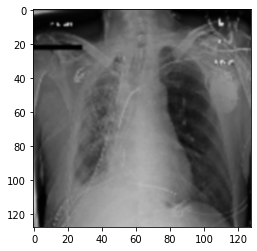

In [ ]:
plotted_cv2 = cv2.resize(np.array(cv2.imread(recoded_df_sample.path[0], cv2.COLOR_BGR2GRAY)), (128,128))
plt.imshow(plotted_cv2, cmap = 'gray', interpolation = 'bicubic')
print(plotted_cv2.shape)

(128, 128, 3)


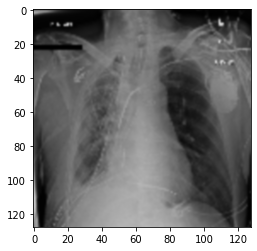

In [ ]:
plotted_cv2 = cv2.resize(np.array(cv2.imread(recoded_df_sample.path[0])), (128,128))
plt.imshow(plotted_cv2, cmap = 'gray', interpolation = 'bicubic')
print(plotted_cv2.shape)

<a name="Q5"></a>
#### *v) How do X-Ray Images of different classes differ by pixel intensity (brightness)?*

In [ ]:
def plot_single(image_path):
  path = image_path
  print(image_path)
  image_id = path.split('/')[10]
  row = df[df['Image Index'] == image_id].values[0]
  label = str(row[1])
  img = image.load_img(image_path, target_size=(200, 200))
  plt.title(image_id+"\n"+label)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

def plot_index(index, DataFrame):
  row = DataFrame.iloc[index].values
  image_id = str(row[0])
  label = str(row[1])
  image_path = str(row[11])
  print(image_path)
  img = image.load_img(image_path, target_size=(200, 200))
  plt.title(image_id+"\n"+label)
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  img1 = cv2.imread(image_path,0)
  plt.hist(img1.ravel(),256,[0,256])
  plt.title("Pixel intensity vs. number of pixels")
  plt.show()
  histg = cv2.calcHist([img1],[0],None,[256],[0,256])
  plt.plot(histg) 
  plt.title("Pixel intensity vs. number of pixels")
  plt.show()

/content/drive/MyDrive/DS_4002_JTerm2021/Week Two/Code/data/sample_images/images/00000061_025.png


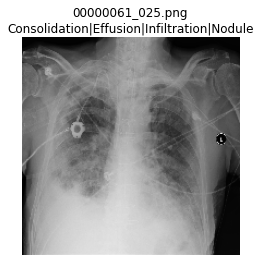

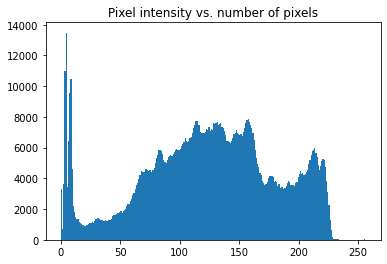

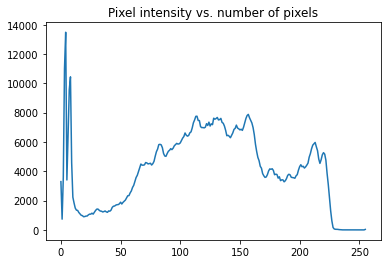

In [ ]:
plot_index(10, df)

/content/drive/MyDrive/DS_4002_JTerm2021/Week Two/Code/data/sample_images/images/00000243_001.png


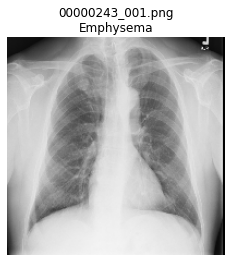

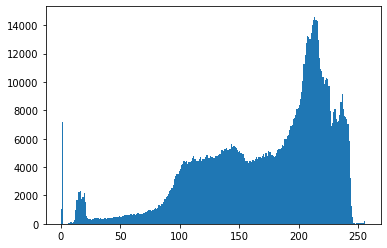

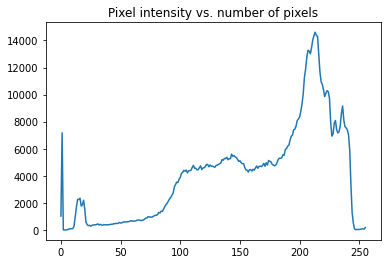

In [ ]:
plot_index(41, df)

### ***b) Finalized Hypotheses***

<a name="four"></a>
## **IV. Initial Model & Feature Engineering**

### **a) More Pre-Processing and Function Preparation**

#### Functions

In [ ]:
def plot_history(history):
    train_loss_history = history.history['loss']
    validation_loss_history = history.history['val_loss']
    
    train_acc_history = history.history['accuracy']
    validation_acc_history = history.history['val_accuracy']

    plt.plot(train_loss_history, '-ob')
    plt.plot(validation_loss_history, '-or')
    plt.xlabel("Epoch (count)")
    plt.ylabel("Loss")
    plt.legend(["Training", "Validation"])
    plt.title("Training and Validation Losses as a Function of the Number of Epochs")
    ax = plt.axes()
    ax.grid(False)
    ax.set_facecolor('white')
    plt.show()
    plt.show()

    print("\n")

    plt.plot(train_acc_history, '-ob')
    plt.plot(validation_acc_history, '-or')
    plt.xlabel("Epoch (count)")
    plt.ylabel("Accuracy (%)")
    plt.legend(["Training", "validation"])
    plt.title("Training and Validation Accuracies as a Function of the Number of Epochs")
    ax = plt.axes()
    ax.grid(False)
    ax.set_facecolor('white')
    plt.show()
    plt.show()

def evaluate_model(predictions, y_test):
    num_correct = 0

    #Confusion Matrix Set
    confusion_matrix = np.zeros((3, 3), dtype=int)

    for i in range(len(predictions)):
        if predictions[i] == y_test[i]:
            num_correct += 1

        confusion_matrix[predictions[i]][y_test[i]] += 1

    accuracy = (float(num_correct)) / (float(len(predictions)))

    return accuracy, confusion_matrix

def plot_confusion(confusion_matrix):
    confusion_labels = ['No Finding', '1 Finding', '1+ Findings']

    sns.set()
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.heatmap(confusion_matrix, annot=True, fmt='d', square=True, ax=ax, annot_kws={"fontsize":16}, 
    linecolor="black", linewidth=0.1, xticklabels=confusion_labels, yticklabels=confusion_labels, cmap="rocket", cbar_kws={'label':'Count'})
    
    plt.setp(ax.get_xticklabels(), fontsize=16, va='center', ha='center')
    plt.setp(ax.get_yticklabels(), fontsize=16, va='center', ha='center')
    
    plt.ylabel('Predicted', fontsize=18)
    plt.xlabel('Actual', fontsize=18)

    ax.set_title("Confusion Matrix", fontsize=24)
    fig.tight_layout()
    plt.show()

def getTrueFalsePosNeg(confusion_matrix, num):
  if num == 0:
    TP = float(confusion_matrix[0][0])
    TN = float(confusion_matrix[1][1]+confusion_matrix[1][2]+confusion_matrix[2][1]+confusion_matrix[2][2])
    FP = float(confusion_matrix[0][1]+confusion_matrix[0][2])
    FN = float(confusion_matrix[1][0]+confusion_matrix[2][0])
  elif num == 1:
    TP = float(confusion_matrix[1][1])
    TN = float(confusion_matrix[0][0]+confusion_matrix[0][2]+confusion_matrix[2][0]+confusion_matrix[2][2])
    FP = float(confusion_matrix[1][0]+confusion_matrix[1][2])
    FN = float(confusion_matrix[0][1]+confusion_matrix[2][1])
  else :
    TP = float(confusion_matrix[2][2])
    TN = float(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
    FP = float(confusion_matrix[2][0]+confusion_matrix[2][1])
    FN = float(confusion_matrix[0][2]+confusion_matrix[1][2])
  return TP, TN, FP, FN

def summaryStatistics(TP, TN, FP, FN):
  if TP+TN+FP+FN == 0:
    acc="---"
  else: 
    acc = round(((TP+TN) / (TP+TN+FP+FN)), 2)
  
  if TP+FP == 0:
    pre="---"
  else: 
    pre = round(((TP) / (TP+FP)), 2)

  if TP+FN == 0:
    rec="---"
  else: 
    rec = round(((TP) / (TP+FN)), 2)

  if TN+FP == 0:
    spe="---"
  else: 
    spe = round(1 - ((FP) / (TN+FP)), 2)

  if rec == "---" or pre == "---":
    f1="---"
  else:
    f1 = round((((2)*(rec)*(pre)) / (rec+pre)), 2)

  return [acc, pre, rec, spe, f1]

def tableResults(none_stats, one_stats, mul_stats):
    cellColor='lightskyblue'
    headerColor='dodgerblue'
        
    theTable = plt.table(
        cellText=[
            none_stats,
            one_stats,
            mul_stats
        ],
        cellColours=[
            [cellColor, cellColor, cellColor, cellColor, cellColor], 
            [cellColor, cellColor, cellColor, cellColor, cellColor], 
            [cellColor, cellColor, cellColor, cellColor, cellColor]
        ],
        cellLoc='center',
        rowLabels=['NONE', 'ONE', 'MUL'],
        rowColours=[headerColor, headerColor, headerColor], 
        rowLoc='center',
        colLabels=['ACCURACY', 'PRECISION', 'RECALL', 'SPECIFICITY', 'F1-Score'],
        colColours=[headerColor, headerColor, headerColor, headerColor, headerColor],
        colLoc='center',
        loc='center'
    )
    theTable.auto_set_font_size(False)
    theTable.set_fontsize(16)
    theTable.scale(2, 2)
    ax=plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.box(on=None)
    plt.show()

In [ ]:
def evaluate_binary_model(predictions, y_test):
    num_correct = 0

    #Confusion Matrix Set
    confusion_matrix = np.zeros((2, 2), dtype=int)

    for i in range(len(predictions)):
        if predictions[i] == y_test[i]:
            num_correct += 1

        confusion_matrix[predictions[i]][y_test[i]] += 1

    accuracy = (float(num_correct)) / (float(len(predictions)))

    return accuracy, confusion_matrix

def plot_binary_confusion(confusion_matrix):
    confusion_labels = ['No Finding', 'Finding']

    sns.set()
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.heatmap(confusion_matrix, annot=True, fmt='d', square=True, ax=ax, annot_kws={"fontsize":16}, 
    linecolor="black", linewidth=0.1, xticklabels=confusion_labels, yticklabels=confusion_labels, cmap="rocket", cbar_kws={'label':'Count'})
    
    plt.setp(ax.get_xticklabels(), fontsize=16, va='center', ha='center')
    plt.setp(ax.get_yticklabels(), fontsize=16, va='center', ha='center')
    
    plt.ylabel('Predicted', fontsize=18)
    plt.xlabel('Actual', fontsize=18)

    ax.set_title("Binary Confusion Matrix", fontsize=24)
    fig.tight_layout()
    plt.show()

def binary_summary_Statistics(confusion_matrix):
  TP = float(confusion_matrix[1][1])
  TN = float(confusion_matrix[0][0])
  FP = float(confusion_matrix[1][0])
  FN = float(confusion_matrix[0][1])

  if TP+TN+FP+FN == 0:
    acc="---"
  else: 
    acc = round(((TP+TN) / (TP+TN+FP+FN)), 2)
  
  if TP+FP == 0:
    pre="---"
  else: 
    pre = round(((TP) / (TP+FP)), 2)

  if TP+FN == 0:
    rec="---"
  else: 
    rec = round(((TP) / (TP+FN)), 2)

  if TN+FP == 0:
    spe="---"
  else: 
    spe = round(1 - ((FP) / (TN+FP)), 2)

  if rec == "---" or pre == "---":
    f1="---"
  else:
    f1 = round((((2)*(rec)*(pre)) / (rec+pre)), 2)

  return [acc, pre, rec, spe, f1]

def binary_tableResults(stats):
    cellColor='lightskyblue'
    headerColor='dodgerblue'
        
    theTable = plt.table(
        cellText=[
            stats,
        ],
        cellColours=[
            [cellColor, cellColor, cellColor, cellColor, cellColor], 
        ],
        cellLoc='center',
        rowLabels=['Finding'],
        rowColours=[headerColor], 
        rowLoc='center',
        colLabels=['ACCURACY', 'PRECISION', 'RECALL', 'SPECIFICITY', 'F1-Score'],
        colColours=[headerColor, headerColor, headerColor, headerColor, headerColor],
        colLoc='center',
        loc='center'
    )
    theTable.auto_set_font_size(False)
    theTable.set_fontsize(16)
    theTable.scale(2, 2)
    ax=plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.box(on=None)
    plt.show()

def plot_history_binary(history):
    print(history.history.keys())
    train_loss_history = history.history['loss']
    validation_loss_history = history.history['val_loss']
    
    train_acc_history = history.history['binary_accuracy']
    validation_acc_history = history.history['val_binary_accuracy']

    plt.plot(train_loss_history, '-ob')
    plt.plot(validation_loss_history, '-or')
    plt.xlabel("Epoch (count)")
    plt.ylabel("Loss")
    plt.legend(["Training", "Validation"])
    plt.title("Training and Validation Losses as a Function of the Number of Epochs")
    ax = plt.axes()
    ax.grid(False)
    ax.set_facecolor('white')
    plt.show()
    print("\n")

    plt.plot(train_acc_history, '-ob')
    
    plt.plot(validation_acc_history, '-or')
    plt.xlabel("Epoch (count)")
    plt.ylabel("Accuracy (%)")
    plt.legend(["Training", "validation"])
    plt.title("Training and Validation Accuracies as a Function of the Number of Epochs")
    ax = plt.axes()
    ax.grid(False)
    ax.set_facecolor('white')
    plt.show()

#### Save image arrays as DataFrame

In [ ]:
def image_to_array(df, img_width, img_height):
  i = 0
  target_df = pd.DataFrame()
  img_array, labels = [], [] 
  for index, row in df.iterrows():
    figure = cv2.resize(np.array(cv2.imread(row[1])), (img_width,img_height))
    img_array.append(figure) 
    labels.append(row[2])
    i += 1
  target_df["images"] = img_array
  target_df["labels"] = labels
  return target_df

In [ ]:
target_df = image_to_array(recoded_df_sample, 128, 128)
#picklefile = open(pkl_path, 'wb')
#pickle.dump(target_df, picklefile)
#picklefile.close()

In [ ]:
print(target_df.shape)
print(target_df.images[0].shape)

(5606, 2)
(128, 128, 3)


#### Save image arrays as Lists

In [ ]:
recoded_df_sample = recoded_df.head(30)

In [ ]:
def image_to_array_list(df, img_width, img_height):
  i = 0
  img_array, labels = [], [] 
  for index, row in df.iterrows():
    figure = cv2.resize(np.array(cv2.imread(row[1])), (img_width,img_height))
    img_array.append(figure) 
    labels.append(row[2])
    i += 1
  return img_array, labels

X_list, y_list = image_to_array_list(recoded_df, 128, 128)

picklefile = open(pkl_pathx, 'wb')
pickle.dump(X_list, picklefile)
picklefile.close()

picklefile = open(pkl_pathy, 'wb')
pickle.dump(y_list, picklefile)
picklefile.close()

#### Loading pickled data frame image arrays (not lists)

In [ ]:
picklefile = open(pkl_path, 'rb')
target_df = pickle.load(picklefile)
target_df.shape

(5606, 2)

In [ ]:
target_df.labels.value_counts()

0    3044
1    1582
2     980
Name: labels, dtype: int64

In [ ]:
target_df.columns

Index(['images', 'labels'], dtype='object')

### **b) Feature Engineering Step 0: Initial 3-Class Classification**

#### Imbalanced 3-Class Model

In [ ]:
#X,y = tf.convert_to_tensor(target_df['images'], np.float32), tf.convert_to_tensor(target_df['labels'], np.float32)
picklefile = open(pkl_pathx, 'rb')
X_list = pickle.load(picklefile)

picklefile = open(pkl_pathy, 'rb')
y_list = pickle.load(picklefile)

X,y = np.asarray(X_list), np.asarray(y_list)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'Y_train is {len(y_train)} and Y_test is {len(y_test)}')

# Block training for testing
block_train = False

if block_train:
  X_train = X_train[:80] 
  y_train = y_train[:80]
  X_test = X_test[:20] 
  y_test = y_test[:20]

print(type(X))
print(type(y))

y_train_OHE = to_categorical(y_train, num_classes = 3)
y_test_OHE = to_categorical(y_test, num_classes = 3)

X_train_scaled = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_test_scaled = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_train_1d = X_train.reshape(X_train.shape[0], X_train_scaled)
X_test_1d = X_test.reshape(X_test.shape[0], X_test_scaled)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'y_train is {len(y_train)} and y_test is {len(y_test)}')

for i in range(len(X_train_1d)):
    X_train_1d_new = X_train_1d.reshape(len(X_train_1d),128,128,3)

for i in range(len(X_test_1d)):
    X_test_1d_new = X_test_1d.reshape(len(X_test_1d),128,128,3)

print("X_train final shape is: ",X_train_1d.shape)
print("X_train final shape is: ",X_train_1d_new.shape)

X_train is 4484 and X_test is 1122
Y_train is 4484 and Y_test is 1122
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train is 4484 and X_test is 1122
y_train is 4484 and y_test is 1122
X_train final shape is:  (4484, 49152)
X_train final shape is:  (4484, 128, 128, 3)


In [ ]:
print(y_train_OHE.shape)
#y_train_OHE
print(y_train.shape)
#y_train

(4484, 3)
(4484,)


In [ ]:
label_encoded_array = np.unique(y)
unbalanced_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
weight_data = {'labels': label_encoded_array, 'weight': unbalanced_weights}
#class_dict = dict(0=unbalanced_weights[0],1=unbalanced_weights[1], 2=unbalanced_weights[2])
class_dict = {i : unbalanced_weights[i] for i in range(3)}
pd.DataFrame(data=weight_data)

,labels,weight
0,0,0.613885
1,1,1.181205
2,2,1.906803


In [ ]:
def model(X_train,y_train,X_test,y_test,input_weights):
    num_class = 3
    epochs = 100
    base_model = VGG16(weights = weight_path, include_top=False, input_shape=(128, 128, 3))

    # Add a new top layer
    x = base_model.output
    x = Flatten()(x)

    # Softmax
    prediction_layer = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=prediction_layer)

    # Do not train base layers; only top
    for layer in base_model.layers:
        layer.trainable = False

    # Compiler = categorical_crossentropy
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    # model.summary()

    # Fitting model
    b_history = model.fit(X_train,y_train, epochs=epochs, class_weight=input_weights, validation_data=(X_test,y_test), verbose=1,callbacks = [history('metrics')])
    #b_history = model.fit(X_train,y_train, epochs=epochs, class_weight=input_weights, validation_data=(X_test,y_test), verbose=1)
    modelScore = model.evaluate(X_test,y_test, verbose=0)

    # Printing metrics
    print(f'Batch Loss: {modelScore[0]}')
    print(f'Accuracy: {modelScore[1]}')

    # Printing confusion matrix
    y_pred = model.predict(X_test)
    true_predictions = np.argmax(y_test,axis = 1) 
    predictions = np.argmax(y_pred,axis = 1) 

    #print(true_predictions)
    #print(predictions)
    return model, b_history, predictions, true_predictions 

In [ ]:
model_output = model(X_train_1d_new, y_train_OHE, X_test_1d_new, y_test_OHE, class_dict)

Epoch 1/100
141/141 [==============================] - 16s 56ms/step - loss: 7.7445 - accuracy: 0.3655 - val_loss: 5.6906 - val_accuracy: 0.4046
Epoch 2/100
141/141 [==============================] - 7s 49ms/step - loss: 4.8818 - accuracy: 0.4286 - val_loss: 5.3383 - val_accuracy: 0.3939
Epoch 3/100
141/141 [==============================] - 7s 49ms/step - loss: 3.9782 - accuracy: 0.4485 - val_loss: 4.6978 - val_accuracy: 0.4180
Epoch 4/100
141/141 [==============================] - 7s 50ms/step - loss: 3.0877 - accuracy: 0.4972 - val_loss: 4.4447 - val_accuracy: 0.4439
Epoch 5/100
141/141 [==============================] - 7s 51ms/step - loss: 2.7739 - accuracy: 0.5269 - val_loss: 4.6888 - val_accuracy: 0.3993
Epoch 6/100
141/141 [==============================] - 7s 51ms/step - loss: 2.1320 - accuracy: 0.5692 - val_loss: 4.2632 - val_accuracy: 0.4109
Epoch 7/100
141/141 [==============================] - 7s 52ms/step - loss: 1.8952 - accuracy: 0.5822 - val_loss: 4.7093 - val_accuracy

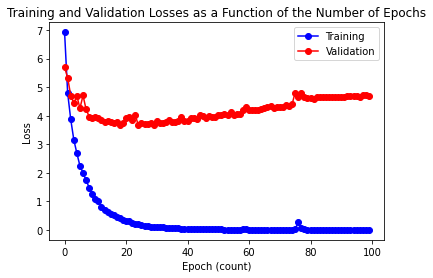

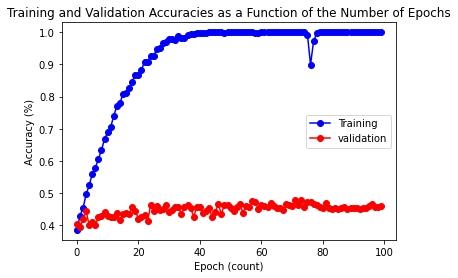

In [ ]:
plot_history(model_output[1])

Testing Accuracy: 
 0.45989304812834225


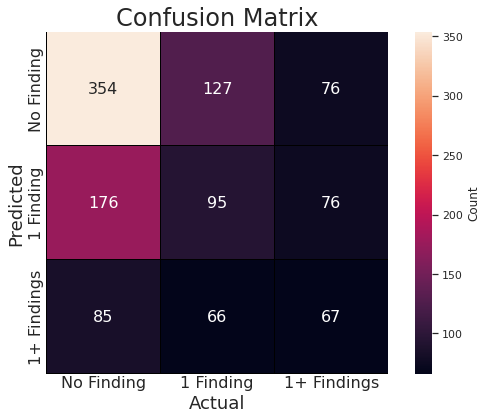

In [ ]:
test_accuracy, conf_matrix = evaluate_model(model_output[2], model_output[3]) #predictions, true_predictions 
print("Testing Accuracy: \n", test_accuracy)
plot_confusion(conf_matrix) 

None Finding Results
Accuracy 0.59
Precision 0.64
Recall (Sensitivity) 0.58
Specificity 0.6
F-1 Score 0.61
One Finding Results
Accuracy 0.6
Precision 0.27
Recall (Sensitivity) 0.33
Specificity 0.7
F-1 Score 0.3
Finding Finding Results
Accuracy 0.73
Precision 0.31
Recall (Sensitivity) 0.31
Specificity 0.83
F-1 Score 0.31


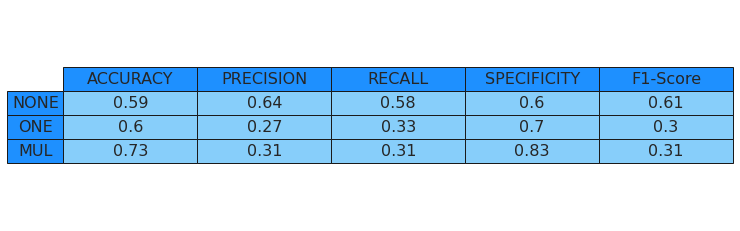

In [ ]:
none_TFPN = getTrueFalsePosNeg(conf_matrix, 0)
none_stats = summaryStatistics(none_TFPN[0], none_TFPN[1], none_TFPN[2], none_TFPN[3])

print("None Finding Results")
print("Accuracy", none_stats[0])
print("Precision", none_stats[1])
print("Recall (Sensitivity)", none_stats[2])
print("Specificity", none_stats[3])
print("F-1 Score", none_stats[4])

one_TFPN = getTrueFalsePosNeg(conf_matrix, 1)
one_stats = summaryStatistics(one_TFPN[0], one_TFPN[1], one_TFPN[2], one_TFPN[3])

print("One Finding Results")
print("Accuracy", one_stats[0])
print("Precision", one_stats[1])
print("Recall (Sensitivity)", one_stats[2])
print("Specificity", one_stats[3])
print("F-1 Score", one_stats[4])

mul_TFPN = getTrueFalsePosNeg(conf_matrix, 2)
mul_stats = summaryStatistics(mul_TFPN[0], mul_TFPN[1], mul_TFPN[2], mul_TFPN[3])

print("Finding Finding Results")
print("Accuracy", mul_stats[0])
print("Precision", mul_stats[1])
print("Recall (Sensitivity)", mul_stats[2])
print("Specificity", mul_stats[3])
print("F-1 Score", mul_stats[4])

tableResults(none_stats, one_stats, mul_stats)

#### Balanced 3-Class Model

In [ ]:
#X,y = tf.convert_to_tensor(target_df['images'], np.float32), tf.convert_to_tensor(target_df['labels'], np.float32)
picklefile = open(pkl_pathx, 'rb')
X_list = pickle.load(picklefile)

picklefile = open(pkl_pathy, 'rb')
y_list = pickle.load(picklefile)

X,y = np.asarray(X_list), np.asarray(y_list)

print(f'X is {len(X)}')
print(f'Y is {len(y)}')

X is 5606
Y is 5606


In [ ]:
sampling_df = pd.DataFrame(y, columns=['label'])

zero_indices = sampling_df[sampling_df["label"] == 0].index.tolist()[:980]
print(len(zero_indices))

one_indices = sampling_df[sampling_df["label"] == 1].index.tolist()[:980]
print(len(one_indices))

mult_indices = sampling_df[sampling_df["label"] == 2].index.tolist()[:980]
print(len(mult_indices))

print(len(zero_indices)+len(one_indices)+len(mult_indices))

sampled_indices = zero_indices + one_indices + mult_indices
len(sampled_indices)

980
980
980
2940


2940

In [ ]:
X = np.asarray([X[i] for i in sampled_indices])
y = np.asarray([y[i] for i in sampled_indices])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'Y_train is {len(y_train)} and Y_test is {len(y_test)}')

# Block training for testing
block_train = False

if block_train:
  X_train = X_train[:80] 
  y_train = y_train[:80]
  X_test = X_test[:20] 
  y_test = y_test[:20]

print(type(X))
print(type(y))

y_train_OHE = to_categorical(y_train, num_classes = 3)
y_test_OHE = to_categorical(y_test, num_classes = 3)

X_train_scaled = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_test_scaled = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_train_1d = X_train.reshape(X_train.shape[0], X_train_scaled)
X_test_1d = X_test.reshape(X_test.shape[0], X_test_scaled)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'y_train is {len(y_train)} and y_test is {len(y_test)}')

for i in range(len(X_train_1d)):
    X_train_1d_new = X_train_1d.reshape(len(X_train_1d),128,128,3)

for i in range(len(X_test_1d)):
    X_test_1d_new = X_test_1d.reshape(len(X_test_1d),128,128,3)

print("X_train final shape is: ",X_train_1d.shape)
print("X_train final shape is: ",X_train_1d_new.shape)

X_train is 2352 and X_test is 588
Y_train is 2352 and Y_test is 588
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train is 2352 and X_test is 588
y_train is 2352 and y_test is 588
X_train final shape is:  (2352, 49152)
X_train final shape is:  (2352, 128, 128, 3)


In [ ]:
print(y_train_OHE.shape)
#y_train_OHE
print(y_train.shape)
#y_train

(2352, 3)
(2352,)


In [ ]:
label_encoded_array = np.unique(y)
unbalanced_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
weight_data = {'labels': label_encoded_array, 'weight': unbalanced_weights}
#class_dict = dict(0=unbalanced_weights[0],1=unbalanced_weights[1], 2=unbalanced_weights[2])
class_dict = {i : unbalanced_weights[i] for i in range(3)}
pd.DataFrame(data=weight_data)

,labels,weight
0,0,1.0
1,1,1.0
2,2,1.0


In [ ]:
def model(X_train,y_train,X_test,y_test,input_weights):
    num_class = 3
    epochs = 100
    base_model = VGG16(weights = weight_path, include_top=False, input_shape=(128, 128, 3))

    # Add a new top layer
    x = base_model.output
    x = Flatten()(x)

    # Softmax
    prediction_layer = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=prediction_layer)

    # Do not train base layers; only top
    for layer in base_model.layers:
        layer.trainable = False

    # Compiler = categorical_crossentropy
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    # model.summary()

    # Fitting model
    b_history = model.fit(X_train,y_train, epochs=epochs, class_weight=input_weights, validation_data=(X_test,y_test), verbose=1,callbacks = [history('metrics')])
    #b_history = model.fit(X_train,y_train, epochs=epochs, class_weight=input_weights, validation_data=(X_test,y_test), verbose=1)
    modelScore = model.evaluate(X_test,y_test, verbose=0)

    # Printing metrics
    print(f'Batch Loss: {modelScore[0]}')
    print(f'Accuracy: {modelScore[1]}')

    # Printing confusion matrix
    y_pred = model.predict(X_test)
    true_predictions = np.argmax(y_test,axis = 1) 
    predictions = np.argmax(y_pred,axis = 1) 

    #print(true_predictions)
    #print(predictions)
    return model, b_history, predictions, true_predictions 

In [ ]:
model_output = model(X_train_1d_new, y_train_OHE, X_test_1d_new, y_test_OHE, class_dict)

Epoch 1/100
74/74 [==============================] - 5s 66ms/step - loss: 8.8285 - accuracy: 0.3389 - val_loss: 5.7904 - val_accuracy: 0.4235
Epoch 2/100
74/74 [==============================] - 4s 51ms/step - loss: 5.3429 - accuracy: 0.4345 - val_loss: 5.3131 - val_accuracy: 0.4320
Epoch 3/100
74/74 [==============================] - 4s 51ms/step - loss: 4.0155 - accuracy: 0.4696 - val_loss: 5.1723 - val_accuracy: 0.4252
Epoch 4/100
74/74 [==============================] - 4s 53ms/step - loss: 3.4166 - accuracy: 0.5034 - val_loss: 5.2378 - val_accuracy: 0.4303
Epoch 5/100
74/74 [==============================] - 4s 52ms/step - loss: 2.8043 - accuracy: 0.5476 - val_loss: 4.8261 - val_accuracy: 0.4337
Epoch 6/100
74/74 [==============================] - 4s 51ms/step - loss: 2.4468 - accuracy: 0.5512 - val_loss: 4.6703 - val_accuracy: 0.4303
Epoch 7/100
74/74 [==============================] - 4s 52ms/step - loss: 1.9572 - accuracy: 0.6185 - val_loss: 4.6264 - val_accuracy: 0.4337
Epoch 

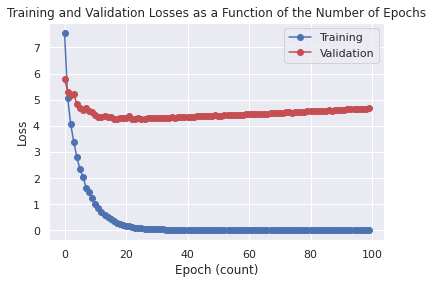

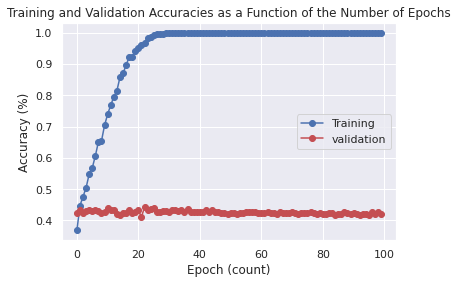

In [ ]:
plot_history(model_output[1])

Testing Accuracy: 
 0.4200680272108844


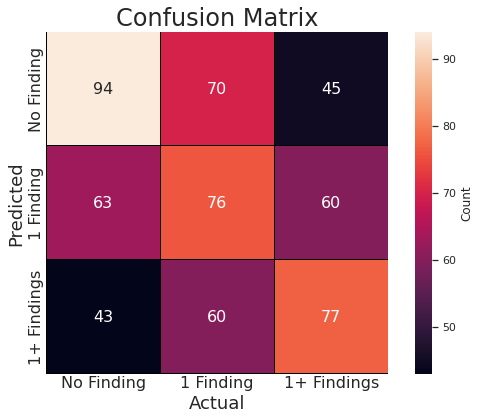

In [ ]:
test_accuracy, conf_matrix = evaluate_model(model_output[2], model_output[3]) #predictions, true_predictions 
print("Testing Accuracy: \n", test_accuracy)
plot_confusion(conf_matrix) 

None Finding Results
Accuracy 0.62
Precision 0.45
Recall (Sensitivity) 0.47
Specificity 0.7
F-1 Score 0.46
One Finding Results
Accuracy 0.57
Precision 0.38
Recall (Sensitivity) 0.37
Specificity 0.68
F-1 Score 0.37
Finding Finding Results
Accuracy 0.65
Precision 0.43
Recall (Sensitivity) 0.42
Specificity 0.75
F-1 Score 0.42


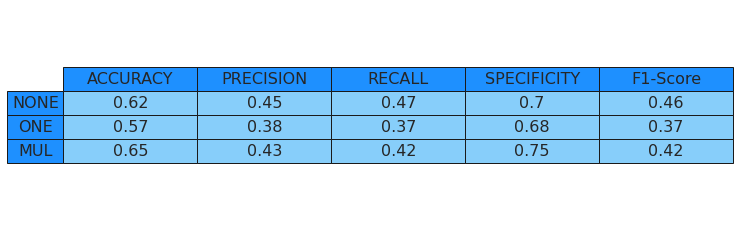

In [ ]:
none_TFPN = getTrueFalsePosNeg(conf_matrix, 0)
none_stats = summaryStatistics(none_TFPN[0], none_TFPN[1], none_TFPN[2], none_TFPN[3])

print("None Finding Results")
print("Accuracy", none_stats[0])
print("Precision", none_stats[1])
print("Recall (Sensitivity)", none_stats[2])
print("Specificity", none_stats[3])
print("F-1 Score", none_stats[4])

one_TFPN = getTrueFalsePosNeg(conf_matrix, 1)
one_stats = summaryStatistics(one_TFPN[0], one_TFPN[1], one_TFPN[2], one_TFPN[3])

print("One Finding Results")
print("Accuracy", one_stats[0])
print("Precision", one_stats[1])
print("Recall (Sensitivity)", one_stats[2])
print("Specificity", one_stats[3])
print("F-1 Score", one_stats[4])

mul_TFPN = getTrueFalsePosNeg(conf_matrix, 2)
mul_stats = summaryStatistics(mul_TFPN[0], mul_TFPN[1], mul_TFPN[2], mul_TFPN[3])

print("Finding Finding Results")
print("Accuracy", mul_stats[0])
print("Precision", mul_stats[1])
print("Recall (Sensitivity)", mul_stats[2])
print("Specificity", mul_stats[3])
print("F-1 Score", mul_stats[4])

tableResults(none_stats, one_stats, mul_stats)

### **c) Feature Engineering Step 1: Binary Classification**

#### Imbalanced Binary Classification

In [ ]:
#X,y = tf.convert_to_tensor(target_df['images'], np.float32), tf.convert_to_tensor(target_df['labels'], np.float32)
picklefile = open(pkl_pathx, 'rb')
X_list = pickle.load(picklefile)

picklefile = open(pkl_pathy, 'rb')
y_list = pickle.load(picklefile)

for n, i in enumerate(y_list) :
  if i == 2:
    y_list[n] = 1

X,y = np.asarray(X_list), np.asarray(y_list)

print(f'X is {len(X)}')
print(f'Y is {len(y)}')

X is 5606
Y is 5606


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'Y_train is {len(y_train)} and Y_test is {len(y_test)}')

# Block training for testing
block_train = False

if block_train:
  X_train = X_train[:80] 
  y_train = y_train[:80]
  X_test = X_test[:20] 
  y_test = y_test[:20]

print(type(X))
print(type(y))

y_train_OHE = to_categorical(y_train, num_classes = 2)
y_test_OHE = to_categorical(y_test, num_classes = 2)

X_train_scaled = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_test_scaled = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_train_1d = X_train.reshape(X_train.shape[0], X_train_scaled)
X_test_1d = X_test.reshape(X_test.shape[0], X_test_scaled)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'y_train is {len(y_train)} and y_test is {len(y_test)}')

for i in range(len(X_train_1d)):
    X_train_1d_new = X_train_1d.reshape(len(X_train_1d),128,128,3)

for i in range(len(X_test_1d)):
    X_test_1d_new = X_test_1d.reshape(len(X_test_1d),128,128,3)

print("X_train final shape is: ",X_train_1d.shape)
print("X_train final shape is: ",X_train_1d_new.shape)

X_train is 4484 and X_test is 1122
Y_train is 4484 and Y_test is 1122
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train is 4484 and X_test is 1122
y_train is 4484 and y_test is 1122
X_train final shape is:  (4484, 49152)
X_train final shape is:  (4484, 128, 128, 3)


In [ ]:
print(y_train_OHE.shape)
#y_train_OHE
print(y_train.shape)
#y_train

(4484, 2)
(4484,)


In [ ]:
label_encoded_array = np.unique(y)
unbalanced_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
weight_data = {'labels': label_encoded_array, 'weight': unbalanced_weights}
#class_dict = dict(0=unbalanced_weights[0],1=unbalanced_weights[1], 2=unbalanced_weights[2])
class_dict = {i : unbalanced_weights[i] for i in range(2)}
pd.DataFrame(data=weight_data)

,labels,weight
0,0,0.920828
1,1,1.094067


In [ ]:
def binary_model(X_train,y_train,X_test,y_test,input_weights):
    num_class = 2
    epochs = 20
    base_model = VGG16(weights = weight_path, include_top=False, input_shape=(128, 128, 3))

    # Add a new top layer
    x = base_model.output
    x = Flatten()(x)

    # Softmax
    prediction_layer = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=prediction_layer)

    # Do not train base layers; only top
    for layer in base_model.layers:
        layer.trainable = False

    # Compiler = categorical_crossentropy
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    # model.summary()

    # Fitting model
    b_history = model.fit(X_train,y_train, epochs=epochs, class_weight=input_weights, validation_data=(X_test,y_test), verbose=1,callbacks = [history('metrics')])
    #b_history = model.fit(X_train,y_train, epochs=epochs, class_weight=input_weights, validation_data=(X_test,y_test), verbose=1)
    modelScore = model.evaluate(X_test,y_test, verbose=0)

    # Printing metrics
    print(f'Batch Loss: {modelScore[0]}')
    print(f'Accuracy: {modelScore[1]}')

    # Printing confusion matrix
    y_pred = model.predict(X_test)
    true_predictions = np.argmax(y_test,axis = 1) 
    predictions = np.argmax(y_pred,axis = 1) 

    #print(true_predictions)
    #print(predictions)
    return model, b_history, predictions, true_predictions 

In [ ]:
binary_model_output = binary_model(X_train_1d_new, y_train_OHE, X_test_1d_new, y_test_OHE, class_dict)

Epoch 1/20
141/141 [==============================] - 8s 53ms/step - loss: 5.6119 - accuracy: 0.5619 - val_loss: 4.0092 - val_accuracy: 0.5588
Epoch 2/20
141/141 [==============================] - 8s 54ms/step - loss: 3.0932 - accuracy: 0.6080 - val_loss: 3.4027 - val_accuracy: 0.5873
Epoch 3/20
141/141 [==============================] - 8s 55ms/step - loss: 2.4106 - accuracy: 0.6287 - val_loss: 3.1125 - val_accuracy: 0.5731
Epoch 4/20
141/141 [==============================] - 8s 54ms/step - loss: 2.1156 - accuracy: 0.6458 - val_loss: 2.9152 - val_accuracy: 0.5820
Epoch 5/20
141/141 [==============================] - 7s 52ms/step - loss: 1.6258 - accuracy: 0.6756 - val_loss: 2.8841 - val_accuracy: 0.5677
Epoch 6/20
141/141 [==============================] - 7s 51ms/step - loss: 1.4483 - accuracy: 0.6978 - val_loss: 2.6578 - val_accuracy: 0.5847
Epoch 7/20
141/141 [==============================] - 7s 51ms/step - loss: 1.1955 - accuracy: 0.7281 - val_loss: 2.6106 - val_accuracy: 0.5873

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



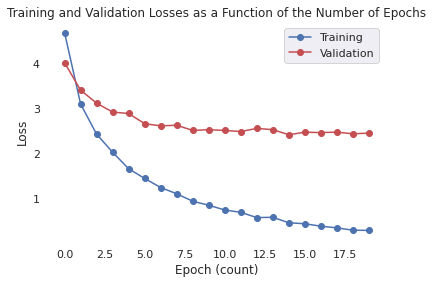

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



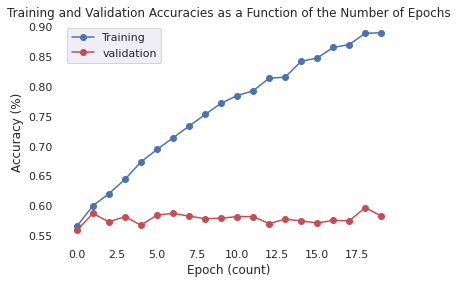

In [ ]:
plot_history(binary_model_output[1])

Testing Accuracy: 
 0.5828877005347594


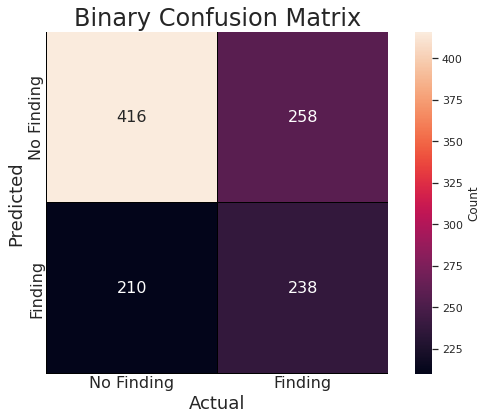

In [ ]:
binary_test_accuracy, binary_conf_matrix = evaluate_binary_model(binary_model_output[2], binary_model_output[3]) #predictions, true_predictions 
print("Testing Accuracy: \n", binary_test_accuracy)
plot_binary_confusion(binary_conf_matrix) 

In [ ]:
binary_stats = binary_summary_Statistics(binary_conf_matrix)

print("Binary Finding Results")
print("Accuracy", binary_stats[0])
print("Precision", binary_stats[1])
print("Recall (Sensitivity)", binary_stats[2])
print("Specificity", binary_stats[3])
print("F-1 Score", binary_stats[4])

Binary Finding Results
Accuracy 0.58
Precision 0.53
Recall (Sensitivity) 0.48
Specificity 0.66
F-1 Score 0.5


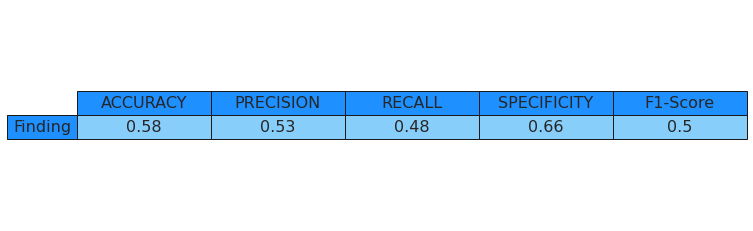

In [ ]:
binary_tableResults(binary_stats)

#### Binary Balanced Classification

In [ ]:
#X,y = tf.convert_to_tensor(target_df['images'], np.float32), tf.convert_to_tensor(target_df['labels'], np.float32)
picklefile = open(pkl_pathx, 'rb')
X_list = pickle.load(picklefile)

picklefile = open(pkl_pathy, 'rb')
y_list = pickle.load(picklefile)

for n, i in enumerate(y_list) :
  if i == 2:
    y_list[n] = 1

X,y = np.asarray(X_list), np.asarray(y_list)

print(f'X is {len(X)}')
print(f'Y is {len(y)}')

X is 5606
Y is 5606


In [ ]:
sampling_df_binary = pd.DataFrame(y, columns=['label'])

zero_indices_binary = sampling_df_binary[sampling_df_binary["label"] == 0].index.tolist()[:2562]
print(len(zero_indices_binary))

one_indices_binary = sampling_df_binary[sampling_df_binary["label"] == 1].index.tolist()[:2562]
print(len(one_indices_binary))

print(len(zero_indices_binary)+len(one_indices_binary))

sampled_indices_binary = zero_indices_binary + one_indices_binary
len(sampled_indices_binary)

2562
2562
5124


5124

In [ ]:
X = np.asarray([X[i] for i in sampled_indices_binary])
y = np.asarray([y[i] for i in sampled_indices_binary])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'Y_train is {len(y_train)} and Y_test is {len(y_test)}')

# Block training for testing
block_train = False

if block_train:
  X_train = X_train[:80] 
  y_train = y_train[:80]
  X_test = X_test[:20] 
  y_test = y_test[:20]

print(type(X))
print(type(y))

y_train_OHE = to_categorical(y_train, num_classes = 2)
y_test_OHE = to_categorical(y_test, num_classes = 2)

X_train_scaled = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_test_scaled = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_train_1d = X_train.reshape(X_train.shape[0], X_train_scaled)
X_test_1d = X_test.reshape(X_test.shape[0], X_test_scaled)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'y_train is {len(y_train)} and y_test is {len(y_test)}')

for i in range(len(X_train_1d)):
    X_train_1d_new = X_train_1d.reshape(len(X_train_1d),128,128,3)

for i in range(len(X_test_1d)):
    X_test_1d_new = X_test_1d.reshape(len(X_test_1d),128,128,3)

print("X_train final shape is: ",X_train_1d.shape)
print("X_train final shape is: ",X_train_1d_new.shape)

X_train is 4099 and X_test is 1025
Y_train is 4099 and Y_test is 1025
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train is 4099 and X_test is 1025
y_train is 4099 and y_test is 1025
X_train final shape is:  (4099, 49152)
X_train final shape is:  (4099, 128, 128, 3)


In [ ]:
print(y_train_OHE.shape)
#y_train_OHE
print(y_train.shape)
#y_train

(4099, 2)
(4099,)


In [ ]:
label_encoded_array = np.unique(y)
unbalanced_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
weight_data = {'labels': label_encoded_array, 'weight': unbalanced_weights}
#class_dict = dict(0=unbalanced_weights[0],1=unbalanced_weights[1], 2=unbalanced_weights[2])
class_dict = {i : unbalanced_weights[i] for i in range(2)}
pd.DataFrame(data=weight_data)

,labels,weight
0,0,1.0
1,1,1.0


In [ ]:
binary_model_output = binary_model(X_train_1d_new, y_train_OHE, X_test_1d_new, y_test_OHE, class_dict)

Epoch 1/20
129/129 [==============================] - 8s 54ms/step - loss: 5.2419 - accuracy: 0.5345 - val_loss: 3.7427 - val_accuracy: 0.5776
Epoch 2/20
129/129 [==============================] - 7s 51ms/step - loss: 3.0235 - accuracy: 0.6176 - val_loss: 3.2293 - val_accuracy: 0.5737
Epoch 3/20
129/129 [==============================] - 7s 52ms/step - loss: 2.3673 - accuracy: 0.6489 - val_loss: 2.9713 - val_accuracy: 0.5776
Epoch 4/20
129/129 [==============================] - 7s 54ms/step - loss: 1.9054 - accuracy: 0.6608 - val_loss: 2.8401 - val_accuracy: 0.5756
Epoch 5/20
129/129 [==============================] - 7s 55ms/step - loss: 1.5366 - accuracy: 0.6926 - val_loss: 2.7283 - val_accuracy: 0.5707
Epoch 6/20
129/129 [==============================] - 7s 53ms/step - loss: 1.3200 - accuracy: 0.7149 - val_loss: 2.6948 - val_accuracy: 0.5698
Epoch 7/20
129/129 [==============================] - 7s 52ms/step - loss: 1.1097 - accuracy: 0.7377 - val_loss: 2.6521 - val_accuracy: 0.5776

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



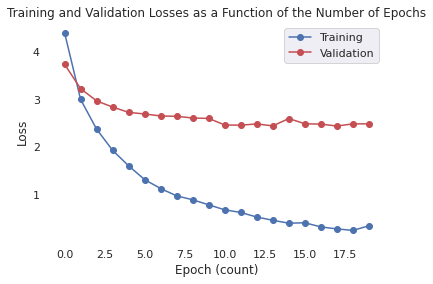

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



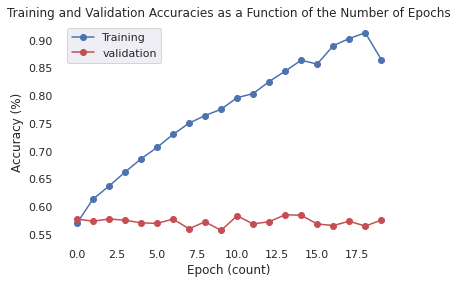

In [ ]:
plot_history(binary_model_output[1])

Testing Accuracy: 
 0.5756097560975609


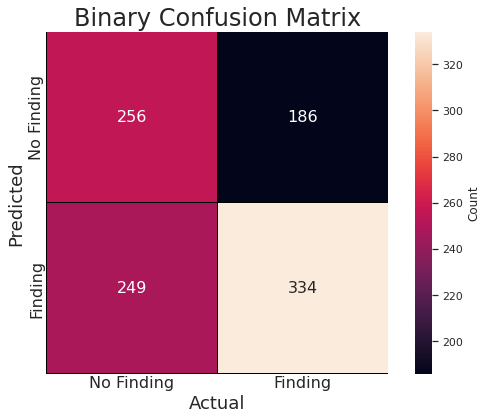

In [ ]:
binary_test_accuracy, binary_conf_matrix = evaluate_binary_model(binary_model_output[2], binary_model_output[3]) #predictions, true_predictions 
print("Testing Accuracy: \n", binary_test_accuracy)
plot_binary_confusion(binary_conf_matrix) 

In [ ]:
binary_stats = binary_summary_Statistics(binary_conf_matrix)

print("Binary Finding Results")
print("Accuracy", binary_stats[0])
print("Precision", binary_stats[1])
print("Recall (Sensitivity)", binary_stats[2])
print("Specificity", binary_stats[3])
print("F-1 Score", binary_stats[4])

Binary Finding Results
Accuracy 0.58
Precision 0.57
Recall (Sensitivity) 0.64
Specificity 0.51
F-1 Score 0.6


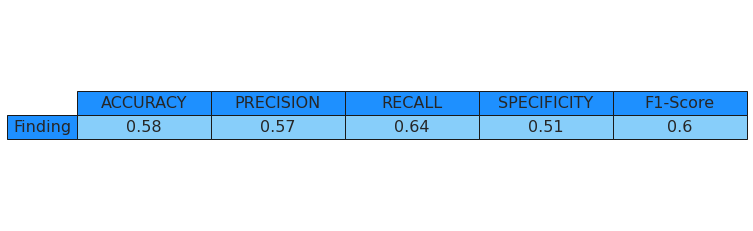

In [ ]:
binary_tableResults(binary_stats)

### **d) Feature Engineering Step 2: Balanced Image Augmentation**

#### Balanced Multiclass Image Augmentation

In [ ]:
#X,y = tf.convert_to_tensor(target_df['images'], np.float32), tf.convert_to_tensor(target_df['labels'], np.float32)
picklefile = open(pkl_pathx, 'rb')
X_list = pickle.load(picklefile)

picklefile = open(pkl_pathy, 'rb')
y_list = pickle.load(picklefile)

X,y = np.asarray(X_list), np.asarray(y_list)

print(f'X is {len(X)}')
print(f'Y is {len(y)}')

X is 5606
Y is 5606


In [ ]:
sampling_df = pd.DataFrame(y, columns=['label'])

zero_indices = sampling_df[sampling_df["label"] == 0].index.tolist()[:980]
print(len(zero_indices))

one_indices = sampling_df[sampling_df["label"] == 1].index.tolist()[:980]
print(len(one_indices))

mult_indices = sampling_df[sampling_df["label"] == 2].index.tolist()[:980]
print(len(mult_indices))

print(len(zero_indices)+len(one_indices)+len(mult_indices))

sampled_indices = zero_indices + one_indices + mult_indices
len(sampled_indices)

980
980
980
2940


2940

In [ ]:
X = np.asarray([X[i] for i in sampled_indices])
y = np.asarray([y[i] for i in sampled_indices])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'Y_train is {len(y_train)} and Y_test is {len(y_test)}')

# Block training for testing
block_train = False

if block_train:
  X_train = X_train[:80] 
  y_train = y_train[:80]
  X_test = X_test[:20] 
  y_test = y_test[:20]

print(type(X))
print(type(y))

y_train_OHE = to_categorical(y_train, num_classes = 3)
y_test_OHE = to_categorical(y_test, num_classes = 3)

X_train_scaled = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_test_scaled = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_train_1d = X_train.reshape(X_train.shape[0], X_train_scaled)
X_test_1d = X_test.reshape(X_test.shape[0], X_test_scaled)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'y_train is {len(y_train)} and y_test is {len(y_test)}')

for i in range(len(X_train_1d)):
    X_train_1d_new = X_train_1d.reshape(len(X_train_1d),128,128,3)

for i in range(len(X_test_1d)):
    X_test_1d_new = X_test_1d.reshape(len(X_test_1d),128,128,3)

print("X_train final shape is: ",X_train_1d.shape)
print("X_train final shape is: ",X_train_1d_new.shape)

X_train is 2352 and X_test is 588
Y_train is 2352 and Y_test is 588
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train is 2352 and X_test is 588
y_train is 2352 and y_test is 588
X_train final shape is:  (2352, 49152)
X_train final shape is:  (2352, 128, 128, 3)


In [ ]:
label_encoded_array = np.unique(y)
unbalanced_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
weight_data = {'labels': label_encoded_array, 'weight': unbalanced_weights}
#class_dict = dict(0=unbalanced_weights[0],1=unbalanced_weights[1], 2=unbalanced_weights[2])
class_dict = {i : unbalanced_weights[i] for i in range(3)}
pd.DataFrame(data=weight_data)

,labels,weight
0,0,1.0
1,1,1.0
2,2,1.0


In [ ]:
def augmented_multiclass_model(X_train,y_train,X_test,y_test,input_weights):
    num_class = 3
    epochs = 20
    base_model = VGG16(weights = weight_path, include_top=False, input_shape=(128, 128, 3))

    # Add a new top layer
    x = base_model.output
    x = Flatten()(x)

    # Softmax
    prediction_layer = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=prediction_layer)

    # Do not train base layers; only top
    for layer in base_model.layers:
        layer.trainable = False

    # Compiler = categorical_crossentropy
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    # model.summary()

    # Adding the Image Data Generator from Keras
    generator = ImageDataGenerator(
        rotation_range=20,
        horizontal_flip=True,
        vertical_flip=True,
    )
    generator.fit(X_train)
    itr = generator.flow(X_train, y_train)

    # Fitting the Model to the Augmented Data
    b_history = model.fit(x=itr, epochs=epochs, class_weight=input_weights, validation_data=(X_test,y_test), verbose=1,callbacks = [history('metrics')])
    modelScore = model.evaluate(X_test, y_test, verbose=0)

    # Printing metrics
    print(f'Batch Loss: {modelScore[0]}')
    print(f'Accuracy: {modelScore[1]}')

    # Printing confusion matrix
    y_pred = model.predict(X_test)
    true_predictions = np.argmax(y_test,axis = 1) 
    predictions = np.argmax(y_pred,axis = 1) 

    return model, b_history, predictions, true_predictions 

In [ ]:
augmented_mc_output = augmented_multiclass_model(X_train_1d_new, y_train_OHE, X_test_1d_new, y_test_OHE, class_dict)

Epoch 1/20
74/74 [==============================] - 11s 141ms/step - loss: 10.3839 - accuracy: 0.3396 - val_loss: 6.5228 - val_accuracy: 0.4456
Epoch 2/20
74/74 [==============================] - 10s 137ms/step - loss: 6.4067 - accuracy: 0.4073 - val_loss: 6.6116 - val_accuracy: 0.4473
Epoch 3/20
74/74 [==============================] - 10s 137ms/step - loss: 5.2649 - accuracy: 0.4509 - val_loss: 5.4422 - val_accuracy: 0.4609
Epoch 4/20
74/74 [==============================] - 10s 136ms/step - loss: 5.0218 - accuracy: 0.4504 - val_loss: 5.0675 - val_accuracy: 0.4541
Epoch 5/20
74/74 [==============================] - 10s 137ms/step - loss: 4.7467 - accuracy: 0.4391 - val_loss: 4.8930 - val_accuracy: 0.4609
Epoch 6/20
74/74 [==============================] - 10s 138ms/step - loss: 4.3553 - accuracy: 0.4489 - val_loss: 4.6729 - val_accuracy: 0.4796
Epoch 7/20
74/74 [==============================] - 10s 136ms/step - loss: 4.5149 - accuracy: 0.4322 - val_loss: 4.7285 - val_accuracy: 0.469

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



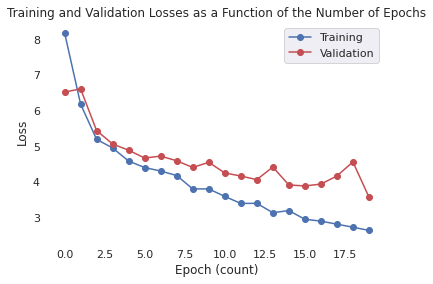

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



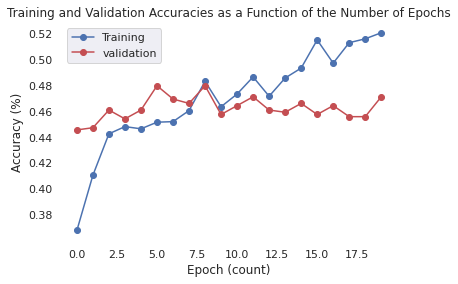

In [ ]:
plot_history(augmented_mc_output[1])

Testing Accuracy: 
 0.4710884353741497


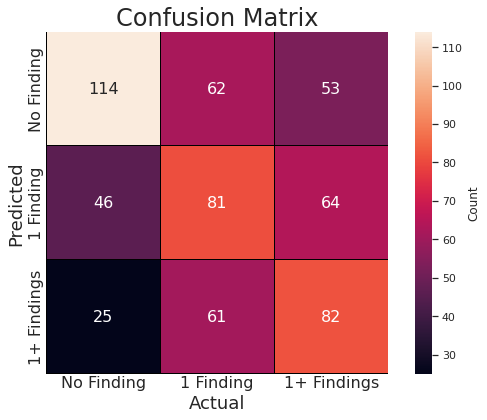

In [ ]:
test_accuracy, conf_matrix = evaluate_model(augmented_mc_output[2], augmented_mc_output[3]) #predictions, true_predictions 
print("Testing Accuracy: \n", test_accuracy)
plot_confusion(conf_matrix) 

None Finding Results
Accuracy 0.68
Precision 0.5
Recall (Sensitivity) 0.62
Specificity 0.71
F-1 Score 0.55
One Finding Results
Accuracy 0.6
Precision 0.42
Recall (Sensitivity) 0.4
Specificity 0.71
F-1 Score 0.41
Finding Finding Results
Accuracy 0.65
Precision 0.49
Recall (Sensitivity) 0.41
Specificity 0.78
F-1 Score 0.45


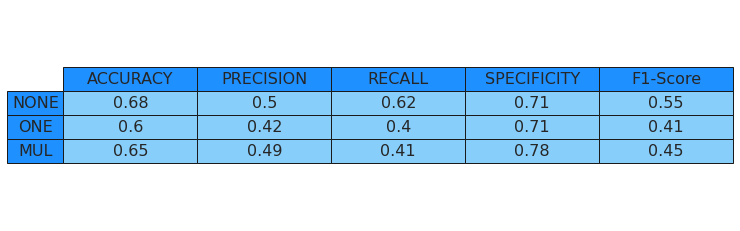

In [ ]:
none_TFPN = getTrueFalsePosNeg(conf_matrix, 0)
none_stats = summaryStatistics(none_TFPN[0], none_TFPN[1], none_TFPN[2], none_TFPN[3])

print("None Finding Results")
print("Accuracy", none_stats[0])
print("Precision", none_stats[1])
print("Recall (Sensitivity)", none_stats[2])
print("Specificity", none_stats[3])
print("F-1 Score", none_stats[4])

one_TFPN = getTrueFalsePosNeg(conf_matrix, 1)
one_stats = summaryStatistics(one_TFPN[0], one_TFPN[1], one_TFPN[2], one_TFPN[3])

print("One Finding Results")
print("Accuracy", one_stats[0])
print("Precision", one_stats[1])
print("Recall (Sensitivity)", one_stats[2])
print("Specificity", one_stats[3])
print("F-1 Score", one_stats[4])

mul_TFPN = getTrueFalsePosNeg(conf_matrix, 2)
mul_stats = summaryStatistics(mul_TFPN[0], mul_TFPN[1], mul_TFPN[2], mul_TFPN[3])

print("Finding Finding Results")
print("Accuracy", mul_stats[0])
print("Precision", mul_stats[1])
print("Recall (Sensitivity)", mul_stats[2])
print("Specificity", mul_stats[3])
print("F-1 Score", mul_stats[4])

tableResults(none_stats, one_stats, mul_stats)

#### Balanced Binary Image Augmentation (Binary accuracy)

In [ ]:
#X,y = tf.convert_to_tensor(target_df['images'], np.float32), tf.convert_to_tensor(target_df['labels'], np.float32)
picklefile = open(pkl_pathx, 'rb')
X_list = pickle.load(picklefile)

picklefile = open(pkl_pathy, 'rb')
y_list = pickle.load(picklefile)

for n, i in enumerate(y_list) :
  if i == 2:
    y_list[n] = 1

X,y = np.asarray(X_list), np.asarray(y_list)

print(f'X is {len(X)}')
print(f'Y is {len(y)}')

X is 5606
Y is 5606


In [ ]:
sampling_df_binary = pd.DataFrame(y, columns=['label'])

zero_indices_binary = sampling_df_binary[sampling_df_binary["label"] == 0].index.tolist()[:2562]
print(len(zero_indices_binary))

one_indices_binary = sampling_df_binary[sampling_df_binary["label"] == 1].index.tolist()[:2562]
print(len(one_indices_binary))

print(len(zero_indices_binary)+len(one_indices_binary))

sampled_indices_binary = zero_indices_binary + one_indices_binary
len(sampled_indices_binary)

2562
2562
5124


5124

In [ ]:
X = np.asarray([X[i] for i in sampled_indices_binary])
y = np.asarray([y[i] for i in sampled_indices_binary])

In [ ]:
label_encoded_array = np.unique(y)
unbalanced_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
weight_data = {'labels': label_encoded_array, 'weight': unbalanced_weights}
#class_dict = dict(0=unbalanced_weights[0],1=unbalanced_weights[1], 2=unbalanced_weights[2])
class_dict = {i : unbalanced_weights[i] for i in range(2)}
pd.DataFrame(data=weight_data)

,labels,weight
0,0,1.0
1,1,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'Y_train is {len(y_train)} and Y_test is {len(y_test)}')

# Block training for testing
block_train = False

if block_train:
  X_train = X_train[:80] 
  y_train = y_train[:80]
  X_test = X_test[:20] 
  y_test = y_test[:20]

print(type(X))
print(type(y))

y_train_OHE = to_categorical(y_train, num_classes = 2)
y_test_OHE = to_categorical(y_test, num_classes = 2)

X_train_scaled = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_test_scaled = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_train_1d = X_train.reshape(X_train.shape[0], X_train_scaled)
X_test_1d = X_test.reshape(X_test.shape[0], X_test_scaled)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'y_train is {len(y_train)} and y_test is {len(y_test)}')

for i in range(len(X_train_1d)):
    X_train_1d_new = X_train_1d.reshape(len(X_train_1d),128,128,3)

for i in range(len(X_test_1d)):
    X_test_1d_new = X_test_1d.reshape(len(X_test_1d),128,128,3)

print("X_train final shape is: ",X_train_1d.shape)
print("X_train final shape is: ",X_train_1d_new.shape)

X_train is 4099 and X_test is 1025
Y_train is 4099 and Y_test is 1025
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train is 4099 and X_test is 1025
y_train is 4099 and y_test is 1025
X_train final shape is:  (4099, 49152)
X_train final shape is:  (4099, 128, 128, 3)


In [ ]:
def augmented_binary_model(X_train,y_train,X_test,y_test,input_weights):
    num_class = 2
    epochs = 20
    base_model = VGG16(weights = weight_path, include_top=False, input_shape=(128, 128, 3))

    # Add a new top layer
    x = base_model.output
    x = Flatten()(x)

    # Softmax
    prediction_layer = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=prediction_layer)

    # Do not train base layers; only top
    for layer in base_model.layers:
        layer.trainable = False

    # Compiler = categorical_crossentropy
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['binary_accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=3, verbose=1)]
    # model.summary()

    # Adding the Image Data Generator from Keras
    generator = ImageDataGenerator(
        rotation_range=20,
        horizontal_flip=True,
        vertical_flip=True,
    )
    generator.fit(X_train)
    itr = generator.flow(X_train, y_train)

    # Fitting the Model to the Augmented Data
    b_history = model.fit(x=itr, epochs=epochs, class_weight=input_weights, validation_data=(X_test,y_test), verbose=1,callbacks = [history('metrics')])
    modelScore = model.evaluate(X_test, y_test, verbose=0)

    # Printing metrics
    print(f'Batch Loss: {modelScore[0]}')
    print(f'Accuracy: {modelScore[1]}')

    # Printing confusion matrix
    y_pred = model.predict(X_test)
    true_predictions = np.argmax(y_test,axis = 1) 
    predictions = np.argmax(y_pred,axis = 1) 

    #print(true_predictions)
    #print(predictions)
    return model, b_history, predictions, true_predictions 

In [ ]:
augmented_bin_output = augmented_binary_model(X_train_1d_new, y_train_OHE, X_test_1d_new, y_test_OHE, class_dict)

Epoch 1/20
129/129 [==============================] - 19s 139ms/step - loss: 3.7220 - binary_accuracy: 0.5602 - val_loss: 2.9794 - val_binary_accuracy: 0.6146
Epoch 2/20
129/129 [==============================] - 18s 138ms/step - loss: 2.6671 - binary_accuracy: 0.6066 - val_loss: 2.5913 - val_binary_accuracy: 0.6020
Epoch 3/20
129/129 [==============================] - 18s 137ms/step - loss: 2.4062 - binary_accuracy: 0.6174 - val_loss: 2.5705 - val_binary_accuracy: 0.6088
Epoch 4/20
129/129 [==============================] - 17s 133ms/step - loss: 2.2159 - binary_accuracy: 0.6078 - val_loss: 2.3030 - val_binary_accuracy: 0.6088
Epoch 5/20
129/129 [==============================] - 17s 134ms/step - loss: 2.1652 - binary_accuracy: 0.6163 - val_loss: 2.2013 - val_binary_accuracy: 0.6078
Epoch 6/20
129/129 [==============================] - 17s 134ms/step - loss: 1.9514 - binary_accuracy: 0.6409 - val_loss: 2.1655 - val_binary_accuracy: 0.6059
Epoch 7/20
129/129 [==========================

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:111: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



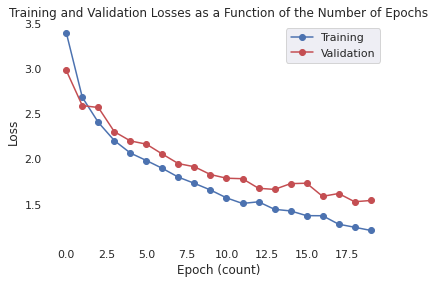

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



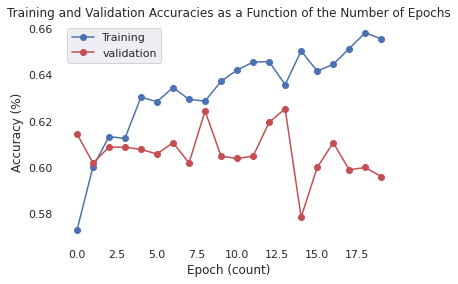

In [ ]:
plot_history_binary(augmented_bin_output[1])

Testing Accuracy: 
 0.5960975609756097


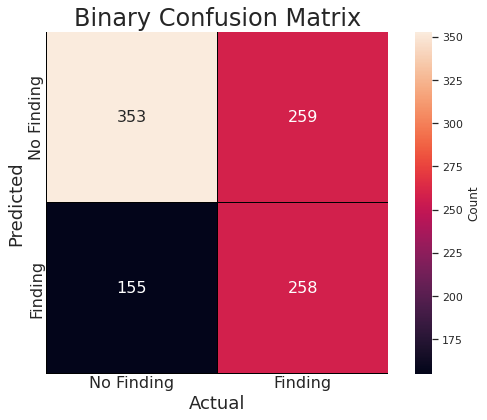

In [ ]:
binary_test_accuracy, binary_conf_matrix = evaluate_binary_model(augmented_bin_output[2], augmented_bin_output[3]) #predictions, true_predictions 
print("Testing Accuracy: \n", binary_test_accuracy)
plot_binary_confusion(binary_conf_matrix) 

In [ ]:
binary_stats = binary_summary_Statistics(binary_conf_matrix)

print("Binary Finding Results")
print("Accuracy", binary_stats[0])
print("Precision", binary_stats[1])
print("Recall (Sensitivity)", binary_stats[2])
print("Specificity", binary_stats[3])
print("F-1 Score", binary_stats[4])

Binary Finding Results
Accuracy 0.6
Precision 0.62
Recall (Sensitivity) 0.5
Specificity 0.69
F-1 Score 0.55


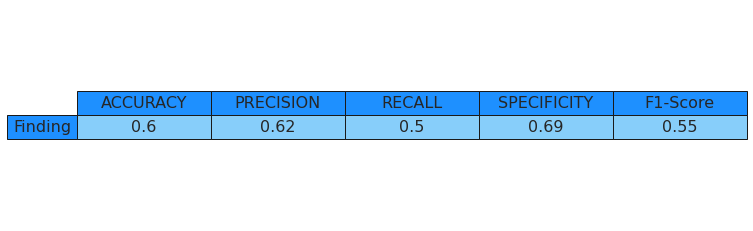

In [ ]:
binary_tableResults(binary_stats)

#### Balanced Multiclass Image Augmentation

In [ ]:
#X,y = tf.convert_to_tensor(target_df['images'], np.float32), tf.convert_to_tensor(target_df['labels'], np.float32)
picklefile = open(pkl_pathx, 'rb')
X_list = pickle.load(picklefile)

picklefile = open(pkl_pathy, 'rb')
y_list = pickle.load(picklefile)

X,y = np.asarray(X_list), np.asarray(y_list)

print(f'X is {len(X)}')
print(f'Y is {len(y)}')

X is 5606
Y is 5606


In [ ]:
sampling_df = pd.DataFrame(y, columns=['label'])

zero_indices = sampling_df[sampling_df["label"] == 0].index.tolist()[:980]
print(len(zero_indices))

one_indices = sampling_df[sampling_df["label"] == 1].index.tolist()[:980]
print(len(one_indices))

mult_indices = sampling_df[sampling_df["label"] == 2].index.tolist()[:980]
print(len(mult_indices))

print(len(zero_indices)+len(one_indices)+len(mult_indices))

sampled_indices = zero_indices + one_indices + mult_indices
len(sampled_indices)

980
980
980
2940


2940

In [ ]:
X = np.asarray([X[i] for i in sampled_indices])
y = np.asarray([y[i] for i in sampled_indices])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'Y_train is {len(y_train)} and Y_test is {len(y_test)}')

# Block training for testing
block_train = False

if block_train:
  X_train = X_train[:80] 
  y_train = y_train[:80]
  X_test = X_test[:20] 
  y_test = y_test[:20]

print(type(X))
print(type(y))

y_train_OHE = to_categorical(y_train, num_classes = 3)
y_test_OHE = to_categorical(y_test, num_classes = 3)

X_train_scaled = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_test_scaled = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_train_1d = X_train.reshape(X_train.shape[0], X_train_scaled)
X_test_1d = X_test.reshape(X_test.shape[0], X_test_scaled)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'y_train is {len(y_train)} and y_test is {len(y_test)}')

for i in range(len(X_train_1d)):
    X_train_1d_new = X_train_1d.reshape(len(X_train_1d),128,128,3)

for i in range(len(X_test_1d)):
    X_test_1d_new = X_test_1d.reshape(len(X_test_1d),128,128,3)

print("X_train final shape is: ",X_train_1d.shape)
print("X_train final shape is: ",X_train_1d_new.shape)

X_train is 2352 and X_test is 588
Y_train is 2352 and Y_test is 588
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train is 2352 and X_test is 588
y_train is 2352 and y_test is 588
X_train final shape is:  (2352, 49152)
X_train final shape is:  (2352, 128, 128, 3)


In [ ]:
label_encoded_array = np.unique(y)
unbalanced_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
weight_data = {'labels': label_encoded_array, 'weight': unbalanced_weights}
#class_dict = dict(0=unbalanced_weights[0],1=unbalanced_weights[1], 2=unbalanced_weights[2])
class_dict = {i : unbalanced_weights[i] for i in range(3)}
pd.DataFrame(data=weight_data)

,labels,weight
0,0,1.0
1,1,1.0
2,2,1.0


In [ ]:
def augmented_multiclass_model(X_train,y_train,X_test,y_test,input_weights):
    num_class = 3
    epochs = 100
    base_model = VGG16(weights = weight_path, include_top=False, input_shape=(128, 128, 3))

    # Add a new top layer
    x = base_model.output
    x = Flatten()(x)

    # Softmax
    prediction_layer = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=prediction_layer)

    # Do not train base layers; only top
    for layer in base_model.layers:
        layer.trainable = False

    # Compiler = categorical_crossentropy
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    # model.summary()

    # Adding the Image Data Generator from Keras
    generator = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        zoom_range = 0.2,
        fill_mode = 'nearest'
    )
    generator.fit(X_train)
    itr = generator.flow(X_train, y_train)

    # Fitting the Model to the Augmented Data
    b_history = model.fit(x=itr, epochs=epochs, class_weight=input_weights, validation_data=(X_test,y_test), verbose=1,callbacks = [history('metrics')])
    modelScore = model.evaluate(X_test, y_test, verbose=0)

    # Printing metrics
    print(f'Batch Loss: {modelScore[0]}')
    print(f'Accuracy: {modelScore[1]}')

    # Printing confusion matrix
    y_pred = model.predict(X_test)
    true_predictions = np.argmax(y_test,axis = 1) 
    predictions = np.argmax(y_pred,axis = 1) 

    return model, b_history, predictions, true_predictions 

In [ ]:
augmented_mc_output = augmented_multiclass_model(X_train_1d_new, y_train_OHE, X_test_1d_new, y_test_OHE, class_dict)

Epoch 1/100
74/74 [==============================] - 12s 148ms/step - loss: 1.1649 - accuracy: 0.3353 - val_loss: 15.5809 - val_accuracy: 0.3605
Epoch 2/100
74/74 [==============================] - 11s 145ms/step - loss: 1.1073 - accuracy: 0.3788 - val_loss: 15.6497 - val_accuracy: 0.3776
Epoch 3/100
74/74 [==============================] - 11s 146ms/step - loss: 1.0822 - accuracy: 0.4042 - val_loss: 16.1567 - val_accuracy: 0.3724
Epoch 4/100
74/74 [==============================] - 11s 144ms/step - loss: 1.0688 - accuracy: 0.4145 - val_loss: 14.7239 - val_accuracy: 0.3827
Epoch 5/100
74/74 [==============================] - 11s 142ms/step - loss: 1.0428 - accuracy: 0.4335 - val_loss: 16.6185 - val_accuracy: 0.3980
Epoch 6/100
74/74 [==============================] - 10s 141ms/step - loss: 1.0312 - accuracy: 0.4656 - val_loss: 18.8118 - val_accuracy: 0.3980
Epoch 7/100
74/74 [==============================] - 11s 142ms/step - loss: 1.0312 - accuracy: 0.4767 - val_loss: 17.5612 - val_ac

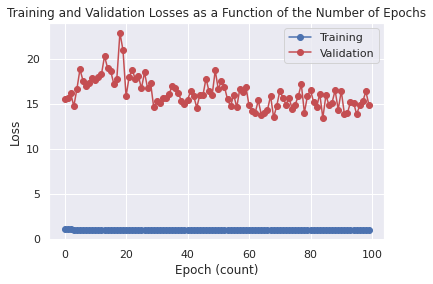

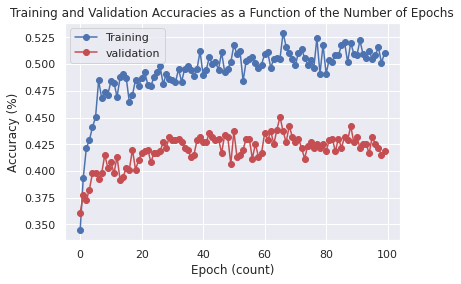

In [ ]:
plot_history(augmented_mc_output[1])

Testing Accuracy: 
 0.41836734693877553


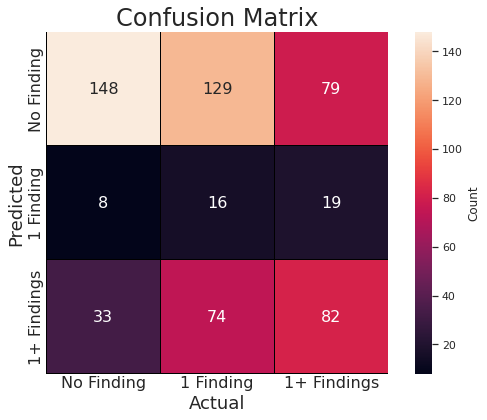

In [ ]:
test_accuracy, conf_matrix = evaluate_model(augmented_mc_output[2], augmented_mc_output[3]) #predictions, true_predictions 
print("Testing Accuracy: \n", test_accuracy)
plot_confusion(conf_matrix) 

None Finding Results
Accuracy 0.58
Precision 0.42
Recall (Sensitivity) 0.78
Specificity 0.48
F-1 Score 0.55
One Finding Results
Accuracy 0.61
Precision 0.37
Recall (Sensitivity) 0.07
Specificity 0.93
F-1 Score 0.12
Finding Finding Results
Accuracy 0.65
Precision 0.43
Recall (Sensitivity) 0.46
Specificity 0.74
F-1 Score 0.44


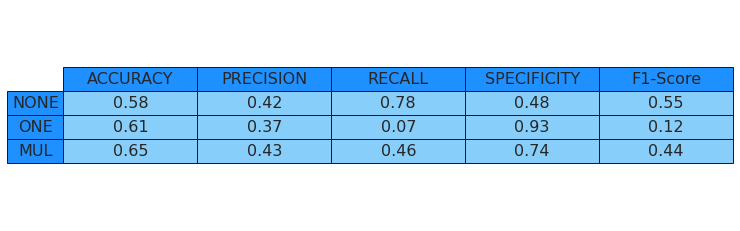

In [ ]:
none_TFPN = getTrueFalsePosNeg(conf_matrix, 0)
none_stats = summaryStatistics(none_TFPN[0], none_TFPN[1], none_TFPN[2], none_TFPN[3])

print("None Finding Results")
print("Accuracy", none_stats[0])
print("Precision", none_stats[1])
print("Recall (Sensitivity)", none_stats[2])
print("Specificity", none_stats[3])
print("F-1 Score", none_stats[4])

one_TFPN = getTrueFalsePosNeg(conf_matrix, 1)
one_stats = summaryStatistics(one_TFPN[0], one_TFPN[1], one_TFPN[2], one_TFPN[3])

print("One Finding Results")
print("Accuracy", one_stats[0])
print("Precision", one_stats[1])
print("Recall (Sensitivity)", one_stats[2])
print("Specificity", one_stats[3])
print("F-1 Score", one_stats[4])

mul_TFPN = getTrueFalsePosNeg(conf_matrix, 2)
mul_stats = summaryStatistics(mul_TFPN[0], mul_TFPN[1], mul_TFPN[2], mul_TFPN[3])

print("Finding Finding Results")
print("Accuracy", mul_stats[0])
print("Precision", mul_stats[1])
print("Recall (Sensitivity)", mul_stats[2])
print("Specificity", mul_stats[3])
print("F-1 Score", mul_stats[4])

tableResults(none_stats, one_stats, mul_stats)

#### Balanced Binary Image Augmentation (Binary accuracy)

In [ ]:
#X,y = tf.convert_to_tensor(target_df['images'], np.float32), tf.convert_to_tensor(target_df['labels'], np.float32)
picklefile = open(pkl_pathx, 'rb')
X_list = pickle.load(picklefile)

picklefile = open(pkl_pathy, 'rb')
y_list = pickle.load(picklefile)

for n, i in enumerate(y_list) :
  if i == 2:
    y_list[n] = 1

X,y = np.asarray(X_list), np.asarray(y_list)

print(f'X is {len(X)}')
print(f'Y is {len(y)}')

X is 5606
Y is 5606


In [ ]:
sampling_df_binary = pd.DataFrame(y, columns=['label'])

zero_indices_binary = sampling_df_binary[sampling_df_binary["label"] == 0].index.tolist()[:2562]
print(len(zero_indices_binary))

one_indices_binary = sampling_df_binary[sampling_df_binary["label"] == 1].index.tolist()[:2562]
print(len(one_indices_binary))

print(len(zero_indices_binary)+len(one_indices_binary))

sampled_indices_binary = zero_indices_binary + one_indices_binary
len(sampled_indices_binary)

2562
2562
5124


5124

In [ ]:
X = np.asarray([X[i] for i in sampled_indices_binary])
y = np.asarray([y[i] for i in sampled_indices_binary])

In [ ]:
label_encoded_array = np.unique(y)
unbalanced_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
weight_data = {'labels': label_encoded_array, 'weight': unbalanced_weights}
#class_dict = dict(0=unbalanced_weights[0],1=unbalanced_weights[1], 2=unbalanced_weights[2])
class_dict = {i : unbalanced_weights[i] for i in range(2)}
pd.DataFrame(data=weight_data)

,labels,weight
0,0,1.0
1,1,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'Y_train is {len(y_train)} and Y_test is {len(y_test)}')

# Block training for testing
block_train = False

if block_train:
  X_train = X_train[:80] 
  y_train = y_train[:80]
  X_test = X_test[:20] 
  y_test = y_test[:20]

print(type(X))
print(type(y))

y_train_OHE = to_categorical(y_train, num_classes = 2)
y_test_OHE = to_categorical(y_test, num_classes = 2)

X_train_scaled = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_test_scaled = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_train_1d = X_train.reshape(X_train.shape[0], X_train_scaled)
X_test_1d = X_test.reshape(X_test.shape[0], X_test_scaled)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'y_train is {len(y_train)} and y_test is {len(y_test)}')

for i in range(len(X_train_1d)):
    X_train_1d_new = X_train_1d.reshape(len(X_train_1d),128,128,3)

for i in range(len(X_test_1d)):
    X_test_1d_new = X_test_1d.reshape(len(X_test_1d),128,128,3)

print("X_train final shape is: ",X_train_1d.shape)
print("X_train final shape is: ",X_train_1d_new.shape)

X_train is 4099 and X_test is 1025
Y_train is 4099 and Y_test is 1025
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train is 4099 and X_test is 1025
y_train is 4099 and y_test is 1025
X_train final shape is:  (4099, 49152)
X_train final shape is:  (4099, 128, 128, 3)


In [ ]:
def augmented_binary_model(X_train,y_train,X_test,y_test,input_weights):
    num_class = 2
    epochs = 20
    base_model = VGG16(weights = weight_path, include_top=False, input_shape=(128, 128, 3))

    # Add a new top layer
    x = base_model.output
    x = Flatten()(x)

    # Softmax
    prediction_layer = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=prediction_layer)

    # Do not train base layers; only top
    for layer in base_model.layers:
        layer.trainable = False

    # Compiler = categorical_crossentropy
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['binary_accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=3, verbose=1)]
    # model.summary()

    # Adding the Image Data Generator from Keras
    generator = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
    )
    generator.fit(X_train)
    itr = generator.flow(X_train, y_train)

    # Fitting the Model to the Augmented Data
    b_history = model.fit(x=itr, epochs=epochs, class_weight=input_weights, validation_data=(X_test,y_test), verbose=1,callbacks = [history('metrics')])
    modelScore = model.evaluate(X_test, y_test, verbose=0)

    # Printing metrics
    print(f'Batch Loss: {modelScore[0]}')
    print(f'Accuracy: {modelScore[1]}')

    # Printing confusion matrix
    y_pred = model.predict(X_test)
    true_predictions = np.argmax(y_test,axis = 1) 
    predictions = np.argmax(y_pred,axis = 1) 

    #print(true_predictions)
    #print(predictions)
    return model, b_history, predictions, true_predictions 

In [ ]:
augmented_bin_output = augmented_binary_model(X_train_1d_new, y_train_OHE, X_test_1d_new, y_test_OHE, class_dict)

Epoch 1/20
129/129 [==============================] - 18s 134ms/step - loss: 0.7102 - binary_accuracy: 0.5345 - val_loss: 8.5682 - val_binary_accuracy: 0.5356
Epoch 2/20
129/129 [==============================] - 17s 130ms/step - loss: 0.6652 - binary_accuracy: 0.6154 - val_loss: 7.8139 - val_binary_accuracy: 0.5805
Epoch 3/20
129/129 [==============================] - 17s 130ms/step - loss: 0.6575 - binary_accuracy: 0.6235 - val_loss: 6.9420 - val_binary_accuracy: 0.6263
Epoch 4/20
129/129 [==============================] - 17s 130ms/step - loss: 0.6486 - binary_accuracy: 0.6326 - val_loss: 8.0641 - val_binary_accuracy: 0.6166
Epoch 5/20
129/129 [==============================] - 17s 130ms/step - loss: 0.6408 - binary_accuracy: 0.6476 - val_loss: 7.3500 - val_binary_accuracy: 0.6439
Epoch 6/20
129/129 [==============================] - 17s 132ms/step - loss: 0.6382 - binary_accuracy: 0.6534 - val_loss: 7.9155 - val_binary_accuracy: 0.6380
Epoch 7/20
129/129 [==========================

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



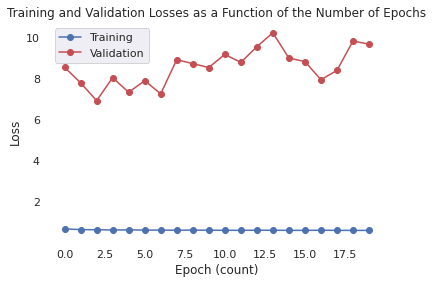

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



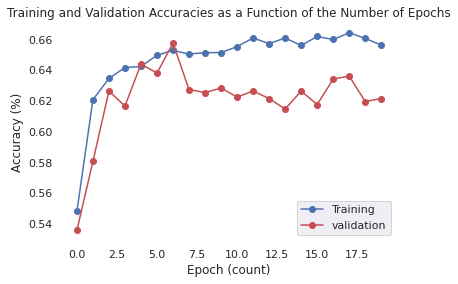

In [ ]:
plot_history_binary(augmented_bin_output[1])

Testing Accuracy: 
 0.6214634146341463


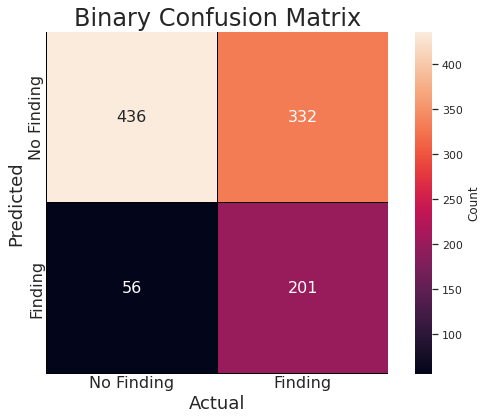

In [ ]:
binary_test_accuracy, binary_conf_matrix = evaluate_binary_model(augmented_bin_output[2], augmented_bin_output[3]) #predictions, true_predictions 
print("Testing Accuracy: \n", binary_test_accuracy)
plot_binary_confusion(binary_conf_matrix) 

In [ ]:
binary_stats = binary_summary_Statistics(binary_conf_matrix)

print("Binary Finding Results")
print("Accuracy", binary_stats[0])
print("Precision", binary_stats[1])
print("Recall (Sensitivity)", binary_stats[2])
print("Specificity", binary_stats[3])
print("F-1 Score", binary_stats[4])

Binary Finding Results
Accuracy 0.62
Precision 0.78
Recall (Sensitivity) 0.38
Specificity 0.89
F-1 Score 0.51


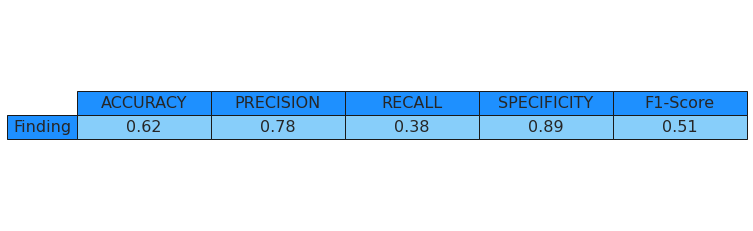

In [ ]:
binary_tableResults(binary_stats)

### **e) Feature Engineering Step 3: Attempting Other Pretrained Architectures & Hypertuning**

#### Balanced Multiclass Image Augmentation with ResNet-50

In [ ]:
#X,y = tf.convert_to_tensor(target_df['images'], np.float32), tf.convert_to_tensor(target_df['labels'], np.float32)
picklefile = open(pkl_pathx, 'rb')
X_list = pickle.load(picklefile)

picklefile = open(pkl_pathy, 'rb')
y_list = pickle.load(picklefile)

X,y = np.asarray(X_list), np.asarray(y_list)

print(f'X is {len(X)}')
print(f'Y is {len(y)}')

X is 5606
Y is 5606


In [ ]:
sampling_df = pd.DataFrame(y, columns=['label'])

zero_indices = sampling_df[sampling_df["label"] == 0].index.tolist()[:980]
print(len(zero_indices))

one_indices = sampling_df[sampling_df["label"] == 1].index.tolist()[:980]
print(len(one_indices))

mult_indices = sampling_df[sampling_df["label"] == 2].index.tolist()[:980]
print(len(mult_indices))

print(len(zero_indices)+len(one_indices)+len(mult_indices))

sampled_indices = zero_indices + one_indices + mult_indices
len(sampled_indices)

980
980
980
2940


2940

In [ ]:
X = np.asarray([X[i] for i in sampled_indices])
y = np.asarray([y[i] for i in sampled_indices])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'Y_train is {len(y_train)} and Y_test is {len(y_test)}')

# Block training for testing
block_train = False

if block_train:
  X_train = X_train[:80] 
  y_train = y_train[:80]
  X_test = X_test[:20] 
  y_test = y_test[:20]

print(type(X))
print(type(y))

y_train_OHE = to_categorical(y_train, num_classes = 3)
y_test_OHE = to_categorical(y_test, num_classes = 3)

X_train_scaled = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_test_scaled = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_train_1d = X_train.reshape(X_train.shape[0], X_train_scaled)
X_test_1d = X_test.reshape(X_test.shape[0], X_test_scaled)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'y_train is {len(y_train)} and y_test is {len(y_test)}')

for i in range(len(X_train_1d)):
    X_train_1d_new = X_train_1d.reshape(len(X_train_1d),128,128,3)

for i in range(len(X_test_1d)):
    X_test_1d_new = X_test_1d.reshape(len(X_test_1d),128,128,3)

print("X_train final shape is: ",X_train_1d.shape)
print("X_train final shape is: ",X_train_1d_new.shape)

X_train is 2352 and X_test is 588
Y_train is 2352 and Y_test is 588
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train is 2352 and X_test is 588
y_train is 2352 and y_test is 588
X_train final shape is:  (2352, 49152)
X_train final shape is:  (2352, 128, 128, 3)


In [ ]:
label_encoded_array = np.unique(y)
unbalanced_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
weight_data = {'labels': label_encoded_array, 'weight': unbalanced_weights}
#class_dict = dict(0=unbalanced_weights[0],1=unbalanced_weights[1], 2=unbalanced_weights[2])
class_dict = {i : unbalanced_weights[i] for i in range(3)}
pd.DataFrame(data=weight_data)

,labels,weight
0,0,1.0
1,1,1.0
2,2,1.0


In [ ]:
def augmented_multiclass_model(X_train,y_train,X_test,y_test,input_weights):
    num_class = 3
    epochs = 20
    base_model = ResNet50(weights = 'imagenet', include_top=False, input_shape=(128, 128, 3))

    # Add a new top layer
    x = base_model.output
    x = Flatten()(x)

    # Softmax
    prediction_layer = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=prediction_layer)

    # Do not train base layers; only top
    for layer in base_model.layers:
        layer.trainable = False

    # Compiler = categorical_crossentropy
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    # model.summary()

    # Adding the Image Data Generator from Keras
    generator = ImageDataGenerator(
        rotation_range=20,
        horizontal_flip=True,
        vertical_flip=True,
    )
    generator.fit(X_train)
    itr = generator.flow(X_train, y_train)

    # Fitting the Model to the Augmented Data
    b_history = model.fit(x=itr, epochs=epochs, class_weight=input_weights, validation_data=(X_test,y_test), verbose=1,callbacks = [history('metrics')])
    modelScore = model.evaluate(X_test, y_test, verbose=0)

    # Printing metrics
    print(f'Batch Loss: {modelScore[0]}')
    print(f'Accuracy: {modelScore[1]}')

    # Printing confusion matrix
    y_pred = model.predict(X_test)
    true_predictions = np.argmax(y_test,axis = 1) 
    predictions = np.argmax(y_pred,axis = 1) 

    return model, b_history, predictions, true_predictions 

In [ ]:
augmented_mc_output = augmented_multiclass_model(X_train_1d_new, y_train_OHE, X_test_1d_new, y_test_OHE, class_dict)

Epoch 1/20
74/74 [==============================] - 14s 158ms/step - loss: 1.9342 - accuracy: 0.4030 - val_loss: 1.5113 - val_accuracy: 0.4456
Epoch 2/20
74/74 [==============================] - 10s 135ms/step - loss: 1.4521 - accuracy: 0.4429 - val_loss: 1.4499 - val_accuracy: 0.4915
Epoch 3/20
74/74 [==============================] - 10s 135ms/step - loss: 1.2905 - accuracy: 0.4847 - val_loss: 1.5705 - val_accuracy: 0.4116
Epoch 4/20
74/74 [==============================] - 10s 137ms/step - loss: 1.3379 - accuracy: 0.4642 - val_loss: 1.3598 - val_accuracy: 0.4949
Epoch 5/20
74/74 [==============================] - 10s 136ms/step - loss: 1.1991 - accuracy: 0.5098 - val_loss: 1.5182 - val_accuracy: 0.4643
Epoch 6/20
74/74 [==============================] - 10s 137ms/step - loss: 1.2088 - accuracy: 0.5049 - val_loss: 1.5161 - val_accuracy: 0.4541
Epoch 7/20
74/74 [==============================] - 10s 140ms/step - loss: 1.2050 - accuracy: 0.5314 - val_loss: 1.3677 - val_accuracy: 0.4813

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



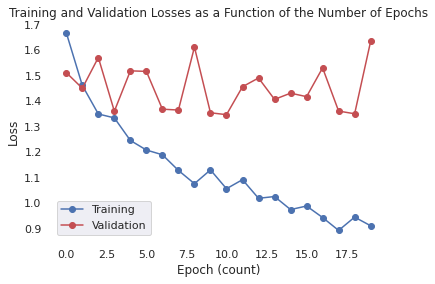

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



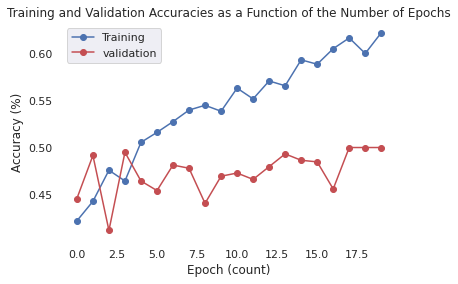

In [ ]:
plot_history(augmented_mc_output[1])

Testing Accuracy: 
 0.5


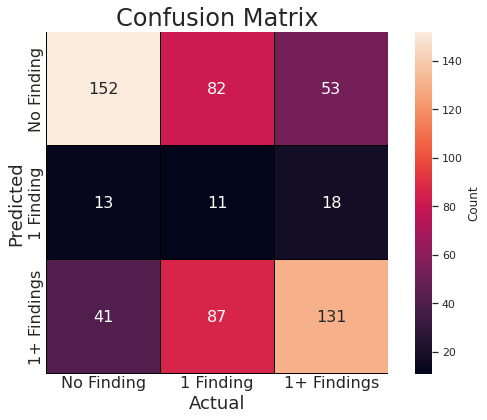

In [ ]:
test_accuracy, conf_matrix = evaluate_model(augmented_mc_output[2], augmented_mc_output[3]) #predictions, true_predictions 
print("Testing Accuracy: \n", test_accuracy)
plot_confusion(conf_matrix) 

None Finding Results
Accuracy 0.68
Precision 0.53
Recall (Sensitivity) 0.74
Specificity 0.65
F-1 Score 0.62
One Finding Results
Accuracy 0.66
Precision 0.26
Recall (Sensitivity) 0.06
Specificity 0.92
F-1 Score 0.1
Finding Finding Results
Accuracy 0.66
Precision 0.51
Recall (Sensitivity) 0.65
Specificity 0.67
F-1 Score 0.57


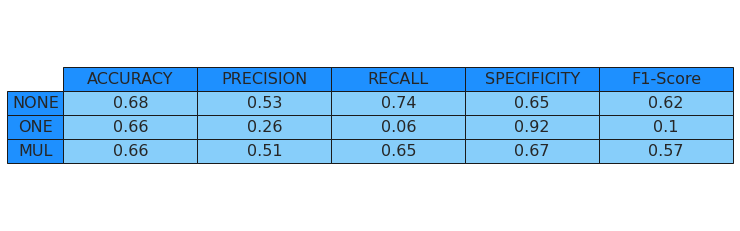

In [ ]:
none_TFPN = getTrueFalsePosNeg(conf_matrix, 0)
none_stats = summaryStatistics(none_TFPN[0], none_TFPN[1], none_TFPN[2], none_TFPN[3])

print("None Finding Results")
print("Accuracy", none_stats[0])
print("Precision", none_stats[1])
print("Recall (Sensitivity)", none_stats[2])
print("Specificity", none_stats[3])
print("F-1 Score", none_stats[4])

one_TFPN = getTrueFalsePosNeg(conf_matrix, 1)
one_stats = summaryStatistics(one_TFPN[0], one_TFPN[1], one_TFPN[2], one_TFPN[3])

print("One Finding Results")
print("Accuracy", one_stats[0])
print("Precision", one_stats[1])
print("Recall (Sensitivity)", one_stats[2])
print("Specificity", one_stats[3])
print("F-1 Score", one_stats[4])

mul_TFPN = getTrueFalsePosNeg(conf_matrix, 2)
mul_stats = summaryStatistics(mul_TFPN[0], mul_TFPN[1], mul_TFPN[2], mul_TFPN[3])

print("Finding Finding Results")
print("Accuracy", mul_stats[0])
print("Precision", mul_stats[1])
print("Recall (Sensitivity)", mul_stats[2])
print("Specificity", mul_stats[3])
print("F-1 Score", mul_stats[4])

tableResults(none_stats, one_stats, mul_stats)

#### Balanced Binary Image Augmentation with ResNet-50

In [ ]:
#X,y = tf.convert_to_tensor(target_df['images'], np.float32), tf.convert_to_tensor(target_df['labels'], np.float32)
picklefile = open(pkl_pathx, 'rb')
X_list = pickle.load(picklefile)

picklefile = open(pkl_pathy, 'rb')
y_list = pickle.load(picklefile)

for n, i in enumerate(y_list) :
  if i == 2:
    y_list[n] = 1

X,y = np.asarray(X_list), np.asarray(y_list)

print(f'X is {len(X)}')
print(f'Y is {len(y)}')

X is 5606
Y is 5606


In [ ]:
sampling_df_binary = pd.DataFrame(y, columns=['label'])

zero_indices_binary = sampling_df_binary[sampling_df_binary["label"] == 0].index.tolist()[:2562]
print(len(zero_indices_binary))

one_indices_binary = sampling_df_binary[sampling_df_binary["label"] == 1].index.tolist()[:2562]
print(len(one_indices_binary))

print(len(zero_indices_binary)+len(one_indices_binary))

sampled_indices_binary = zero_indices_binary + one_indices_binary
len(sampled_indices_binary)

2562
2562
5124


5124

In [ ]:
X = np.asarray([X[i] for i in sampled_indices_binary])
y = np.asarray([y[i] for i in sampled_indices_binary])

In [ ]:
label_encoded_array = np.unique(y)
unbalanced_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
weight_data = {'labels': label_encoded_array, 'weight': unbalanced_weights}
#class_dict = dict(0=unbalanced_weights[0],1=unbalanced_weights[1], 2=unbalanced_weights[2])
class_dict = {i : unbalanced_weights[i] for i in range(2)}
pd.DataFrame(data=weight_data)

,labels,weight
0,0,1.0
1,1,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'Y_train is {len(y_train)} and Y_test is {len(y_test)}')

# Block training for testing
block_train = False

if block_train:
  X_train = X_train[:80] 
  y_train = y_train[:80]
  X_test = X_test[:20] 
  y_test = y_test[:20]

print(type(X))
print(type(y))

y_train_OHE = to_categorical(y_train, num_classes = 2)
y_test_OHE = to_categorical(y_test, num_classes = 2)

X_train_scaled = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_test_scaled = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_train_1d = X_train.reshape(X_train.shape[0], X_train_scaled)
X_test_1d = X_test.reshape(X_test.shape[0], X_test_scaled)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'y_train is {len(y_train)} and y_test is {len(y_test)}')

for i in range(len(X_train_1d)):
    X_train_1d_new = X_train_1d.reshape(len(X_train_1d),128,128,3)

for i in range(len(X_test_1d)):
    X_test_1d_new = X_test_1d.reshape(len(X_test_1d),128,128,3)

print("X_train final shape is: ",X_train_1d.shape)
print("X_train final shape is: ",X_train_1d_new.shape)

X_train is 4099 and X_test is 1025
Y_train is 4099 and Y_test is 1025
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train is 4099 and X_test is 1025
y_train is 4099 and y_test is 1025
X_train final shape is:  (4099, 49152)
X_train final shape is:  (4099, 128, 128, 3)


In [ ]:
def augmented_binary_model(X_train,y_train,X_test,y_test,input_weights):
    num_class = 2
    epochs = 20
    base_model = ResNet50(weights = 'imagenet', include_top=False, input_shape=(128, 128, 3))

    # Add a new top layer
    x = base_model.output
    x = Flatten()(x)

    # Softmax
    prediction_layer = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=prediction_layer)

    # Do not train base layers; only top
    for layer in base_model.layers:
        layer.trainable = False

    # Compiler = categorical_crossentropy
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['binary_accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=3, verbose=1)]
    # model.summary()

    # Adding the Image Data Generator from Keras
    generator = ImageDataGenerator(
        # featurewise_center=True,
        # featurewise_std_normalization=True,
        rotation_range=20,
        horizontal_flip=True,
        vertical_flip=True,
    )
    generator.fit(X_train)
    itr = generator.flow(X_train, y_train)

    # Fitting the Model to the Augmented Data
    b_history = model.fit(x=itr, epochs=epochs, class_weight=input_weights, validation_data=(X_test,y_test), verbose=1,callbacks = [history('metrics')])
    modelScore = model.evaluate(X_test, y_test, verbose=0)

    # Printing metrics
    print(f'Batch Loss: {modelScore[0]}')
    print(f'Accuracy: {modelScore[1]}')

    # Printing confusion matrix
    y_pred = model.predict(X_test)
    true_predictions = np.argmax(y_test,axis = 1) 
    predictions = np.argmax(y_pred,axis = 1) 

    #print(true_predictions)
    #print(predictions)
    return model, b_history, predictions, true_predictions 

In [ ]:
augmented_bin_output = augmented_binary_model(X_train_1d_new, y_train_OHE, X_test_1d_new, y_test_OHE, class_dict)

Epoch 1/20
129/129 [==============================] - 21s 142ms/step - loss: 0.9038 - binary_accuracy: 0.5866 - val_loss: 0.8701 - val_binary_accuracy: 0.5717
Epoch 2/20
129/129 [==============================] - 18s 137ms/step - loss: 0.7613 - binary_accuracy: 0.6423 - val_loss: 0.8422 - val_binary_accuracy: 0.5863
Epoch 3/20
129/129 [==============================] - 18s 137ms/step - loss: 0.7442 - binary_accuracy: 0.6435 - val_loss: 0.7862 - val_binary_accuracy: 0.6029
Epoch 4/20
129/129 [==============================] - 17s 135ms/step - loss: 0.7138 - binary_accuracy: 0.6625 - val_loss: 0.7419 - val_binary_accuracy: 0.6400
Epoch 5/20
129/129 [==============================] - 18s 136ms/step - loss: 0.7053 - binary_accuracy: 0.6521 - val_loss: 0.7478 - val_binary_accuracy: 0.6371
Epoch 6/20
129/129 [==============================] - 17s 134ms/step - loss: 0.6856 - binary_accuracy: 0.6707 - val_loss: 0.7517 - val_binary_accuracy: 0.6302
Epoch 7/20
129/129 [==========================

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:111: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



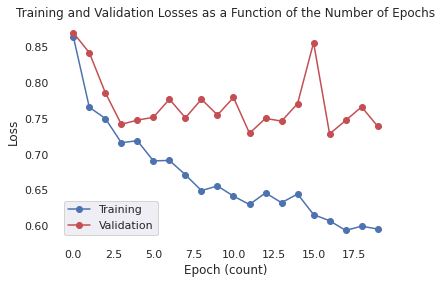

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



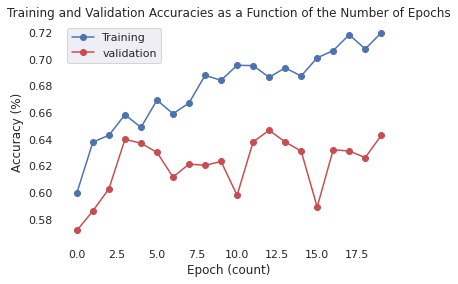

In [ ]:
plot_history_binary(augmented_bin_output[1])

Testing Accuracy: 
 0.6429268292682927


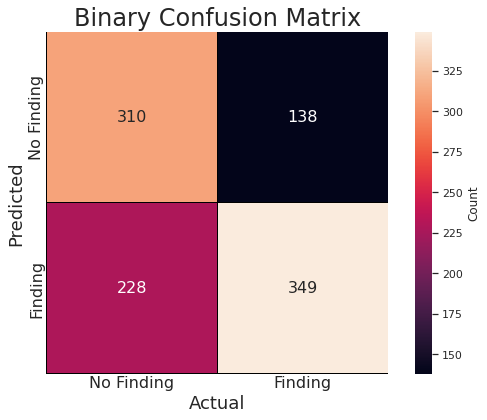

In [ ]:
binary_test_accuracy, binary_conf_matrix = evaluate_binary_model(augmented_bin_output[2], augmented_bin_output[3]) #predictions, true_predictions 
print("Testing Accuracy: \n", binary_test_accuracy)
plot_binary_confusion(binary_conf_matrix) 

In [ ]:
binary_stats = binary_summary_Statistics(binary_conf_matrix)

print("Binary Finding Results")
print("Accuracy", binary_stats[0])
print("Precision", binary_stats[1])
print("Recall (Sensitivity)", binary_stats[2])
print("Specificity", binary_stats[3])
print("F-1 Score", binary_stats[4])

Binary Finding Results
Accuracy 0.64
Precision 0.6
Recall (Sensitivity) 0.72
Specificity 0.58
F-1 Score 0.65


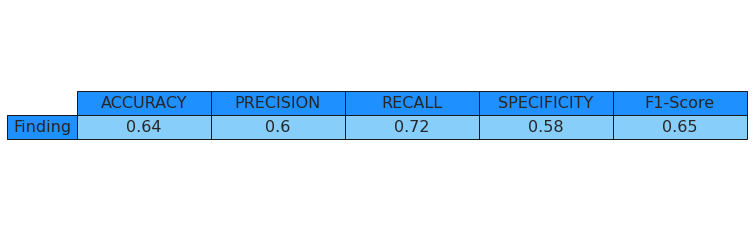

In [ ]:
binary_tableResults(binary_stats)

#### Balanced Multiclass Learning Rate Tuning (Low Better)



In [ ]:
#X,y = tf.convert_to_tensor(target_df['images'], np.float32), tf.convert_to_tensor(target_df['labels'], np.float32)
picklefile = open(pkl_pathx, 'rb')
X_list = pickle.load(picklefile)

picklefile = open(pkl_pathy, 'rb')
y_list = pickle.load(picklefile)

X,y = np.asarray(X_list), np.asarray(y_list)

print(f'X is {len(X)}')
print(f'Y is {len(y)}')

X is 5606
Y is 5606


In [ ]:
sampling_df = pd.DataFrame(y, columns=['label'])

zero_indices = sampling_df[sampling_df["label"] == 0].index.tolist()[:980]
print(len(zero_indices))

one_indices = sampling_df[sampling_df["label"] == 1].index.tolist()[:980]
print(len(one_indices))

mult_indices = sampling_df[sampling_df["label"] == 2].index.tolist()[:980]
print(len(mult_indices))

print(len(zero_indices)+len(one_indices)+len(mult_indices))

sampled_indices = zero_indices + one_indices + mult_indices
len(sampled_indices)

980
980
980
2940


2940

In [ ]:
X = np.asarray([X[i] for i in sampled_indices])
y = np.asarray([y[i] for i in sampled_indices])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'Y_train is {len(y_train)} and Y_test is {len(y_test)}')

# Block training for testing
block_train = False

if block_train:
  X_train = X_train[:80] 
  y_train = y_train[:80]
  X_test = X_test[:20] 
  y_test = y_test[:20]

print(type(X))
print(type(y))

y_train_OHE = to_categorical(y_train, num_classes = 3)
y_test_OHE = to_categorical(y_test, num_classes = 3)

X_train_scaled = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_test_scaled = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_train_1d = X_train.reshape(X_train.shape[0], X_train_scaled)
X_test_1d = X_test.reshape(X_test.shape[0], X_test_scaled)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'y_train is {len(y_train)} and y_test is {len(y_test)}')

for i in range(len(X_train_1d)):
    X_train_1d_new = X_train_1d.reshape(len(X_train_1d),128,128,3)

for i in range(len(X_test_1d)):
    X_test_1d_new = X_test_1d.reshape(len(X_test_1d),128,128,3)

print("X_train final shape is: ",X_train_1d.shape)
print("X_train final shape is: ",X_train_1d_new.shape)

X_train is 2352 and X_test is 588
Y_train is 2352 and Y_test is 588
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train is 2352 and X_test is 588
y_train is 2352 and y_test is 588
X_train final shape is:  (2352, 49152)
X_train final shape is:  (2352, 128, 128, 3)


In [ ]:
label_encoded_array = np.unique(y)
unbalanced_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
weight_data = {'labels': label_encoded_array, 'weight': unbalanced_weights}
#class_dict = dict(0=unbalanced_weights[0],1=unbalanced_weights[1], 2=unbalanced_weights[2])
class_dict = {i : unbalanced_weights[i] for i in range(3)}
pd.DataFrame(data=weight_data)

,labels,weight
0,0,1.0
1,1,1.0
2,2,1.0


In [ ]:
def augmented_multiclass_model_low_lr(X_train,y_train,X_test,y_test,input_weights):
    num_class = 3
    epochs = 10
    base_model = VGG16(weights = weight_path, include_top=False, input_shape=(128, 128, 3))

    # Add a new top layer
    x = base_model.output
    x = Flatten()(x)

    # Softmax
    prediction_layer = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=prediction_layer)

    # Do not train base layers; only top
    for layer in base_model.layers:
        layer.trainable = False

    # Compiler = categorical_crossentropy
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    # model.summary()

    # Adding the Image Data Generator from Keras
    generator = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        zoom_range = 0.2,
        fill_mode = 'nearest'
    )
    generator.fit(X_train)
    itr = generator.flow(X_train, y_train)

    # Fitting the Model to the Augmented Data
    b_history = model.fit(x=itr, epochs=epochs, class_weight=input_weights, validation_data=(X_test,y_test), verbose=1,callbacks = [history('metrics')])
    modelScore = model.evaluate(X_test, y_test, verbose=0)

    # Printing metrics
    print(f'Batch Loss: {modelScore[0]}')
    print(f'Accuracy: {modelScore[1]}')

    # Printing confusion matrix
    y_pred = model.predict(X_test)
    true_predictions = np.argmax(y_test,axis = 1) 
    predictions = np.argmax(y_pred,axis = 1) 

    return model, b_history, predictions, true_predictions 

In [ ]:
augmented_mc_output = augmented_multiclass_model_low_lr(X_train_1d_new, y_train_OHE, X_test_1d_new, y_test_OHE, class_dict)

Epoch 1/10
74/74 [==============================] - 11s 136ms/step - loss: 1.1971 - accuracy: 0.3241 - val_loss: 8.7984 - val_accuracy: 0.3810
Epoch 2/10
74/74 [==============================] - 10s 131ms/step - loss: 1.1001 - accuracy: 0.4032 - val_loss: 7.5736 - val_accuracy: 0.4405
Epoch 3/10
74/74 [==============================] - 10s 131ms/step - loss: 1.0511 - accuracy: 0.4440 - val_loss: 8.8487 - val_accuracy: 0.4694
Epoch 4/10
74/74 [==============================] - 10s 132ms/step - loss: 1.0495 - accuracy: 0.4502 - val_loss: 9.0712 - val_accuracy: 0.4643
Epoch 5/10
74/74 [==============================] - 10s 135ms/step - loss: 1.0155 - accuracy: 0.4748 - val_loss: 9.3814 - val_accuracy: 0.4762
Epoch 6/10
74/74 [==============================] - 10s 135ms/step - loss: 1.0240 - accuracy: 0.4792 - val_loss: 13.2570 - val_accuracy: 0.4677
Epoch 7/10
74/74 [==============================] - 10s 132ms/step - loss: 1.0169 - accuracy: 0.4917 - val_loss: 12.6170 - val_accuracy: 0.46

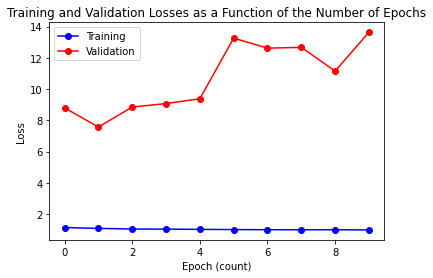

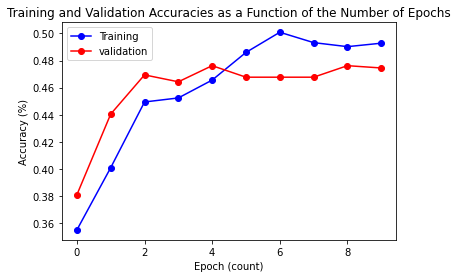

None Finding Results
Accuracy 0.64
Precision 0.46
Recall (Sensitivity) 0.82
Specificity 0.57
F-1 Score 0.59
One Finding Results
Accuracy 0.63
Precision 0.36
Recall (Sensitivity) 0.04
Specificity 0.96
F-1 Score 0.07
Finding Finding Results
Accuracy 0.68
Precision 0.5
Recall (Sensitivity) 0.62
Specificity 0.7
F-1 Score 0.55


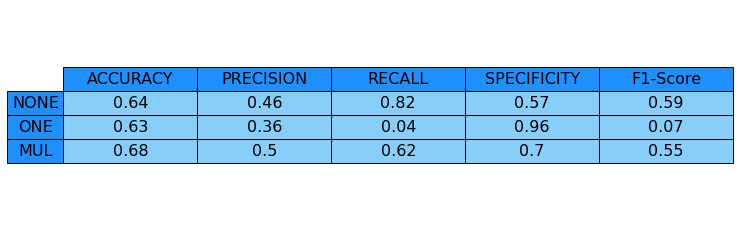

In [ ]:
plot_history(augmented_mc_output[1])
test_accuracy, conf_matrix = evaluate_model(augmented_mc_output[2], augmented_mc_output[3]) #predictions, true_predictions 
none_TFPN = getTrueFalsePosNeg(conf_matrix, 0)
none_stats = summaryStatistics(none_TFPN[0], none_TFPN[1], none_TFPN[2], none_TFPN[3])

print("None Finding Results")
print("Accuracy", none_stats[0])
print("Precision", none_stats[1])
print("Recall (Sensitivity)", none_stats[2])
print("Specificity", none_stats[3])
print("F-1 Score", none_stats[4])

one_TFPN = getTrueFalsePosNeg(conf_matrix, 1)
one_stats = summaryStatistics(one_TFPN[0], one_TFPN[1], one_TFPN[2], one_TFPN[3])

print("One Finding Results")
print("Accuracy", one_stats[0])
print("Precision", one_stats[1])
print("Recall (Sensitivity)", one_stats[2])
print("Specificity", one_stats[3])
print("F-1 Score", one_stats[4])

mul_TFPN = getTrueFalsePosNeg(conf_matrix, 2)
mul_stats = summaryStatistics(mul_TFPN[0], mul_TFPN[1], mul_TFPN[2], mul_TFPN[3])

print("Finding Finding Results")
print("Accuracy", mul_stats[0])
print("Precision", mul_stats[1])
print("Recall (Sensitivity)", mul_stats[2])
print("Specificity", mul_stats[3])
print("F-1 Score", mul_stats[4])

tableResults(none_stats, one_stats, mul_stats)

In [ ]:
def augmented_multiclass_model_high_lr(X_train,y_train,X_test,y_test,input_weights):
    num_class = 3
    epochs = 10
    base_model = VGG16(weights = weight_path, include_top=False, input_shape=(128, 128, 3))

    # Add a new top layer
    x = base_model.output
    x = Flatten()(x)

    # Softmax
    prediction_layer = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=prediction_layer)

    # Do not train base layers; only top
    for layer in base_model.layers:
        layer.trainable = False

    # Compiler = categorical_crossentropy
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.01), metrics=['accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    # model.summary()

    # Adding the Image Data Generator from Keras
    generator = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        zoom_range = 0.2,
        fill_mode = 'nearest'
    )
    generator.fit(X_train)
    itr = generator.flow(X_train, y_train)

    # Fitting the Model to the Augmented Data
    b_history = model.fit(x=itr, epochs=epochs, class_weight=input_weights, validation_data=(X_test,y_test), verbose=1,callbacks = [history('metrics')])
    modelScore = model.evaluate(X_test, y_test, verbose=0)

    # Printing metrics
    print(f'Batch Loss: {modelScore[0]}')
    print(f'Accuracy: {modelScore[1]}')

    # Printing confusion matrix
    y_pred = model.predict(X_test)
    true_predictions = np.argmax(y_test,axis = 1) 
    predictions = np.argmax(y_pred,axis = 1) 

    return model, b_history, predictions, true_predictions 

In [ ]:
augmented_mc_output = augmented_multiclass_model_high_lr(X_train_1d_new, y_train_OHE, X_test_1d_new, y_test_OHE, class_dict)

Epoch 1/10
74/74 [==============================] - 11s 141ms/step - loss: 3.6155 - accuracy: 0.3755 - val_loss: 44.2836 - val_accuracy: 0.4286
Epoch 2/10
74/74 [==============================] - 10s 133ms/step - loss: 2.5508 - accuracy: 0.4320 - val_loss: 111.3256 - val_accuracy: 0.4014
Epoch 3/10
74/74 [==============================] - 10s 132ms/step - loss: 2.9178 - accuracy: 0.4222 - val_loss: 88.5409 - val_accuracy: 0.4048
Epoch 4/10
74/74 [==============================] - 10s 133ms/step - loss: 2.5883 - accuracy: 0.4205 - val_loss: 108.7519 - val_accuracy: 0.3827
Epoch 5/10
74/74 [==============================] - 10s 133ms/step - loss: 3.2590 - accuracy: 0.4323 - val_loss: 79.9754 - val_accuracy: 0.4320
Epoch 6/10
74/74 [==============================] - 10s 131ms/step - loss: 2.5387 - accuracy: 0.4618 - val_loss: 122.4371 - val_accuracy: 0.3605
Epoch 7/10
74/74 [==============================] - 10s 131ms/step - loss: 2.4474 - accuracy: 0.4723 - val_loss: 90.6664 - val_accura

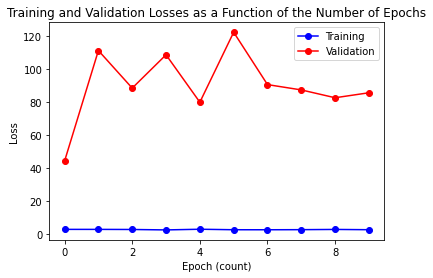

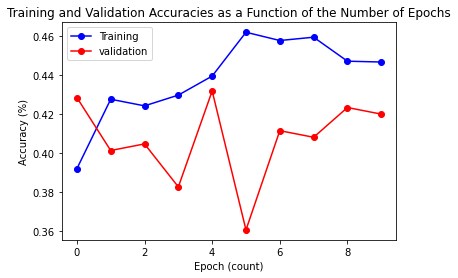

None Finding Results
Accuracy 0.62
Precision 0.43
Recall (Sensitivity) 0.66
Specificity 0.6
F-1 Score 0.52
One Finding Results
Accuracy 0.6
Precision 0.38
Recall (Sensitivity) 0.17
Specificity 0.85
F-1 Score 0.23
Finding Finding Results
Accuracy 0.62
Precision 0.43
Recall (Sensitivity) 0.47
Specificity 0.69
F-1 Score 0.45


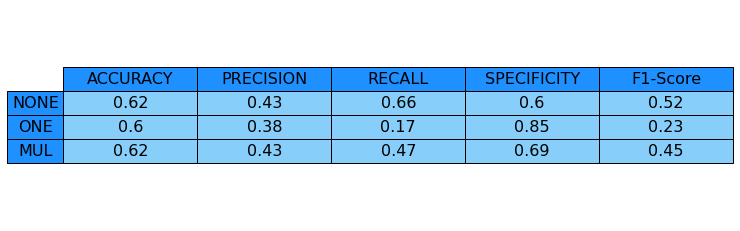

In [ ]:
plot_history(augmented_mc_output[1])
test_accuracy, conf_matrix = evaluate_model(augmented_mc_output[2], augmented_mc_output[3]) #predictions, true_predictions 
none_TFPN = getTrueFalsePosNeg(conf_matrix, 0)
none_stats = summaryStatistics(none_TFPN[0], none_TFPN[1], none_TFPN[2], none_TFPN[3])

print("None Finding Results")
print("Accuracy", none_stats[0])
print("Precision", none_stats[1])
print("Recall (Sensitivity)", none_stats[2])
print("Specificity", none_stats[3])
print("F-1 Score", none_stats[4])

one_TFPN = getTrueFalsePosNeg(conf_matrix, 1)
one_stats = summaryStatistics(one_TFPN[0], one_TFPN[1], one_TFPN[2], one_TFPN[3])

print("One Finding Results")
print("Accuracy", one_stats[0])
print("Precision", one_stats[1])
print("Recall (Sensitivity)", one_stats[2])
print("Specificity", one_stats[3])
print("F-1 Score", one_stats[4])

mul_TFPN = getTrueFalsePosNeg(conf_matrix, 2)
mul_stats = summaryStatistics(mul_TFPN[0], mul_TFPN[1], mul_TFPN[2], mul_TFPN[3])

print("Finding Finding Results")
print("Accuracy", mul_stats[0])
print("Precision", mul_stats[1])
print("Recall (Sensitivity)", mul_stats[2])
print("Specificity", mul_stats[3])
print("F-1 Score", mul_stats[4])

tableResults(none_stats, one_stats, mul_stats)

#### Balanced Binary Learning Rate Tuning (Higher Better)

In [ ]:
#X,y = tf.convert_to_tensor(target_df['images'], np.float32), tf.convert_to_tensor(target_df['labels'], np.float32)
picklefile = open(pkl_pathx, 'rb')
X_list = pickle.load(picklefile)

picklefile = open(pkl_pathy, 'rb')
y_list = pickle.load(picklefile)

for n, i in enumerate(y_list) :
  if i == 2:
    y_list[n] = 1

X,y = np.asarray(X_list), np.asarray(y_list)

print(f'X is {len(X)}')
print(f'Y is {len(y)}')

X is 5606
Y is 5606


In [ ]:
sampling_df_binary = pd.DataFrame(y, columns=['label'])

zero_indices_binary = sampling_df_binary[sampling_df_binary["label"] == 0].index.tolist()[:2562]
print(len(zero_indices_binary))

one_indices_binary = sampling_df_binary[sampling_df_binary["label"] == 1].index.tolist()[:2562]
print(len(one_indices_binary))

print(len(zero_indices_binary)+len(one_indices_binary))

sampled_indices_binary = zero_indices_binary + one_indices_binary
len(sampled_indices_binary)

2562
2562
5124


5124

In [ ]:
X = np.asarray([X[i] for i in sampled_indices_binary])
y = np.asarray([y[i] for i in sampled_indices_binary])

In [ ]:
label_encoded_array = np.unique(y)
unbalanced_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
weight_data = {'labels': label_encoded_array, 'weight': unbalanced_weights}
#class_dict = dict(0=unbalanced_weights[0],1=unbalanced_weights[1], 2=unbalanced_weights[2])
class_dict = {i : unbalanced_weights[i] for i in range(2)}
pd.DataFrame(data=weight_data)

,labels,weight
0,0,1.0
1,1,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'Y_train is {len(y_train)} and Y_test is {len(y_test)}')

# Block training for testing
block_train = False

if block_train:
  X_train = X_train[:80] 
  y_train = y_train[:80]
  X_test = X_test[:20] 
  y_test = y_test[:20]

print(type(X))
print(type(y))

y_train_OHE = to_categorical(y_train, num_classes = 2)
y_test_OHE = to_categorical(y_test, num_classes = 2)

X_train_scaled = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_test_scaled = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_train_1d = X_train.reshape(X_train.shape[0], X_train_scaled)
X_test_1d = X_test.reshape(X_test.shape[0], X_test_scaled)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'y_train is {len(y_train)} and y_test is {len(y_test)}')

for i in range(len(X_train_1d)):
    X_train_1d_new = X_train_1d.reshape(len(X_train_1d),128,128,3)

for i in range(len(X_test_1d)):
    X_test_1d_new = X_test_1d.reshape(len(X_test_1d),128,128,3)

print("X_train final shape is: ",X_train_1d.shape)
print("X_train final shape is: ",X_train_1d_new.shape)

X_train is 4099 and X_test is 1025
Y_train is 4099 and Y_test is 1025
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train is 4099 and X_test is 1025
y_train is 4099 and y_test is 1025
X_train final shape is:  (4099, 49152)
X_train final shape is:  (4099, 128, 128, 3)


In [ ]:
def augmented_binary_model(X_train,y_train,X_test,y_test,input_weights):
    num_class = 2
    epochs = 10
    base_model = VGG16(weights = weight_path, include_top=False, input_shape=(128, 128, 3))

    # Add a new top layer
    x = base_model.output
    x = Flatten()(x)

    # Softmax
    prediction_layer = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=prediction_layer)

    # Do not train base layers; only top
    for layer in base_model.layers:
        layer.trainable = False

    # Compiler = categorical_crossentropy
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['binary_accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=3, verbose=1)]
    # model.summary()

    # Adding the Image Data Generator from Keras
    generator = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
    )
    generator.fit(X_train)
    itr = generator.flow(X_train, y_train)

    # Fitting the Model to the Augmented Data
    b_history = model.fit(x=itr, epochs=epochs, class_weight=input_weights, validation_data=(X_test,y_test), verbose=1,callbacks = [history('metrics')])
    modelScore = model.evaluate(X_test, y_test, verbose=0)

    # Printing metrics
    print(f'Batch Loss: {modelScore[0]}')
    print(f'Accuracy: {modelScore[1]}')

    # Printing confusion matrix
    y_pred = model.predict(X_test)
    true_predictions = np.argmax(y_test,axis = 1) 
    predictions = np.argmax(y_pred,axis = 1) 

    #print(true_predictions)
    #print(predictions)
    return model, b_history, predictions, true_predictions 

In [ ]:
augmented_bin_output = augmented_binary_model(X_train_1d_new, y_train_OHE, X_test_1d_new, y_test_OHE, class_dict)

Epoch 1/10
129/129 [==============================] - 19s 141ms/step - loss: 0.7099 - binary_accuracy: 0.5190 - val_loss: 4.8192 - val_binary_accuracy: 0.6010
Epoch 2/10
129/129 [==============================] - 17s 135ms/step - loss: 0.6758 - binary_accuracy: 0.5926 - val_loss: 6.0910 - val_binary_accuracy: 0.6195
Epoch 3/10
129/129 [==============================] - 17s 132ms/step - loss: 0.6588 - binary_accuracy: 0.6131 - val_loss: 6.7163 - val_binary_accuracy: 0.6283
Epoch 4/10
129/129 [==============================] - 17s 132ms/step - loss: 0.6435 - binary_accuracy: 0.6396 - val_loss: 7.1379 - val_binary_accuracy: 0.6332
Epoch 5/10
129/129 [==============================] - 17s 132ms/step - loss: 0.6381 - binary_accuracy: 0.6381 - val_loss: 6.6853 - val_binary_accuracy: 0.6459
Epoch 6/10
129/129 [==============================] - 17s 134ms/step - loss: 0.6305 - binary_accuracy: 0.6511 - val_loss: 8.4177 - val_binary_accuracy: 0.6137
Epoch 7/10
129/129 [==========================

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:111: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



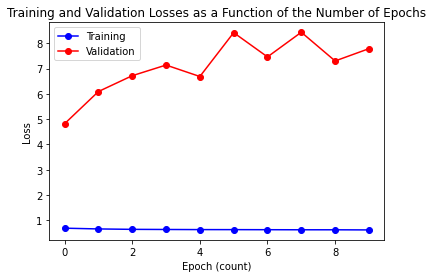

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



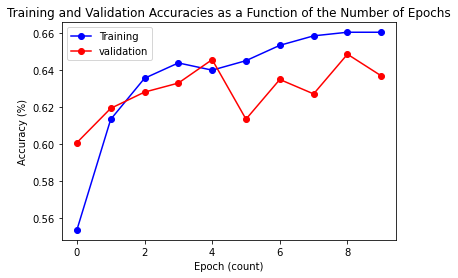

Binary Finding Results
Accuracy 0.64
Precision 0.73
Recall (Sensitivity) 0.45
Specificity 0.82
F-1 Score 0.56


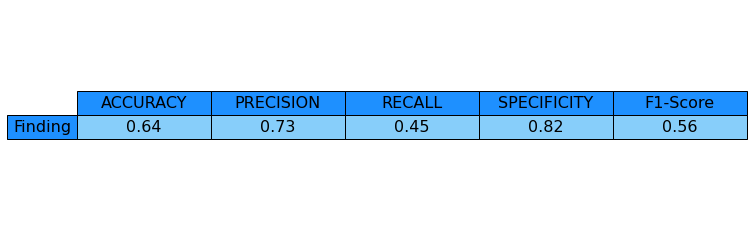

In [ ]:
plot_history_binary(augmented_bin_output[1])

binary_test_accuracy, binary_conf_matrix = evaluate_binary_model(augmented_bin_output[2], augmented_bin_output[3]) #predictions, true_predictions 

binary_stats = binary_summary_Statistics(binary_conf_matrix)

print("Binary Finding Results")
print("Accuracy", binary_stats[0])
print("Precision", binary_stats[1])
print("Recall (Sensitivity)", binary_stats[2])
print("Specificity", binary_stats[3])
print("F-1 Score", binary_stats[4])

binary_tableResults(binary_stats)

In [ ]:
def augmented_binary_model_higher_lr(X_train,y_train,X_test,y_test,input_weights):
    num_class = 2
    epochs = 10
    base_model = VGG16(weights = weight_path, include_top=False, input_shape=(128, 128, 3))

    # Add a new top layer
    x = base_model.output
    x = Flatten()(x)

    # Softmax
    prediction_layer = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=prediction_layer)

    # Do not train base layers; only top
    for layer in base_model.layers:
        layer.trainable = False

    # Compiler = categorical_crossentropy
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.01), metrics=['binary_accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=3, verbose=1)]
    # model.summary()

    # Adding the Image Data Generator from Keras
    generator = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
    )
    generator.fit(X_train)
    itr = generator.flow(X_train, y_train)

    # Fitting the Model to the Augmented Data
    b_history = model.fit(x=itr, epochs=epochs, class_weight=input_weights, validation_data=(X_test,y_test), verbose=1,callbacks = [history('metrics')])
    modelScore = model.evaluate(X_test, y_test, verbose=0)

    # Printing metrics
    print(f'Batch Loss: {modelScore[0]}')
    print(f'Accuracy: {modelScore[1]}')

    # Printing confusion matrix
    y_pred = model.predict(X_test)
    true_predictions = np.argmax(y_test,axis = 1) 
    predictions = np.argmax(y_pred,axis = 1) 

    #print(true_predictions)
    #print(predictions)
    return model, b_history, predictions, true_predictions 

In [ ]:
augmented_bin_output = augmented_binary_model_higher_lr(X_train_1d_new, y_train_OHE, X_test_1d_new, y_test_OHE, class_dict)

Epoch 1/10
129/129 [==============================] - 19s 139ms/step - loss: 1.3094 - binary_accuracy: 0.5695 - val_loss: 39.6638 - val_binary_accuracy: 0.5288
Epoch 2/10
129/129 [==============================] - 17s 135ms/step - loss: 1.0033 - binary_accuracy: 0.6037 - val_loss: 26.7083 - val_binary_accuracy: 0.5815
Epoch 3/10
129/129 [==============================] - 17s 133ms/step - loss: 1.1784 - binary_accuracy: 0.5926 - val_loss: 37.4213 - val_binary_accuracy: 0.5551
Epoch 4/10
129/129 [==============================] - 18s 136ms/step - loss: 1.0494 - binary_accuracy: 0.6047 - val_loss: 35.9734 - val_binary_accuracy: 0.5873
Epoch 5/10
129/129 [==============================] - 17s 132ms/step - loss: 1.2273 - binary_accuracy: 0.5990 - val_loss: 33.5626 - val_binary_accuracy: 0.6137
Epoch 6/10
129/129 [==============================] - 17s 131ms/step - loss: 1.2917 - binary_accuracy: 0.6172 - val_loss: 38.6981 - val_binary_accuracy: 0.6078
Epoch 7/10
129/129 [====================

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:111: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



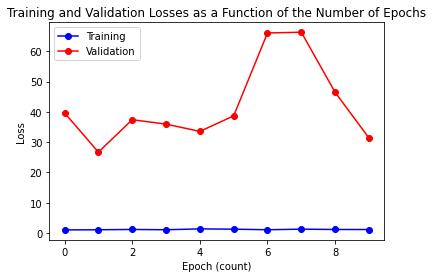

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



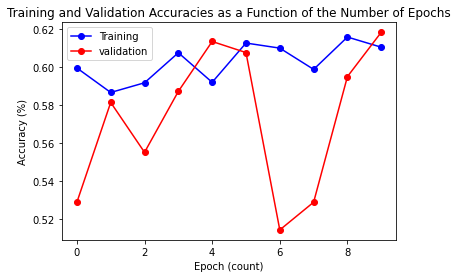

Binary Finding Results
Accuracy 0.62
Precision 0.64
Recall (Sensitivity) 0.55
Specificity 0.69
F-1 Score 0.59


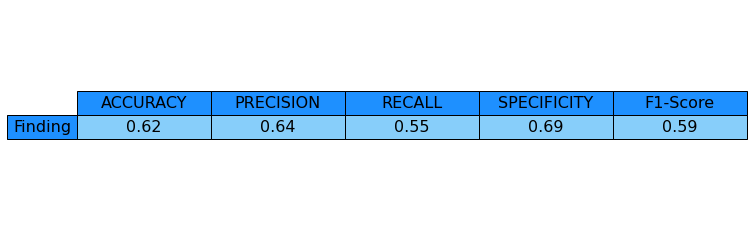

In [ ]:
plot_history_binary(augmented_bin_output[1])

binary_test_accuracy, binary_conf_matrix = evaluate_binary_model(augmented_bin_output[2], augmented_bin_output[3]) #predictions, true_predictions 

binary_stats = binary_summary_Statistics(binary_conf_matrix)

print("Binary Finding Results")
print("Accuracy", binary_stats[0])
print("Precision", binary_stats[1])
print("Recall (Sensitivity)", binary_stats[2])
print("Specificity", binary_stats[3])
print("F-1 Score", binary_stats[4])

binary_tableResults(binary_stats)

#### Initial Balanced Multiclass Custom Model 


In [ ]:
#X,y = tf.convert_to_tensor(target_df['images'], np.float32), tf.convert_to_tensor(target_df['labels'], np.float32)
picklefile = open(pkl_pathx, 'rb')
X_list = pickle.load(picklefile)

picklefile = open(pkl_pathy, 'rb')
y_list = pickle.load(picklefile)

X,y = np.asarray(X_list), np.asarray(y_list)

print(f'X is {len(X)}')
print(f'Y is {len(y)}')

X is 5606
Y is 5606


In [ ]:
sampling_df = pd.DataFrame(y, columns=['label'])

zero_indices = sampling_df[sampling_df["label"] == 0].index.tolist()[:980]
print(len(zero_indices))

one_indices = sampling_df[sampling_df["label"] == 1].index.tolist()[:980]
print(len(one_indices))

mult_indices = sampling_df[sampling_df["label"] == 2].index.tolist()[:980]
print(len(mult_indices))

print(len(zero_indices)+len(one_indices)+len(mult_indices))

sampled_indices = zero_indices + one_indices + mult_indices
len(sampled_indices)

980
980
980
2940


2940

In [ ]:
X = np.asarray([X[i] for i in sampled_indices])
y = np.asarray([y[i] for i in sampled_indices])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'Y_train is {len(y_train)} and Y_test is {len(y_test)}')

# Block training for testing
block_train = False

if block_train:
  X_train = X_train[:80] 
  y_train = y_train[:80]
  X_test = X_test[:20] 
  y_test = y_test[:20]

print(type(X))
print(type(y))

y_train_OHE = to_categorical(y_train, num_classes = 3)
y_test_OHE = to_categorical(y_test, num_classes = 3)

X_train_scaled = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_test_scaled = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_train_1d = X_train.reshape(X_train.shape[0], X_train_scaled)
X_test_1d = X_test.reshape(X_test.shape[0], X_test_scaled)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'y_train is {len(y_train)} and y_test is {len(y_test)}')

for i in range(len(X_train_1d)):
    X_train_1d_new = X_train_1d.reshape(len(X_train_1d),128,128,3)

for i in range(len(X_test_1d)):
    X_test_1d_new = X_test_1d.reshape(len(X_test_1d),128,128,3)

print("X_train final shape is: ",X_train_1d.shape)
print("X_train final shape is: ",X_train_1d_new.shape)

X_train is 2352 and X_test is 588
Y_train is 2352 and Y_test is 588
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train is 2352 and X_test is 588
y_train is 2352 and y_test is 588
X_train final shape is:  (2352, 49152)
X_train final shape is:  (2352, 128, 128, 3)


In [ ]:
label_encoded_array = np.unique(y)
unbalanced_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
weight_data = {'labels': label_encoded_array, 'weight': unbalanced_weights}
#class_dict = dict(0=unbalanced_weights[0],1=unbalanced_weights[1], 2=unbalanced_weights[2])
class_dict = {i : unbalanced_weights[i] for i in range(3)}
pd.DataFrame(data=weight_data)

,labels,weight
0,0,1.0
1,1,1.0
2,2,1.0


In [ ]:
def augmented_multiclass_model_custom(X_train,y_train,X_test,y_test,input_weights):
    num_class = 3
    epochs = 20

    # Creating a Sequential model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_class))
    model.add(Activation('softmax'))

    # Add a new top layer
    #x = base_model.output
    #x = Flatten()(x)

    # Softmax
    #prediction_layer = Dense(num_class, activation='softmax')(x)

    #model = Model(inputs=base_model.input, outputs=prediction_layer)

    # Do not train base layers; only top
    #for layer in base_model.layers:
    #    layer.trainable = False

    # Compiler = categorical_crossentropy
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    # model.summary()

    # Adding the Image Data Generator from Keras
    generator = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        zoom_range = 0.2,
        fill_mode = 'nearest'
    )
    generator.fit(X_train)
    itr = generator.flow(X_train, y_train)

    # Fitting the Model to the Augmented Data
    b_history = model.fit(x=itr, epochs=epochs, class_weight=input_weights, validation_data=(X_test,y_test), verbose=1,callbacks = [history('metrics')])
    modelScore = model.evaluate(X_test, y_test, verbose=0)

    # Printing metrics
    print(f'Batch Loss: {modelScore[0]}')
    print(f'Accuracy: {modelScore[1]}')

    # Printing confusion matrix
    y_pred = model.predict(X_test)
    true_predictions = np.argmax(y_test,axis = 1) 
    predictions = np.argmax(y_pred,axis = 1) 

    return model, b_history, predictions, true_predictions 

In [ ]:
augmented_mc_output = augmented_multiclass_model_custom(X_train_1d_new, y_train_OHE, X_test_1d_new, y_test_OHE, class_dict)

Epoch 1/10
74/74 [==============================] - 9s 119ms/step - loss: 1.0960 - accuracy: 0.3723 - val_loss: 43.4747 - val_accuracy: 0.3180
Epoch 2/10
74/74 [==============================] - 9s 116ms/step - loss: 1.0757 - accuracy: 0.4097 - val_loss: 77.6616 - val_accuracy: 0.3180
Epoch 3/10
74/74 [==============================] - 9s 116ms/step - loss: 1.0638 - accuracy: 0.4331 - val_loss: 73.4242 - val_accuracy: 0.3180
Epoch 4/10
74/74 [==============================] - 9s 118ms/step - loss: 1.0584 - accuracy: 0.4500 - val_loss: 82.0337 - val_accuracy: 0.3180
Epoch 5/10
74/74 [==============================] - 9s 119ms/step - loss: 1.0569 - accuracy: 0.4334 - val_loss: 98.6399 - val_accuracy: 0.3180
Epoch 6/10
74/74 [==============================] - 9s 119ms/step - loss: 1.0609 - accuracy: 0.4402 - val_loss: 77.1101 - val_accuracy: 0.3180
Epoch 7/10
74/74 [==============================] - 9s 121ms/step - loss: 1.0519 - accuracy: 0.4369 - val_loss: 95.0960 - val_accuracy: 0.3180

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



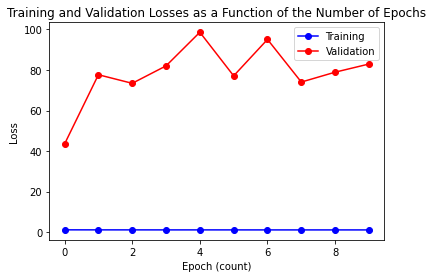

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



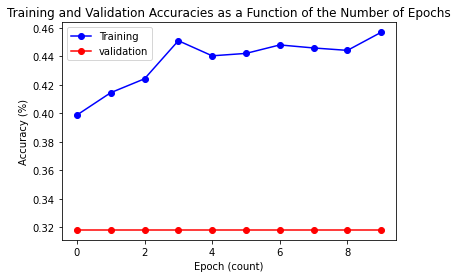

None Finding Results
Accuracy 0.32
Precision 0.32
Recall (Sensitivity) 1.0
Specificity 0.0
F-1 Score 0.48
One Finding Results
Accuracy 0.66
Precision ---
Recall (Sensitivity) 0.0
Specificity 1.0
F-1 Score ---
Finding Finding Results
Accuracy 0.66
Precision ---
Recall (Sensitivity) 0.0
Specificity 1.0
F-1 Score ---


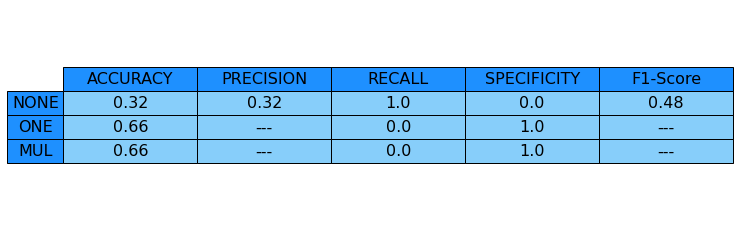

In [ ]:
plot_history(augmented_mc_output[1])
test_accuracy, conf_matrix = evaluate_model(augmented_mc_output[2], augmented_mc_output[3]) #predictions, true_predictions 
none_TFPN = getTrueFalsePosNeg(conf_matrix, 0)
none_stats = summaryStatistics(none_TFPN[0], none_TFPN[1], none_TFPN[2], none_TFPN[3])

print("None Finding Results")
print("Accuracy", none_stats[0])
print("Precision", none_stats[1])
print("Recall (Sensitivity)", none_stats[2])
print("Specificity", none_stats[3])
print("F-1 Score", none_stats[4])

one_TFPN = getTrueFalsePosNeg(conf_matrix, 1)
one_stats = summaryStatistics(one_TFPN[0], one_TFPN[1], one_TFPN[2], one_TFPN[3])

print("One Finding Results")
print("Accuracy", one_stats[0])
print("Precision", one_stats[1])
print("Recall (Sensitivity)", one_stats[2])
print("Specificity", one_stats[3])
print("F-1 Score", one_stats[4])

mul_TFPN = getTrueFalsePosNeg(conf_matrix, 2)
mul_stats = summaryStatistics(mul_TFPN[0], mul_TFPN[1], mul_TFPN[2], mul_TFPN[3])

print("Finding Finding Results")
print("Accuracy", mul_stats[0])
print("Precision", mul_stats[1])
print("Recall (Sensitivity)", mul_stats[2])
print("Specificity", mul_stats[3])
print("F-1 Score", mul_stats[4])

tableResults(none_stats, one_stats, mul_stats)

#### Tuning Multiclass DenseNet Model With Custom Layers


In [ ]:
from keras.applications.densenet import DenseNet121, preprocess_input

In [ ]:
from keras.layers import Input

In [ ]:
#X,y = tf.convert_to_tensor(target_df['images'], np.float32), tf.convert_to_tensor(target_df['labels'], np.float32)
picklefile = open(pkl_pathx, 'rb')
X_list = pickle.load(picklefile)

picklefile = open(pkl_pathy, 'rb')
y_list = pickle.load(picklefile)

X,y = np.asarray(X_list), np.asarray(y_list)

print(f'X is {len(X)}')
print(f'Y is {len(y)}')

X is 5606
Y is 5606


In [ ]:
sampling_df = pd.DataFrame(y, columns=['label'])

zero_indices = sampling_df[sampling_df["label"] == 0].index.tolist()[:980]
print(len(zero_indices))

one_indices = sampling_df[sampling_df["label"] == 1].index.tolist()[:980]
print(len(one_indices))

mult_indices = sampling_df[sampling_df["label"] == 2].index.tolist()[:980]
print(len(mult_indices))

print(len(zero_indices)+len(one_indices)+len(mult_indices))

sampled_indices = zero_indices + one_indices + mult_indices
len(sampled_indices)

980
980
980
2940


2940

In [ ]:
X = np.asarray([X[i] for i in sampled_indices])
y = np.asarray([y[i] for i in sampled_indices])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'Y_train is {len(y_train)} and Y_test is {len(y_test)}')

# Block training for testing
block_train = False

if block_train:
  X_train = X_train[:80] 
  y_train = y_train[:80]
  X_test = X_test[:20] 
  y_test = y_test[:20]

print(type(X))
print(type(y))

y_train_OHE = to_categorical(y_train, num_classes = 3)
y_test_OHE = to_categorical(y_test, num_classes = 3)

X_train_scaled = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_test_scaled = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_train_1d = X_train.reshape(X_train.shape[0], X_train_scaled)
X_test_1d = X_test.reshape(X_test.shape[0], X_test_scaled)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'y_train is {len(y_train)} and y_test is {len(y_test)}')

for i in range(len(X_train_1d)):
    X_train_1d_new = X_train_1d.reshape(len(X_train_1d),128,128,3)

for i in range(len(X_test_1d)):
    X_test_1d_new = X_test_1d.reshape(len(X_test_1d),128,128,3)

print("X_train final shape is: ",X_train_1d.shape)
print("X_train final shape is: ",X_train_1d_new.shape)

X_train is 2352 and X_test is 588
Y_train is 2352 and Y_test is 588
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train is 2352 and X_test is 588
y_train is 2352 and y_test is 588
X_train final shape is:  (2352, 49152)
X_train final shape is:  (2352, 128, 128, 3)


In [ ]:
label_encoded_array = np.unique(y)
unbalanced_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
weight_data = {'labels': label_encoded_array, 'weight': unbalanced_weights}
#class_dict = dict(0=unbalanced_weights[0],1=unbalanced_weights[1], 2=unbalanced_weights[2])
class_dict = {i : unbalanced_weights[i] for i in range(3)}
pd.DataFrame(data=weight_data)

,labels,weight
0,0,1.0
1,1,1.0
2,2,1.0


In [ ]:
def myFunc(image):
    image = np.array(image)
    hsv_image = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    return Image.fromarray(hsv_image)
    
def augmented_multiclass_model_dense_tune_batch(X_train,y_train,X_test,y_test,input_weights):
    num_class = 3
    epochs = 15

    img_in = Input(X_train.shape[1:])            
    model = DenseNet121(include_top= False, 
                weights='imagenet',      
                input_tensor= img_in, 
                input_shape= X_train.shape[1:],
                pooling ='avg') 

    x = model.output  
    predictions = Dense(num_class, activation="softmax", name="predictions")(x)   
    model = Model(inputs=img_in, outputs=predictions)

    # Add a new top layer
    #x = base_model.output
    #x = Flatten()(x)

    # Softmax
    #prediction_layer = Dense(num_class, activation='softmax')(x)

    #model = Model(inputs=base_model.input, outputs=prediction_layer)

    # Do not train base layers; only top
    #for layer in base_model.layers:
    #    layer.trainable = False

    # Compiler = categorical_crossentropy
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]

    #model.compile(loss='crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['binary_accuracy'])
    #callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=3, verbose=1)]
    # model.summary()

    # Adding the Image Data Generator from Keras
    generator = ImageDataGenerator(
        rotation_range=10,
       width_shift_range=0.2,
       height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        zoom_range = 0.15
    )
    generator.fit(X_train)
    itr = generator.flow(X_train, y_train)

    # Fitting the Model to the Augmented Data
    b_history = model.fit(x=itr, epochs=epochs, class_weight=input_weights, validation_data=(X_test,y_test), batch_size=35, verbose=1,callbacks = [history('metrics')])
    modelScore = model.evaluate(X_test, y_test, verbose=0)

    # Printing metrics
    print(f'Batch Loss: {modelScore[0]}')
    print(f'Accuracy: {modelScore[1]}')

    # Printing confusion matrix
    y_pred = model.predict(X_test)
    true_predictions = np.argmax(y_test,axis = 1) 
    predictions = np.argmax(y_pred,axis = 1) 

    return model, b_history, predictions, true_predictions 

In [ ]:
augmented_mc_output = augmented_multiclass_model_dense_tune_batch(X_train_1d_new, y_train_OHE, X_test_1d_new, y_test_OHE, class_dict)

Epoch 1/15
74/74 [==============================] - 25s 188ms/step - loss: 1.2524 - accuracy: 0.4294 - val_loss: 1.6238 - val_accuracy: 0.3571
Epoch 2/15
74/74 [==============================] - 12s 164ms/step - loss: 1.0649 - accuracy: 0.4807 - val_loss: 1.2141 - val_accuracy: 0.4609
Epoch 3/15
74/74 [==============================] - 12s 163ms/step - loss: 1.0503 - accuracy: 0.4916 - val_loss: 1.2746 - val_accuracy: 0.4592
Epoch 4/15
74/74 [==============================] - 12s 162ms/step - loss: 0.9912 - accuracy: 0.5253 - val_loss: 1.1597 - val_accuracy: 0.4677
Epoch 5/15
74/74 [==============================] - 12s 165ms/step - loss: 0.9866 - accuracy: 0.5358 - val_loss: 1.0923 - val_accuracy: 0.5085
Epoch 6/15
74/74 [==============================] - 12s 164ms/step - loss: 0.9599 - accuracy: 0.5380 - val_loss: 1.1518 - val_accuracy: 0.4524
Epoch 7/15
74/74 [==============================] - 12s 164ms/step - loss: 0.9290 - accuracy: 0.5509 - val_loss: 1.4250 - val_accuracy: 0.4388

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



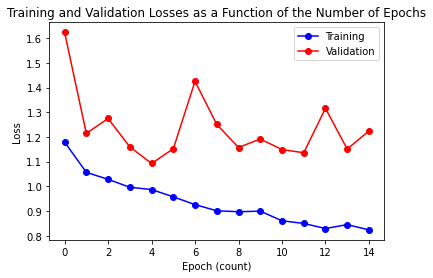

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



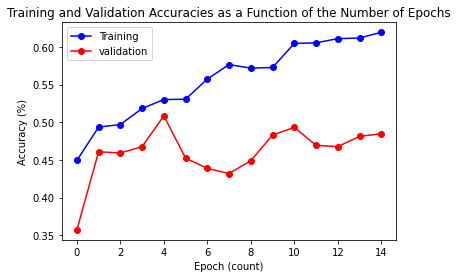

None Finding Results
Accuracy 0.71
Precision 0.54
Recall (Sensitivity) 0.6
Specificity 0.76
F-1 Score 0.57
One Finding Results
Accuracy 0.62
Precision 0.48
Recall (Sensitivity) 0.19
Specificity 0.87
F-1 Score 0.27
Finding Finding Results
Accuracy 0.64
Precision 0.45
Recall (Sensitivity) 0.73
Specificity 0.6
F-1 Score 0.56


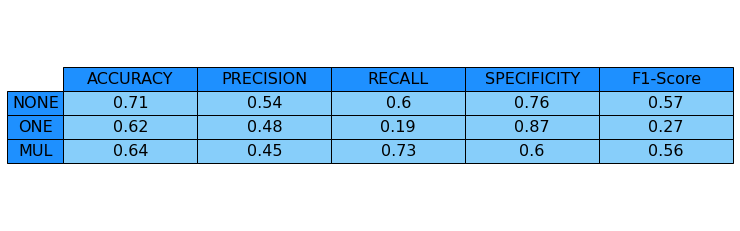

In [ ]:
#2 1 15 35
plot_history(augmented_mc_output[1])
test_accuracy, conf_matrix = evaluate_model(augmented_mc_output[2], augmented_mc_output[3]) #predictions, true_predictions 
none_TFPN = getTrueFalsePosNeg(conf_matrix, 0)
none_stats = summaryStatistics(none_TFPN[0], none_TFPN[1], none_TFPN[2], none_TFPN[3])

print("None Finding Results")
print("Accuracy", none_stats[0])
print("Precision", none_stats[1])
print("Recall (Sensitivity)", none_stats[2])
print("Specificity", none_stats[3])
print("F-1 Score", none_stats[4])

one_TFPN = getTrueFalsePosNeg(conf_matrix, 1)
one_stats = summaryStatistics(one_TFPN[0], one_TFPN[1], one_TFPN[2], one_TFPN[3])

print("One Finding Results")
print("Accuracy", one_stats[0])
print("Precision", one_stats[1])
print("Recall (Sensitivity)", one_stats[2])
print("Specificity", one_stats[3])
print("F-1 Score", one_stats[4])

mul_TFPN = getTrueFalsePosNeg(conf_matrix, 2)
mul_stats = summaryStatistics(mul_TFPN[0], mul_TFPN[1], mul_TFPN[2], mul_TFPN[3])

print("Finding Finding Results")
print("Accuracy", mul_stats[0])
print("Precision", mul_stats[1])
print("Recall (Sensitivity)", mul_stats[2])
print("Specificity", mul_stats[3])
print("F-1 Score", mul_stats[4])

tableResults(none_stats, one_stats, mul_stats)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



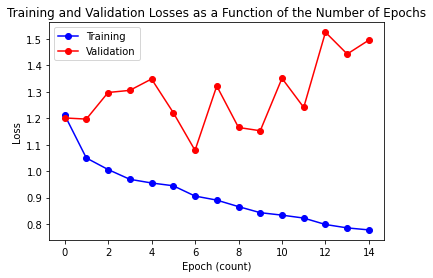

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



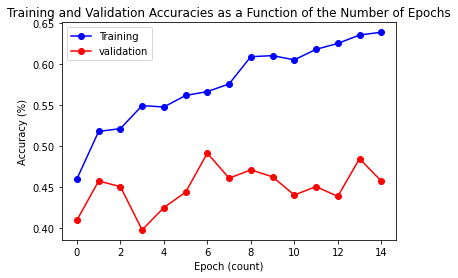

None Finding Results
Accuracy 0.72
Precision 0.57
Recall (Sensitivity) 0.51
Specificity 0.82
F-1 Score 0.54
One Finding Results
Accuracy 0.61
Precision 0.43
Recall (Sensitivity) 0.07
Specificity 0.95
F-1 Score 0.12
Finding Finding Results
Accuracy 0.58
Precision 0.41
Recall (Sensitivity) 0.89
Specificity 0.44
F-1 Score 0.56


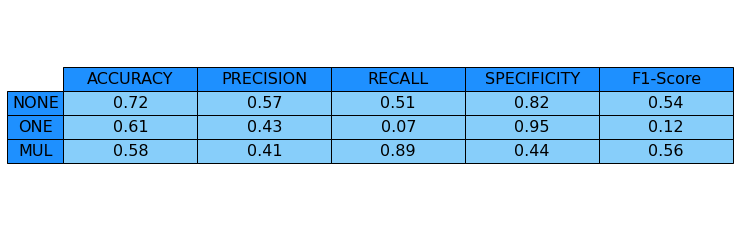

In [ ]:
#2 1 1 35
plot_history(augmented_mc_output[1])
test_accuracy, conf_matrix = evaluate_model(augmented_mc_output[2], augmented_mc_output[3]) #predictions, true_predictions 
none_TFPN = getTrueFalsePosNeg(conf_matrix, 0)
none_stats = summaryStatistics(none_TFPN[0], none_TFPN[1], none_TFPN[2], none_TFPN[3])

print("None Finding Results")
print("Accuracy", none_stats[0])
print("Precision", none_stats[1])
print("Recall (Sensitivity)", none_stats[2])
print("Specificity", none_stats[3])
print("F-1 Score", none_stats[4])

one_TFPN = getTrueFalsePosNeg(conf_matrix, 1)
one_stats = summaryStatistics(one_TFPN[0], one_TFPN[1], one_TFPN[2], one_TFPN[3])

print("One Finding Results")
print("Accuracy", one_stats[0])
print("Precision", one_stats[1])
print("Recall (Sensitivity)", one_stats[2])
print("Specificity", one_stats[3])
print("F-1 Score", one_stats[4])

mul_TFPN = getTrueFalsePosNeg(conf_matrix, 2)
mul_stats = summaryStatistics(mul_TFPN[0], mul_TFPN[1], mul_TFPN[2], mul_TFPN[3])

print("Finding Finding Results")
print("Accuracy", mul_stats[0])
print("Precision", mul_stats[1])
print("Recall (Sensitivity)", mul_stats[2])
print("Specificity", mul_stats[3])
print("F-1 Score", mul_stats[4])

tableResults(none_stats, one_stats, mul_stats)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



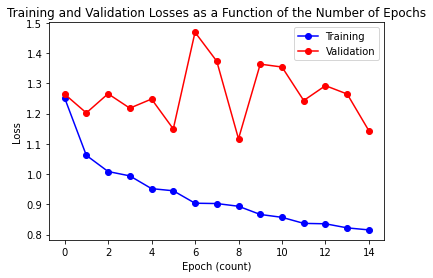

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



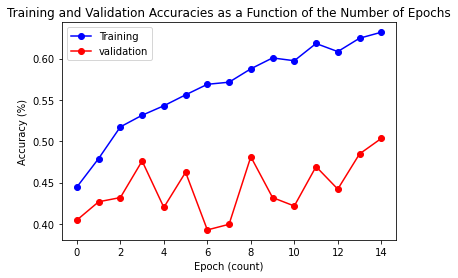

None Finding Results
Accuracy 0.71
Precision 0.53
Recall (Sensitivity) 0.62
Specificity 0.74
F-1 Score 0.57
One Finding Results
Accuracy 0.6
Precision 0.46
Recall (Sensitivity) 0.34
Specificity 0.76
F-1 Score 0.39
Finding Finding Results
Accuracy 0.7
Precision 0.51
Recall (Sensitivity) 0.59
Specificity 0.75
F-1 Score 0.55


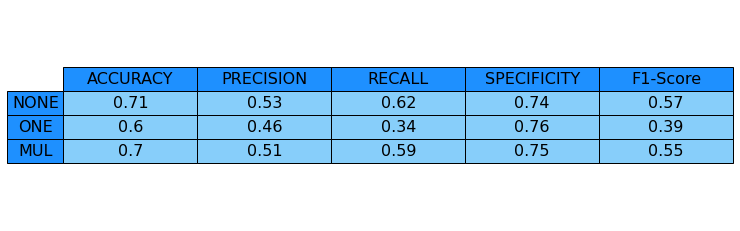

In [ ]:
#2 1 15 32
plot_history(augmented_mc_output[1])
test_accuracy, conf_matrix = evaluate_model(augmented_mc_output[2], augmented_mc_output[3]) #predictions, true_predictions 
none_TFPN = getTrueFalsePosNeg(conf_matrix, 0)
none_stats = summaryStatistics(none_TFPN[0], none_TFPN[1], none_TFPN[2], none_TFPN[3])

print("None Finding Results")
print("Accuracy", none_stats[0])
print("Precision", none_stats[1])
print("Recall (Sensitivity)", none_stats[2])
print("Specificity", none_stats[3])
print("F-1 Score", none_stats[4])

one_TFPN = getTrueFalsePosNeg(conf_matrix, 1)
one_stats = summaryStatistics(one_TFPN[0], one_TFPN[1], one_TFPN[2], one_TFPN[3])

print("One Finding Results")
print("Accuracy", one_stats[0])
print("Precision", one_stats[1])
print("Recall (Sensitivity)", one_stats[2])
print("Specificity", one_stats[3])
print("F-1 Score", one_stats[4])

mul_TFPN = getTrueFalsePosNeg(conf_matrix, 2)
mul_stats = summaryStatistics(mul_TFPN[0], mul_TFPN[1], mul_TFPN[2], mul_TFPN[3])

print("Finding Finding Results")
print("Accuracy", mul_stats[0])
print("Precision", mul_stats[1])
print("Recall (Sensitivity)", mul_stats[2])
print("Specificity", mul_stats[3])
print("F-1 Score", mul_stats[4])

tableResults(none_stats, one_stats, mul_stats)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



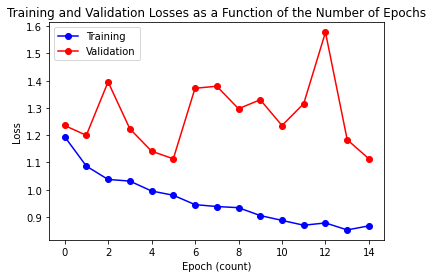

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



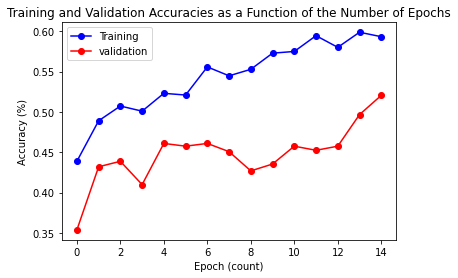

None Finding Results
Accuracy 0.72
Precision 0.57
Recall (Sensitivity) 0.49
Specificity 0.83
F-1 Score 0.53
One Finding Results
Accuracy 0.62
Precision 0.5
Recall (Sensitivity) 0.38
Specificity 0.77
F-1 Score 0.43
Finding Finding Results
Accuracy 0.7
Precision 0.51
Recall (Sensitivity) 0.73
Specificity 0.69
F-1 Score 0.6


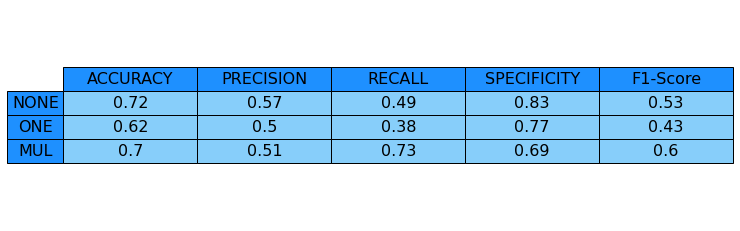

In [ ]:
#2 1 1 35
plot_history(augmented_mc_output[1])
test_accuracy, conf_matrix = evaluate_model(augmented_mc_output[2], augmented_mc_output[3]) #predictions, true_predictions 
none_TFPN = getTrueFalsePosNeg(conf_matrix, 0)
none_stats = summaryStatistics(none_TFPN[0], none_TFPN[1], none_TFPN[2], none_TFPN[3])

print("None Finding Results")
print("Accuracy", none_stats[0])
print("Precision", none_stats[1])
print("Recall (Sensitivity)", none_stats[2])
print("Specificity", none_stats[3])
print("F-1 Score", none_stats[4])

one_TFPN = getTrueFalsePosNeg(conf_matrix, 1)
one_stats = summaryStatistics(one_TFPN[0], one_TFPN[1], one_TFPN[2], one_TFPN[3])

print("One Finding Results")
print("Accuracy", one_stats[0])
print("Precision", one_stats[1])
print("Recall (Sensitivity)", one_stats[2])
print("Specificity", one_stats[3])
print("F-1 Score", one_stats[4])

mul_TFPN = getTrueFalsePosNeg(conf_matrix, 2)
mul_stats = summaryStatistics(mul_TFPN[0], mul_TFPN[1], mul_TFPN[2], mul_TFPN[3])

print("Finding Finding Results")
print("Accuracy", mul_stats[0])
print("Precision", mul_stats[1])
print("Recall (Sensitivity)", mul_stats[2])
print("Specificity", mul_stats[3])
print("F-1 Score", mul_stats[4])

tableResults(none_stats, one_stats, mul_stats)


#### Tuning Binary DenseNet Model With Custom Layers


In [ ]:
from keras.applications.densenet import DenseNet121, preprocess_input

In [ ]:
from keras.layers import Input

In [ ]:
#X,y = tf.convert_to_tensor(target_df['images'], np.float32), tf.convert_to_tensor(target_df['labels'], np.float32)
picklefile = open(pkl_pathx, 'rb')
X_list = pickle.load(picklefile)

picklefile = open(pkl_pathy, 'rb')
y_list = pickle.load(picklefile)

for n, i in enumerate(y_list) :
  if i == 2:
    y_list[n] = 1

X,y = np.asarray(X_list), np.asarray(y_list)

print(f'X is {len(X)}')
print(f'Y is {len(y)}')

X is 5606
Y is 5606


In [ ]:
sampling_df_binary = pd.DataFrame(y, columns=['label'])

zero_indices_binary = sampling_df_binary[sampling_df_binary["label"] == 0].index.tolist()[:2562]
print(len(zero_indices_binary))

one_indices_binary = sampling_df_binary[sampling_df_binary["label"] == 1].index.tolist()[:2562]
print(len(one_indices_binary))

print(len(zero_indices_binary)+len(one_indices_binary))

sampled_indices_binary = zero_indices_binary + one_indices_binary
len(sampled_indices_binary)

2562
2562
5124


5124

In [ ]:
X = np.asarray([X[i] for i in sampled_indices_binary])
y = np.asarray([y[i] for i in sampled_indices_binary])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'Y_train is {len(y_train)} and Y_test is {len(y_test)}')

# Block training for testing
block_train = False

if block_train:
  X_train = X_train[:80] 
  y_train = y_train[:80]
  X_test = X_test[:20] 
  y_test = y_test[:20]

print(type(X))
print(type(y))

y_train_OHE = to_categorical(y_train, num_classes = 2)
y_test_OHE = to_categorical(y_test, num_classes = 2)

X_train_scaled = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_test_scaled = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_train_1d = X_train.reshape(X_train.shape[0], X_train_scaled)
X_test_1d = X_test.reshape(X_test.shape[0], X_test_scaled)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'y_train is {len(y_train)} and y_test is {len(y_test)}')

for i in range(len(X_train_1d)):
    X_train_1d_new = X_train_1d.reshape(len(X_train_1d),128,128,3)

for i in range(len(X_test_1d)):
    X_test_1d_new = X_test_1d.reshape(len(X_test_1d),128,128,3)

print("X_train final shape is: ",X_train_1d.shape)
print("X_train final shape is: ",X_train_1d_new.shape)

X_train is 4099 and X_test is 1025
Y_train is 4099 and Y_test is 1025
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train is 4099 and X_test is 1025
y_train is 4099 and y_test is 1025
X_train final shape is:  (4099, 49152)
X_train final shape is:  (4099, 128, 128, 3)


In [ ]:
label_encoded_array = np.unique(y)
unbalanced_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
weight_data = {'labels': label_encoded_array, 'weight': unbalanced_weights}
#class_dict = dict(0=unbalanced_weights[0],1=unbalanced_weights[1], 2=unbalanced_weights[2])
class_dict = {i : unbalanced_weights[i] for i in range(2)}
pd.DataFrame(data=weight_data)

,labels,weight
0,0,1.0
1,1,1.0


In [ ]:
def augmented_binary_model_dense_tune_batch(X_train,y_train,X_test,y_test,input_weights):
    num_class = 2
    epochs = 15

    img_in = Input(X_train.shape[1:])            
    model = DenseNet121(include_top= False, 
                weights='imagenet',      
                input_tensor= img_in, 
                input_shape= X_train.shape[1:],
                pooling ='avg') 

    x = model.output  
    predictions = Dense(num_class, activation="softmax", name="predictions")(x)   
    model = Model(inputs=img_in, outputs=predictions)

    # Compiler = categorical_crossentropy
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['binary_accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=3, verbose=1)]

    # Adding the Image Data Generator from Keras
    generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.2,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=True,
      zoom_range = 0.15
    )
    generator.fit(X_train)
    itr = generator.flow(X_train, y_train)

    # Fitting the Model to the Augmented Data
    b_history = model.fit(x=itr, epochs=epochs, class_weight=input_weights, validation_data=(X_test,y_test), batch_size=35, verbose=1,callbacks = [history('metrics')])
    modelScore = model.evaluate(X_test, y_test, verbose=0)

    # Printing metrics
    print(f'Batch Loss: {modelScore[0]}')
    print(f'Accuracy: {modelScore[1]}')

    # Printing confusion matrix
    y_pred = model.predict(X_test)
    true_predictions = np.argmax(y_test,axis = 1) 
    predictions = np.argmax(y_pred,axis = 1) 

    return model, b_history, predictions, true_predictions 

In [ ]:
augmented_bin_output = augmented_binary_model_dense_tune_batch(X_train_1d_new, y_train_OHE, X_test_1d_new, y_test_OHE, class_dict)

29089792/29084464 [==============================] - 0s 0us/step
Epoch 1/15
129/129 [==============================] - 41s 183ms/step - loss: 0.7392 - binary_accuracy: 0.6022 - val_loss: 0.7642 - val_binary_accuracy: 0.5522
Epoch 2/15
129/129 [==============================] - 20s 154ms/step - loss: 0.6434 - binary_accuracy: 0.6575 - val_loss: 0.6885 - val_binary_accuracy: 0.6137
Epoch 3/15
129/129 [==============================] - 20s 156ms/step - loss: 0.6413 - binary_accuracy: 0.6538 - val_loss: 0.6886 - val_binary_accuracy: 0.6517
Epoch 4/15
129/129 [==============================] - 20s 157ms/step - loss: 0.6309 - binary_accuracy: 0.6564 - val_loss: 0.6955 - val_binary_accuracy: 0.6205
Epoch 5/15
129/129 [==============================] - 20s 156ms/step - loss: 0.6034 - binary_accuracy: 0.6886 - val_loss: 0.6549 - val_binary_accuracy: 0.6459
Epoch 6/15
129/129 [==============================] - 20s 157ms/step - loss: 0.6070 - binary_accuracy: 0.6675 - val_loss: 0.6081 - val_binar

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:111: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



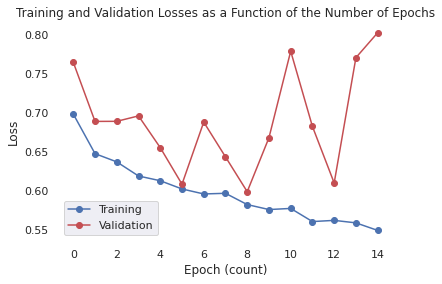

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



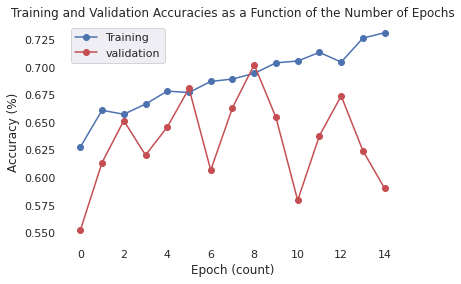

Testing Accuracy: 
 0.5902439024390244


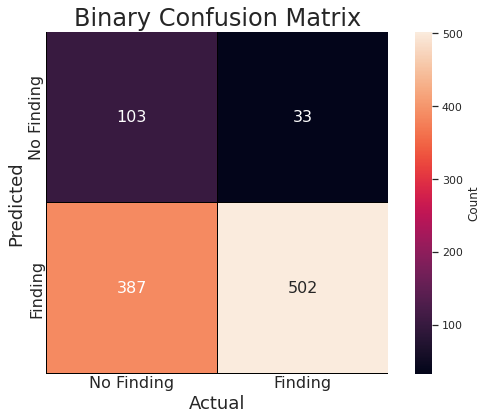

Binary Finding Results
Accuracy 0.59
Precision 0.56
Recall (Sensitivity) 0.94
Specificity 0.21
F-1 Score 0.7


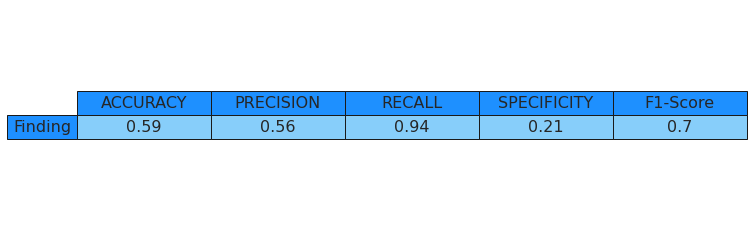

In [ ]:
plot_history_binary(augmented_bin_output[1])

binary_test_accuracy, binary_conf_matrix = evaluate_binary_model(augmented_bin_output[2], augmented_bin_output[3]) #predictions, true_predictions 
print("Testing Accuracy: \n", binary_test_accuracy)
plot_binary_confusion(binary_conf_matrix) 

binary_stats = binary_summary_Statistics(binary_conf_matrix)

print("Binary Finding Results")
print("Accuracy", binary_stats[0])
print("Precision", binary_stats[1])
print("Recall (Sensitivity)", binary_stats[2])
print("Specificity", binary_stats[3])
print("F-1 Score", binary_stats[4])

binary_tableResults(binary_stats)

<a name="five"></a>
## **V. Results of Finalized Model(s)**

### ***a) Multiclass Classification (None vs. One vs. Multiple)***

#### i) *Hypothesis One*


##### - Finalized Balanced Multiclass Model

In [ ]:
def augmented_multiclass_model_dense_tune_batch(X_train,y_train,X_test,y_test,input_weights):
    num_class = 3
    epochs = 15

    img_in = Input(X_train.shape[1:])            
    model = DenseNet121(include_top= False, 
                weights='imagenet',      
                input_tensor= img_in, 
                input_shape= X_train.shape[1:],
                pooling ='avg') 

    x = model.output  
    predictions = Dense(num_class, activation="softmax", name="predictions")(x)   
    model = Model(inputs=img_in, outputs=predictions)

    # Compiler = categorical_crossentropy
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]

    # Adding the Image Data Generator from Keras
    generator = ImageDataGenerator(
        rotation_range=10,
       width_shift_range=0.2,
       height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        zoom_range = 0.15
    )
    generator.fit(X_train)
    itr = generator.flow(X_train, y_train)

    # Fitting the Model to the Augmented Data
    b_history = model.fit(x=itr, epochs=epochs, class_weight=input_weights, validation_data=(X_test,y_test), batch_size=35, verbose=1,callbacks = [history('metrics')])
    modelScore = model.evaluate(X_test, y_test, verbose=0)

    # Printing metrics
    print(f'Batch Loss: {modelScore[0]}')
    print(f'Accuracy: {modelScore[1]}')

    # Printing confusion matrix
    y_pred = model.predict(X_test)
    true_predictions = np.argmax(y_test,axis = 1) 
    predictions = np.argmax(y_pred,axis = 1) 

    return model, b_history, predictions, true_predictions 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



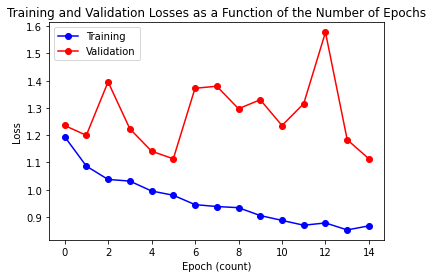

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



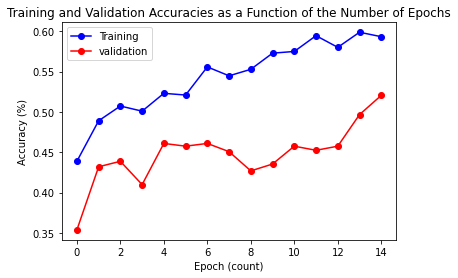

None Finding Results
Accuracy 0.72
Precision 0.57
Recall (Sensitivity) 0.49
Specificity 0.83
F-1 Score 0.53
One Finding Results
Accuracy 0.62
Precision 0.5
Recall (Sensitivity) 0.38
Specificity 0.77
F-1 Score 0.43
Finding Finding Results
Accuracy 0.7
Precision 0.51
Recall (Sensitivity) 0.73
Specificity 0.69
F-1 Score 0.6


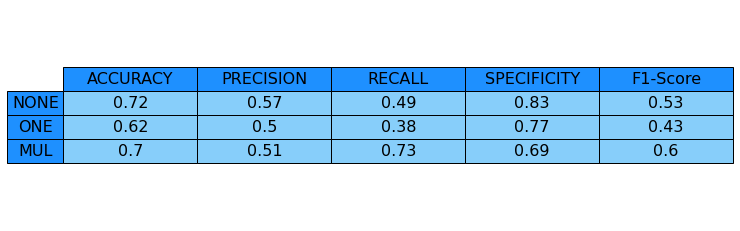

In [ ]:
#2 1 1 35
plot_history(augmented_mc_output[1])
test_accuracy, conf_matrix = evaluate_model(augmented_mc_output[2], augmented_mc_output[3]) #predictions, true_predictions 
none_TFPN = getTrueFalsePosNeg(conf_matrix, 0)
none_stats = summaryStatistics(none_TFPN[0], none_TFPN[1], none_TFPN[2], none_TFPN[3])

print("None Finding Results")
print("Accuracy", none_stats[0])
print("Precision", none_stats[1])
print("Recall (Sensitivity)", none_stats[2])
print("Specificity", none_stats[3])
print("F-1 Score", none_stats[4])

one_TFPN = getTrueFalsePosNeg(conf_matrix, 1)
one_stats = summaryStatistics(one_TFPN[0], one_TFPN[1], one_TFPN[2], one_TFPN[3])

print("One Finding Results")
print("Accuracy", one_stats[0])
print("Precision", one_stats[1])
print("Recall (Sensitivity)", one_stats[2])
print("Specificity", one_stats[3])
print("F-1 Score", one_stats[4])

mul_TFPN = getTrueFalsePosNeg(conf_matrix, 2)
mul_stats = summaryStatistics(mul_TFPN[0], mul_TFPN[1], mul_TFPN[2], mul_TFPN[3])

print("Finding Finding Results")
print("Accuracy", mul_stats[0])
print("Precision", mul_stats[1])
print("Recall (Sensitivity)", mul_stats[2])
print("Specificity", mul_stats[3])
print("F-1 Score", mul_stats[4])

tableResults(none_stats, one_stats, mul_stats)


##### - Finalized Imbalanced Multiclass Model 

In [ ]:
#X,y = tf.convert_to_tensor(target_df['images'], np.float32), tf.convert_to_tensor(target_df['labels'], np.float32)
picklefile = open(pkl_pathx, 'rb')
X_list = pickle.load(picklefile)

picklefile = open(pkl_pathy, 'rb')
y_list = pickle.load(picklefile)

X,y = np.asarray(X_list), np.asarray(y_list)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'Y_train is {len(y_train)} and Y_test is {len(y_test)}')

# Block training for testing
block_train = False

if block_train:
  X_train = X_train[:80] 
  y_train = y_train[:80]
  X_test = X_test[:20] 
  y_test = y_test[:20]

print(type(X))
print(type(y))

y_train_OHE = to_categorical(y_train, num_classes = 3)
y_test_OHE = to_categorical(y_test, num_classes = 3)

X_train_scaled = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_test_scaled = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_train_1d = X_train.reshape(X_train.shape[0], X_train_scaled)
X_test_1d = X_test.reshape(X_test.shape[0], X_test_scaled)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'y_train is {len(y_train)} and y_test is {len(y_test)}')

for i in range(len(X_train_1d)):
    X_train_1d_new = X_train_1d.reshape(len(X_train_1d),128,128,3)

for i in range(len(X_test_1d)):
    X_test_1d_new = X_test_1d.reshape(len(X_test_1d),128,128,3)

print("X_train final shape is: ",X_train_1d.shape)
print("X_train final shape is: ",X_train_1d_new.shape)

X_train is 4484 and X_test is 1122
Y_train is 4484 and Y_test is 1122
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train is 4484 and X_test is 1122
y_train is 4484 and y_test is 1122
X_train final shape is:  (4484, 49152)
X_train final shape is:  (4484, 128, 128, 3)


In [ ]:
label_encoded_array = np.unique(y)
unbalanced_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
weight_data = {'labels': label_encoded_array, 'weight': unbalanced_weights}
#class_dict = dict(0=unbalanced_weights[0],1=unbalanced_weights[1], 2=unbalanced_weights[2])
class_dict = {i : unbalanced_weights[i] for i in range(3)}
pd.DataFrame(data=weight_data)

,labels,weight
0,0,0.613885
1,1,1.181205
2,2,1.906803


In [ ]:
model_output = augmented_multiclass_model_dense_tune_batch(X_train_1d_new, y_train_OHE, X_test_1d_new, y_test_OHE, class_dict)

Epoch 1/15
141/141 [==============================] - 33s 167ms/step - loss: 1.3702 - accuracy: 0.3911 - val_loss: 1.1816 - val_accuracy: 0.4537
Epoch 2/15
141/141 [==============================] - 22s 156ms/step - loss: 1.1245 - accuracy: 0.4494 - val_loss: 1.1021 - val_accuracy: 0.4679
Epoch 3/15
141/141 [==============================] - 22s 156ms/step - loss: 1.1026 - accuracy: 0.4585 - val_loss: 1.0823 - val_accuracy: 0.4180
Epoch 4/15
141/141 [==============================] - 22s 156ms/step - loss: 1.0551 - accuracy: 0.4757 - val_loss: 1.0666 - val_accuracy: 0.4661
Epoch 5/15
141/141 [==============================] - 22s 156ms/step - loss: 1.0268 - accuracy: 0.5027 - val_loss: 1.0461 - val_accuracy: 0.4483
Epoch 6/15
141/141 [==============================] - 22s 158ms/step - loss: 0.9848 - accuracy: 0.5154 - val_loss: 1.3522 - val_accuracy: 0.4251
Epoch 7/15
141/141 [==============================] - 22s 157ms/step - loss: 1.0091 - accuracy: 0.5226 - val_loss: 0.9895 - val_ac

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



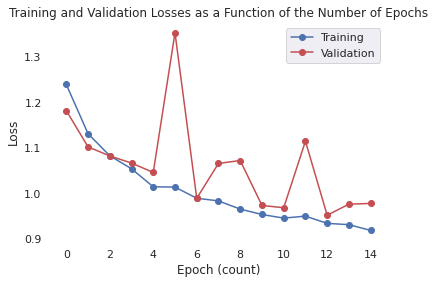

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



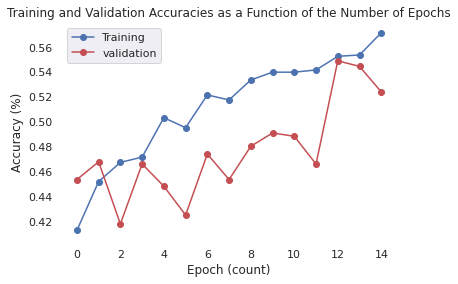

Testing Accuracy: 
 0.5240641711229946


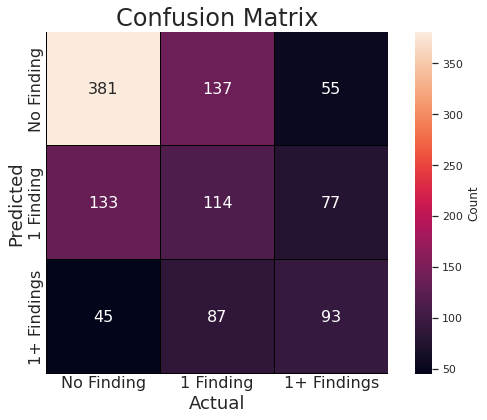

None Finding Results
Accuracy 0.67
Precision 0.66
Recall (Sensitivity) 0.68
Specificity 0.66
F-1 Score 0.67
One Finding Results
Accuracy 0.61
Precision 0.35
Recall (Sensitivity) 0.34
Specificity 0.73
F-1 Score 0.34
Finding Finding Results
Accuracy 0.76
Precision 0.41
Recall (Sensitivity) 0.41
Specificity 0.85
F-1 Score 0.41


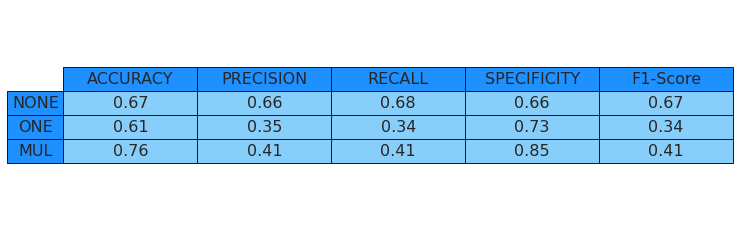

In [ ]:
plot_history(model_output[1])

test_accuracy, conf_matrix = evaluate_model(model_output[2], model_output[3]) #predictions, true_predictions 
print("Testing Accuracy: \n", test_accuracy)
plot_confusion(conf_matrix) 

none_TFPN = getTrueFalsePosNeg(conf_matrix, 0)
none_stats = summaryStatistics(none_TFPN[0], none_TFPN[1], none_TFPN[2], none_TFPN[3])

print("None Finding Results")
print("Accuracy", none_stats[0])
print("Precision", none_stats[1])
print("Recall (Sensitivity)", none_stats[2])
print("Specificity", none_stats[3])
print("F-1 Score", none_stats[4])

one_TFPN = getTrueFalsePosNeg(conf_matrix, 1)
one_stats = summaryStatistics(one_TFPN[0], one_TFPN[1], one_TFPN[2], one_TFPN[3])

print("One Finding Results")
print("Accuracy", one_stats[0])
print("Precision", one_stats[1])
print("Recall (Sensitivity)", one_stats[2])
print("Specificity", one_stats[3])
print("F-1 Score", one_stats[4])

mul_TFPN = getTrueFalsePosNeg(conf_matrix, 2)
mul_stats = summaryStatistics(mul_TFPN[0], mul_TFPN[1], mul_TFPN[2], mul_TFPN[3])

print("Finding Finding Results")
print("Accuracy", mul_stats[0])
print("Precision", mul_stats[1])
print("Recall (Sensitivity)", mul_stats[2])
print("Specificity", mul_stats[3])
print("F-1 Score", mul_stats[4])

tableResults(none_stats, one_stats, mul_stats)

### ***b) Binary Classification (No Finding vs. Finding)***

#### i) Hypothesis One

##### - Finalized Balanced Binary Model

In [ ]:
def augmented_binary_model_dense_tune_batch(X_train,y_train,X_test,y_test,input_weights):
    num_class = 2
    epochs = 15

    img_in = Input(X_train.shape[1:])            
    model = DenseNet121(include_top= False, 
                weights='imagenet',      
                input_tensor= img_in, 
                input_shape= X_train.shape[1:],
                pooling ='avg') 

    x = model.output  
    predictions = Dense(num_class, activation="softmax", name="predictions")(x)   
    model = Model(inputs=img_in, outputs=predictions)

    # Compiler = categorical_crossentropy
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['binary_accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=3, verbose=1)]

    # Adding the Image Data Generator from Keras
    generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.2,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=True,
      zoom_range = 0.15
    )
    generator.fit(X_train)
    itr = generator.flow(X_train, y_train)

    # Fitting the Model to the Augmented Data
    b_history = model.fit(x=itr, epochs=epochs, class_weight=input_weights, validation_data=(X_test,y_test), batch_size=35, verbose=1,callbacks = [history('metrics')])
    modelScore = model.evaluate(X_test, y_test, verbose=0)

    # Printing metrics
    print(f'Batch Loss: {modelScore[0]}')
    print(f'Accuracy: {modelScore[1]}')

    # Printing confusion matrix
    y_pred = model.predict(X_test)
    true_predictions = np.argmax(y_test,axis = 1) 
    predictions = np.argmax(y_pred,axis = 1) 

    return model, b_history, predictions, true_predictions 

##### - Finalized Imbalanced Binary Model

In [ ]:
#X,y = tf.convert_to_tensor(target_df['images'], np.float32), tf.convert_to_tensor(target_df['labels'], np.float32)
picklefile = open(pkl_pathx, 'rb')
X_list = pickle.load(picklefile)

picklefile = open(pkl_pathy, 'rb')
y_list = pickle.load(picklefile)

for n, i in enumerate(y_list) :
  if i == 2:
    y_list[n] = 1

X,y = np.asarray(X_list), np.asarray(y_list)

print(f'X is {len(X)}')
print(f'Y is {len(y)}')

X is 5606
Y is 5606


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'Y_train is {len(y_train)} and Y_test is {len(y_test)}')

# Block training for testing
block_train = False

if block_train:
  X_train = X_train[:80] 
  y_train = y_train[:80]
  X_test = X_test[:20] 
  y_test = y_test[:20]

print(type(X))
print(type(y))

y_train_OHE = to_categorical(y_train, num_classes = 2)
y_test_OHE = to_categorical(y_test, num_classes = 2)

X_train_scaled = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_test_scaled = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_train_1d = X_train.reshape(X_train.shape[0], X_train_scaled)
X_test_1d = X_test.reshape(X_test.shape[0], X_test_scaled)

print(f'X_train is {len(X_train)} and X_test is {len(X_test)}')
print(f'y_train is {len(y_train)} and y_test is {len(y_test)}')

for i in range(len(X_train_1d)):
    X_train_1d_new = X_train_1d.reshape(len(X_train_1d),128,128,3)

for i in range(len(X_test_1d)):
    X_test_1d_new = X_test_1d.reshape(len(X_test_1d),128,128,3)

print("X_train final shape is: ",X_train_1d.shape)
print("X_train final shape is: ",X_train_1d_new.shape)

X_train is 4484 and X_test is 1122
Y_train is 4484 and Y_test is 1122
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train is 4484 and X_test is 1122
y_train is 4484 and y_test is 1122
X_train final shape is:  (4484, 49152)
X_train final shape is:  (4484, 128, 128, 3)


In [ ]:
label_encoded_array = np.unique(y)
unbalanced_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
weight_data = {'labels': label_encoded_array, 'weight': unbalanced_weights}
#class_dict = dict(0=unbalanced_weights[0],1=unbalanced_weights[1], 2=unbalanced_weights[2])
class_dict = {i : unbalanced_weights[i] for i in range(2)}
pd.DataFrame(data=weight_data)

,labels,weight
0,0,0.920828
1,1,1.094067


In [ ]:
binary_model_output = augmented_binary_model_dense_tune_batch(X_train_1d_new, y_train_OHE, X_test_1d_new, y_test_OHE, class_dict)

Epoch 1/15
141/141 [==============================] - 34s 176ms/step - loss: 0.7486 - binary_accuracy: 0.6084 - val_loss: 0.8506 - val_binary_accuracy: 0.5963
Epoch 2/15
141/141 [==============================] - 22s 156ms/step - loss: 0.6639 - binary_accuracy: 0.6515 - val_loss: 0.6512 - val_binary_accuracy: 0.6515
Epoch 3/15
141/141 [==============================] - 22s 158ms/step - loss: 0.6357 - binary_accuracy: 0.6611 - val_loss: 0.7027 - val_binary_accuracy: 0.5891
Epoch 4/15
141/141 [==============================] - 22s 157ms/step - loss: 0.6193 - binary_accuracy: 0.6757 - val_loss: 0.6487 - val_binary_accuracy: 0.6533
Epoch 5/15
141/141 [==============================] - 22s 156ms/step - loss: 0.6256 - binary_accuracy: 0.6731 - val_loss: 0.7564 - val_binary_accuracy: 0.5526
Epoch 6/15
141/141 [==============================] - 22s 156ms/step - loss: 0.6178 - binary_accuracy: 0.6756 - val_loss: 0.6122 - val_binary_accuracy: 0.6720
Epoch 7/15
141/141 [==========================

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:111: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



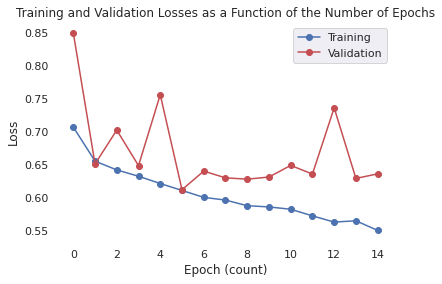

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:124: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



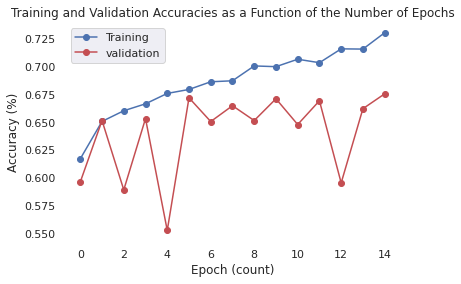

Testing Accuracy: 
 0.6755793226381461


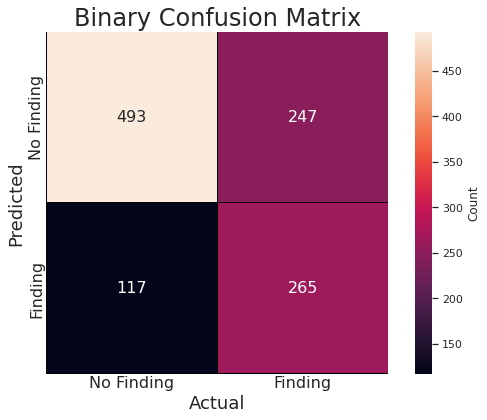

Binary Finding Results
Accuracy 0.68
Precision 0.69
Recall (Sensitivity) 0.52
Specificity 0.81
F-1 Score 0.59


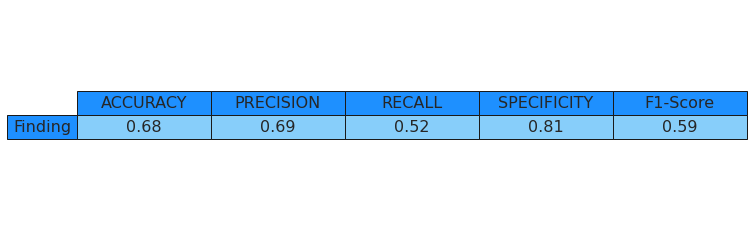

In [ ]:
plot_history_binary(binary_model_output[1])

binary_test_accuracy, binary_conf_matrix = evaluate_binary_model(binary_model_output[2], binary_model_output[3]) #predictions, true_predictions 
print("Testing Accuracy: \n", binary_test_accuracy)
plot_binary_confusion(binary_conf_matrix)

binary_stats = binary_summary_Statistics(binary_conf_matrix)

print("Binary Finding Results")
print("Accuracy", binary_stats[0])
print("Precision", binary_stats[1])
print("Recall (Sensitivity)", binary_stats[2])
print("Specificity", binary_stats[3])
print("F-1 Score", binary_stats[4])

binary_tableResults(binary_stats)

<a name="six"></a>
## **VI. Discussion & Conclusion**

<a name="seven"></a>
## **VII. References**

1. Tsakok MT, Gleeson FV. The chest radiograph in heart disease. Medicine. 2018;46(8):453-457. doi:10.1016/j.mpmed.2018.05.007
2. Rousan LA, Elobeid E, Karrar M, Khader Y. Chest x-ray findings and temporal lung changes in patients with COVID-19 pneumonia. BMC Pulmonary Medicine. 2020;20(1):245. doi:10.1186/s12890-020-01286-5
3. Bruls RJM, Kwee RM. Workload for radiologists during on-call hours: dramatic increase in the past 15 years. Insights into Imaging. 2020;11(1):121. doi:10.1186/s13244-020-00925-z
4. Forsberg D, Rosipko B, Sunshine JL. Radiologists’ Variation of Time to Read Across Different Procedure Types. J Digit Imaging. 2017;30(1):86-94. doi:10.1007/s10278-016-9911-z
5. Brady AP. Error and discrepancy in radiology: inevitable or avoidable? Insights Imaging. 2016;8(1):171-182. doi:10.1007/s13244-016-0534-1
6. How to Manage Mistakes in Radiology | Diagnostic Imaging. Accessed January 13, 2021. https://www.diagnosticimaging.com/view/how-manage-mistakes-radiology
7. Bruno MA, Walker EA, Abujudeh HH. Understanding and Confronting Our Mistakes: The Epidemiology of Error in Radiology and Strategies for Error Reduction. RadioGraphics. 2015;35(6):1668-1676. doi:10.1148/rg.2015150023
8. Radiology (ACR) RS of NA (RSNA) and AC of. Chest X-ray (Radiograph). Accessed January 13, 2021. https://www.radiologyinfo.org/en/info.cfm?pg=chestrad
9. Yamashita R, Nishio M, Do RKG, Togashi K. Convolutional neural networks: an overview and application in radiology. Insights Imaging. 2018;9(4):611-629. doi:10.1007/s13244-018-0639-9
10. Unsupervised Feature Learning and Deep Learning Tutorial. Accessed January 14, 2021. http://deeplearning.stanford.edu/tutorial/supervised/ConvolutionalNeuralNetwork/
11. Deshpande A. A Beginner’s Guide To Understanding Convolutional Neural Networks. Accessed January 14, 2021. https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/
12. Brownlee J. A Gentle Introduction to Pooling Layers for Convolutional Neural Networks. Machine Learning Mastery. Published April 21, 2019. Accessed January 14, 2021. https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/
13. Li Q, Cai W, Wang X, Zhou Y, Feng DD, Chen M. Medical image classification with convolutional neural network. In: 2014 13th International Conference on Control Automation Robotics Vision (ICARCV). ; 2014:844-848. doi:10.1109/ICARCV.2014.7064414
14. Jain R, Nagrath P, Kataria G, Sirish Kaushik V, Jude Hemanth D. Pneumonia detection in chest X-ray images using convolutional neural networks and transfer learning. Measurement. 2020;165:108046. doi:10.1016/j.measurement.2020.108046
15. Wang L, Lin ZQ, Wong A. COVID-Net: a tailored deep convolutional neural network design for detection of COVID-19 cases from chest X-ray images. Scientific Reports. 2020;10(1):19549. doi:10.1038/s41598-020-76550-z
16. Hussain L, Nguyen T, Li H, et al. Machine-learning classification of texture features of portable chest X-ray accurately classifies COVID-19 lung infection. BioMedical Engineering OnLine. 2020;19(1):88. doi:10.1186/s12938-020-00831-x
17. NIH Chest X-rays. Accessed January 15, 2021. https://kaggle.com/nih-chest-xrays/data











